In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme for plots
sns.set_theme()

# Data Loading

In [3]:
#Load the dataset containing player statistics from the top 5 football leagues
data = pd.read_csv('top5-players.csv')

In [4]:
#Display the first few rows to understand the structure of the dataset
data.head(10)

Rk             Player   Nation    Pos           Squad                Comp  \
0   1         Max Aarons  eng ENG     DF     Bournemouth  eng Premier League   
1   2   Brenden Aaronson   us USA  MF,FW    Union Berlin       de Bundesliga   
2   3    Paxten Aaronson   us USA     MF  Eint Frankfurt       de Bundesliga   
3   4  Keyliane Abdallah   fr FRA     FW       Marseille          fr Ligue 1   
4   5   Yunis Abdelhamid   ma MAR     DF           Reims          fr Ligue 1   
5   6  Salis Abdul Samed   gh GHA     MF            Lens          fr Ligue 1   
6   7      Nabil Aberdin   fr FRA     DF          Getafe          es La Liga   
7   8    Laurent Abergel   fr FRA     MF         Lorient          fr Ligue 1   
8   9     Matthis Abline   fr FRA     FW          Nantes          fr Ligue 1   
9  10              Abner   br BRA     DF           Betis          es La Liga   

    Age    Born  MP  Starts  ...  Gls_90  Ast_90  G+A_90  G-PK_90  G+A-PK_90  \
0  23.0  2000.0  20      13  ...    0.00    0.07    0.07     0.00       0.07   
1  22.0  2000.0  30      14  ...    0.14    0.14    0.28     0.14       0.28   
2  19.0  2003.0   7       1  ...    0.00    0.89    0.89     0.00       0.89   
3  17.0  2006.0   1       0  ...    0.00    0.00    0.00     0.00       0.00   
4  35.0  1987.0  31      31  ...    0.13    0.00    0.13     0.10       0.10   
5  23.0  2000.0  27      17  ...    0.00    0.00    0.00     0.00       0.00   
6  20.0  2002.0   2       2  ...    0.00    0.00    0.00     0.00       0.00   
7  30.0  1993.0  33      32  ...    0.06    0.03    0.09     0.06       0.09   
8  20.0  2003.0  22      12  ...    0.43    0.00    0.43     0.43       0.43   
9  23.0  2000.0  23      15  ...    0.00    0.06    0.06     0.00       0.06   

   xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  
0   0.00    0.06       0.06     0.00         0.06  
1   0.14    0.13       0.27     0.14         0.27  
2   0.11    0.07       0.19     0.11         0.19  
3   0.00    0.00       0.00     0.00         0.00  
4   0.11    0.01       0.12     0.09         0.09  
5   0.05    0.03       0.08     0.05         0.08  
6   0.00    0.00       0.00     0.00         0.00  
7   0.04    0.07       0.10     0.04         0.10  
8   0.33    0.17       0.50     0.33         0.50  
9   0.01    0.06       0.07     0.01         0.07  

[10 rows x 37 columns]

# Data Cleaning

In [5]:
# Check for missing values in the dataset
print(data.isnull().sum())

Rk             0
Player         0
Nation         3
Pos            0
Squad          0
Comp           0
Age            4
Born           4
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             1
npxG           1
xAG            1
npxG+xAG       1
PrgC           1
PrgP           1
PrgR           1
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          1
xAG_90         1
xG+xAG_90      1
npxG_90        1
npxG+xAG_90    1
dtype: int64


In [6]:
# Drop rows with missing values to clean the data
data.dropna(inplace=True)

In [7]:
# Check if the dataset is clear of null values
print(data.isnull().sum())

Rk             0
Player         0
Nation         0
Pos            0
Squad          0
Comp           0
Age            0
Born           0
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
dtype: int64


In [8]:
# Splitting the 'Nation' column to separate nationality and additional details
data[['Nationality_low','Nationality']] = data["Nation"].str.split(" ", n=1, expand=True)
data.drop(['Nation','Nationality_low'], axis=1, inplace=True)
data.head()

Rk             Player    Pos           Squad                Comp   Age  \
0   1         Max Aarons     DF     Bournemouth  eng Premier League  23.0   
1   2   Brenden Aaronson  MF,FW    Union Berlin       de Bundesliga  22.0   
2   3    Paxten Aaronson     MF  Eint Frankfurt       de Bundesliga  19.0   
3   4  Keyliane Abdallah     FW       Marseille          fr Ligue 1  17.0   
4   5   Yunis Abdelhamid     DF           Reims          fr Ligue 1  35.0   

     Born  MP  Starts   Min  ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  \
0  2000.0  20      13  1237  ...    0.07    0.07     0.00       0.07   0.00   
1  2000.0  30      14  1267  ...    0.14    0.28     0.14       0.28   0.14   
2  2003.0   7       1   101  ...    0.89    0.89     0.00       0.89   0.11   
3  2006.0   1       0     4  ...    0.00    0.00     0.00       0.00   0.00   
4  1987.0  31      31  2781  ...    0.00    0.13     0.10       0.10   0.11   

   xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  Nationality  
0    0.06       0.06     0.00         0.06          ENG  
1    0.13       0.27     0.14         0.27          USA  
2    0.07       0.19     0.11         0.19          USA  
3    0.00       0.00     0.00         0.00          FRA  
4    0.01       0.12     0.09         0.09          MAR  

[5 rows x 37 columns]

In [9]:
# Splitting the 'Comp' column to extract league information
data[['Country','Competition']] = data['Comp'].str.split(" ", n=1, expand=True)
data.drop(['Comp','Country'], axis=1, inplace=True)
data.head()

Rk             Player    Pos           Squad   Age    Born  MP  Starts  \
0   1         Max Aarons     DF     Bournemouth  23.0  2000.0  20      13   
1   2   Brenden Aaronson  MF,FW    Union Berlin  22.0  2000.0  30      14   
2   3    Paxten Aaronson     MF  Eint Frankfurt  19.0  2003.0   7       1   
3   4  Keyliane Abdallah     FW       Marseille  17.0  2006.0   1       0   
4   5   Yunis Abdelhamid     DF           Reims  35.0  1987.0  31      31   

    Min   90s  ...  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  \
0  1237  13.7  ...    0.07     0.00       0.07   0.00    0.06       0.06   
1  1267  14.1  ...    0.28     0.14       0.28   0.14    0.13       0.27   
2   101   1.1  ...    0.89     0.00       0.89   0.11    0.07       0.19   
3     4   0.0  ...    0.00     0.00       0.00   0.00    0.00       0.00   
4  2781  30.9  ...    0.13     0.10       0.10   0.11    0.01       0.12   

   npxG_90  npxG+xAG_90  Nationality     Competition  
0     0.00         0.06          ENG  Premier League  
1     0.14         0.27          USA      Bundesliga  
2     0.11         0.19          USA      Bundesliga  
3     0.00         0.00          FRA         Ligue 1  
4     0.09         0.09          MAR         Ligue 1  

[5 rows x 37 columns]

In [10]:
# Splitting the 'Pos' column by keeping only the primary position
data[['Position','Pos_2']] = data['Pos'].str.split(",", expand=True)
data.drop(['Pos','Pos_2'], axis=1, inplace=True)    
data.head()

Rk             Player           Squad   Age    Born  MP  Starts   Min  \
0   1         Max Aarons     Bournemouth  23.0  2000.0  20      13  1237   
1   2   Brenden Aaronson    Union Berlin  22.0  2000.0  30      14  1267   
2   3    Paxten Aaronson  Eint Frankfurt  19.0  2003.0   7       1   101   
3   4  Keyliane Abdallah       Marseille  17.0  2006.0   1       0     4   
4   5   Yunis Abdelhamid           Reims  35.0  1987.0  31      31  2781   

    90s  Gls  ...  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  \
0  13.7    0  ...     0.00       0.07   0.00    0.06       0.06     0.00   
1  14.1    2  ...     0.14       0.28   0.14    0.13       0.27     0.14   
2   1.1    0  ...     0.00       0.89   0.11    0.07       0.19     0.11   
3   0.0    0  ...     0.00       0.00   0.00    0.00       0.00     0.00   
4  30.9    4  ...     0.10       0.10   0.11    0.01       0.12     0.09   

   npxG+xAG_90  Nationality     Competition  Position  
0         0.06          ENG  Premier League        DF  
1         0.27          USA      Bundesliga        MF  
2         0.19          USA      Bundesliga        MF  
3         0.00          FRA         Ligue 1        FW  
4         0.09          MAR         Ligue 1        DF  

[5 rows x 37 columns]

In [11]:
# Reordering columns for better organization
col = data.pop('Nationality')
data.insert(2, col.name, col)

col = data.pop('Position')
data.insert(3, col.name, col)

col = data.pop('Competition')
data.insert(5, col.name, col)
data.head()

Rk             Player Nationality Position           Squad     Competition  \
0   1         Max Aarons         ENG       DF     Bournemouth  Premier League   
1   2   Brenden Aaronson         USA       MF    Union Berlin      Bundesliga   
2   3    Paxten Aaronson         USA       MF  Eint Frankfurt      Bundesliga   
3   4  Keyliane Abdallah         FRA       FW       Marseille         Ligue 1   
4   5   Yunis Abdelhamid         MAR       DF           Reims         Ligue 1   

    Age    Born  MP  Starts  ...  Gls_90  Ast_90  G+A_90  G-PK_90  G+A-PK_90  \
0  23.0  2000.0  20      13  ...    0.00    0.07    0.07     0.00       0.07   
1  22.0  2000.0  30      14  ...    0.14    0.14    0.28     0.14       0.28   
2  19.0  2003.0   7       1  ...    0.00    0.89    0.89     0.00       0.89   
3  17.0  2006.0   1       0  ...    0.00    0.00    0.00     0.00       0.00   
4  35.0  1987.0  31      31  ...    0.13    0.00    0.13     0.10       0.10   

   xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  
0   0.00    0.06       0.06     0.00         0.06  
1   0.14    0.13       0.27     0.14         0.27  
2   0.11    0.07       0.19     0.11         0.19  
3   0.00    0.00       0.00     0.00         0.00  
4   0.11    0.01       0.12     0.09         0.09  

[5 rows x 37 columns]

In [12]:
# Renaming the 'Squad' column to 'Team' for clarity
data.rename(columns={"Squad": "Team"},inplace=True)
data.head()

Rk             Player Nationality Position            Team     Competition  \
0   1         Max Aarons         ENG       DF     Bournemouth  Premier League   
1   2   Brenden Aaronson         USA       MF    Union Berlin      Bundesliga   
2   3    Paxten Aaronson         USA       MF  Eint Frankfurt      Bundesliga   
3   4  Keyliane Abdallah         FRA       FW       Marseille         Ligue 1   
4   5   Yunis Abdelhamid         MAR       DF           Reims         Ligue 1   

    Age    Born  MP  Starts  ...  Gls_90  Ast_90  G+A_90  G-PK_90  G+A-PK_90  \
0  23.0  2000.0  20      13  ...    0.00    0.07    0.07     0.00       0.07   
1  22.0  2000.0  30      14  ...    0.14    0.14    0.28     0.14       0.28   
2  19.0  2003.0   7       1  ...    0.00    0.89    0.89     0.00       0.89   
3  17.0  2006.0   1       0  ...    0.00    0.00    0.00     0.00       0.00   
4  35.0  1987.0  31      31  ...    0.13    0.00    0.13     0.10       0.10   

   xG_90  xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  
0   0.00    0.06       0.06     0.00         0.06  
1   0.14    0.13       0.27     0.14         0.27  
2   0.11    0.07       0.19     0.11         0.19  
3   0.00    0.00       0.00     0.00         0.00  
4   0.11    0.01       0.12     0.09         0.09  

[5 rows x 37 columns]

In [13]:
# Adding calculated metrics for further analysis
data['xG+xAG'] = data['xG'] + data['xAG']
# Reordering column for better organization
col = data.pop('xG+xAG')
data.insert(24, col.name, col)

In [14]:
# Calculating performance rates based on matches played
data['Gls-xG'] = data['Gls'] - data['xG']
data['Ast-xAG'] = data['Ast'] - data['xAG']
data['Gls_rate'] = data['Gls'] / data['MP']
data['Ast_rate'] = data['Ast'] / data['MP']
data['G+A_rate'] = data['G+A'] / data['MP']
data['xG_rate'] = data['xG'] / data['MP']
data['xAG_rate'] = data['xAG'] / data['MP']
data['xG+xAG_rate'] = (data['xG'] + data['xAG']) /data['MP']
data.head()

Rk             Player Nationality Position            Team     Competition  \
0   1         Max Aarons         ENG       DF     Bournemouth  Premier League   
1   2   Brenden Aaronson         USA       MF    Union Berlin      Bundesliga   
2   3    Paxten Aaronson         USA       MF  Eint Frankfurt      Bundesliga   
3   4  Keyliane Abdallah         FRA       FW       Marseille         Ligue 1   
4   5   Yunis Abdelhamid         MAR       DF           Reims         Ligue 1   

    Age    Born  MP  Starts  ...  npxG_90  npxG+xAG_90  Gls-xG  Ast-xAG  \
0  23.0  2000.0  20      13  ...     0.00         0.06     0.0      0.2   
1  22.0  2000.0  30      14  ...     0.14         0.27     0.0      0.1   
2  19.0  2003.0   7       1  ...     0.11         0.19    -0.1      0.9   
3  17.0  2006.0   1       0  ...     0.00         0.00     0.0      0.0   
4  35.0  1987.0  31      31  ...     0.09         0.09     0.6     -0.3   

   Gls_rate  Ast_rate  G+A_rate   xG_rate  xAG_rate  xG+xAG_rate  
0  0.000000  0.050000  0.050000  0.000000  0.040000     0.040000  
1  0.066667  0.066667  0.133333  0.066667  0.063333     0.130000  
2  0.000000  0.142857  0.142857  0.014286  0.014286     0.028571  
3  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  
4  0.129032  0.000000  0.129032  0.109677  0.009677     0.119355  

[5 rows x 46 columns]

In [15]:
## Save the cleaned and processed dataset to a CSV file for further analysis or reuse
#data.to_csv('processed_data.csv', index=False)

# Exploring Data

In [16]:
#Display the first few rows to understand the final structure of the dataset
data.head(10)

Rk             Player Nationality Position            Team     Competition  \
0   1         Max Aarons         ENG       DF     Bournemouth  Premier League   
1   2   Brenden Aaronson         USA       MF    Union Berlin      Bundesliga   
2   3    Paxten Aaronson         USA       MF  Eint Frankfurt      Bundesliga   
3   4  Keyliane Abdallah         FRA       FW       Marseille         Ligue 1   
4   5   Yunis Abdelhamid         MAR       DF           Reims         Ligue 1   
5   6  Salis Abdul Samed         GHA       MF            Lens         Ligue 1   
6   7      Nabil Aberdin         FRA       DF          Getafe         La Liga   
7   8    Laurent Abergel         FRA       MF         Lorient         Ligue 1   
8   9     Matthis Abline         FRA       FW          Nantes         Ligue 1   
9  10              Abner         BRA       DF           Betis         La Liga   

    Age    Born  MP  Starts  ...  npxG_90  npxG+xAG_90  Gls-xG  Ast-xAG  \
0  23.0  2000.0  20      13  ...     0.00         0.06     0.0      0.2   
1  22.0  2000.0  30      14  ...     0.14         0.27     0.0      0.1   
2  19.0  2003.0   7       1  ...     0.11         0.19    -0.1      0.9   
3  17.0  2006.0   1       0  ...     0.00         0.00     0.0      0.0   
4  35.0  1987.0  31      31  ...     0.09         0.09     0.6     -0.3   
5  23.0  2000.0  27      17  ...     0.05         0.08    -0.8     -0.5   
6  20.0  2002.0   2       2  ...     0.00         0.00     0.0      0.0   
7  30.0  1993.0  33      32  ...     0.04         0.10     0.9     -1.2   
8  20.0  2003.0  22      12  ...     0.33         0.50     1.2     -2.0   
9  23.0  2000.0  23      15  ...     0.01         0.07    -0.1      0.0   

   Gls_rate  Ast_rate  G+A_rate   xG_rate  xAG_rate  xG+xAG_rate  
0  0.000000  0.050000  0.050000  0.000000  0.040000     0.040000  
1  0.066667  0.066667  0.133333  0.066667  0.063333     0.130000  
2  0.000000  0.142857  0.142857  0.014286  0.014286     0.028571  
3  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  
4  0.129032  0.000000  0.129032  0.109677  0.009677     0.119355  
5  0.000000  0.000000  0.000000  0.029630  0.018519     0.048148  
6  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000  
7  0.060606  0.030303  0.090909  0.033333  0.066667     0.100000  
8  0.227273  0.000000  0.227273  0.172727  0.090909     0.263636  
9  0.000000  0.043478  0.043478  0.004348  0.043478     0.047826  

[10 rows x 46 columns]

In [17]:
#Generate summary statistics for numerical columns
data.describe()

Rk          Age         Born           MP       Starts  \
count  2846.000000  2846.000000  2846.000000  2846.000000  2846.000000   
mean   1425.466268    25.065706  1997.594870    19.004568    13.541110   
std     823.836421     4.588237     4.593641    11.504151    11.248069   
min       1.000000    15.000000  1982.000000     1.000000     0.000000   
25%     712.250000    22.000000  1994.000000     8.000000     3.000000   
50%    1424.500000    25.000000  1998.000000    20.000000    12.000000   
75%    2139.750000    28.000000  2001.000000    29.000000    23.000000   
max    2852.000000    40.000000  2008.000000    38.000000    38.000000   

               Min          90s          Gls          Ast          G+A  ...  \
count  2846.000000  2846.000000  2846.000000  2846.000000  2846.000000  ...   
mean   1215.606817    13.507941     1.723823     1.224526     2.948349  ...   
std     961.243136    10.681251     3.205933     1.966640     4.618653  ...   
min       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     298.500000     3.300000     0.000000     0.000000     0.000000  ...   
50%    1113.500000    12.400000     0.000000     0.000000     1.000000  ...   
75%    1990.750000    22.100000     2.000000     2.000000     4.000000  ...   
max    3420.000000    38.000000    36.000000    14.000000    44.000000  ...   

           npxG_90  npxG+xAG_90       Gls-xG      Ast-xAG     Gls_rate  \
count  2846.000000  2846.000000  2846.000000  2846.000000  2846.000000   
mean      0.124371     0.223710    -0.025650    -0.009171     0.069704   
std       0.198596     0.327874     1.175238     0.950688     0.117810   
min       0.000000     0.000000    -6.000000    -4.700000     0.000000   
25%       0.020000     0.050000    -0.475000    -0.400000     0.000000   
50%       0.060000     0.140000     0.000000     0.000000     0.000000   
75%       0.170000     0.310000     0.300000     0.200000     0.100000   
max       4.550000     6.850000    10.700000     5.700000     1.125000   

          Ast_rate     G+A_rate      xG_rate     xAG_rate  xG+xAG_rate  
count  2846.000000  2846.000000  2846.000000  2846.000000  2846.000000  
mean      0.050034     0.119738     0.072066     0.051944     0.124010  
std       0.079439     0.164048     0.099170     0.062284     0.138529  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.009091     0.005000     0.028571  
50%       0.000000     0.066667     0.037500     0.034483     0.084615  
75%       0.078947     0.166667     0.096667     0.075836     0.170937  
max       1.000000     1.375000     0.956250     0.638889     1.156250  

[8 rows x 41 columns]

In [18]:
# Show metadata about the dataset, such as column types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2846 entries, 0 to 2851
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2846 non-null   int64  
 1   Player       2846 non-null   object 
 2   Nationality  2846 non-null   object 
 3   Position     2846 non-null   object 
 4   Team         2846 non-null   object 
 5   Competition  2846 non-null   object 
 6   Age          2846 non-null   float64
 7   Born         2846 non-null   float64
 8   MP           2846 non-null   int64  
 9   Starts       2846 non-null   int64  
 10  Min          2846 non-null   int64  
 11  90s          2846 non-null   float64
 12  Gls          2846 non-null   int64  
 13  Ast          2846 non-null   int64  
 14  G+A          2846 non-null   int64  
 15  G-PK         2846 non-null   int64  
 16  PK           2846 non-null   int64  
 17  PKatt        2846 non-null   int64  
 18  CrdY         2846 non-null   int64  
 19  CrdR  

# Leagues Analysis

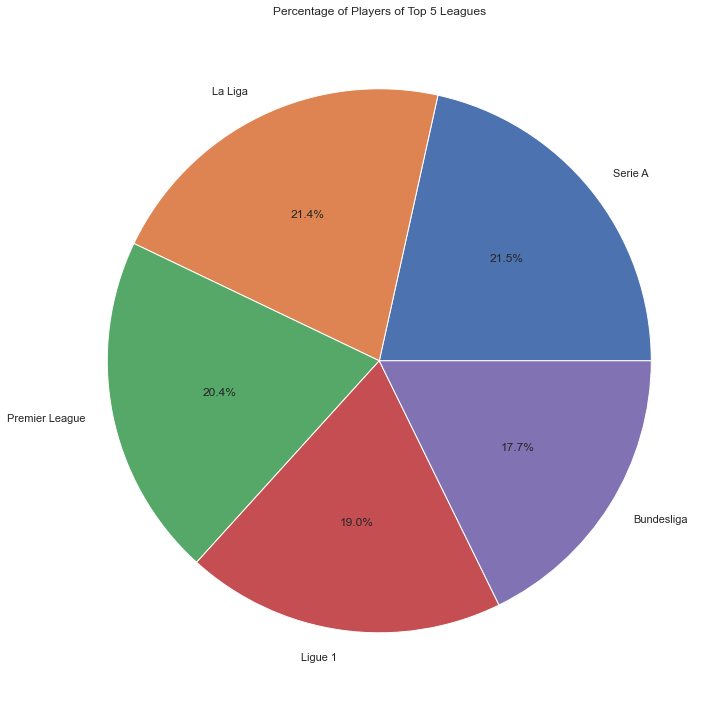

In [19]:
# Create a pie chart to visualize the distribution of players across the top 5 leagues.
# 'Competition' column is used to count the number of players per league.
# The percentages of players in each league are displayed on the chart.
plt.figure(figsize=(14, 10))
plt.pie(x=data['Competition'].value_counts(),labels=data['Competition'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of Players of Top 5 Leagues')
plt.tight_layout()
plt.show()

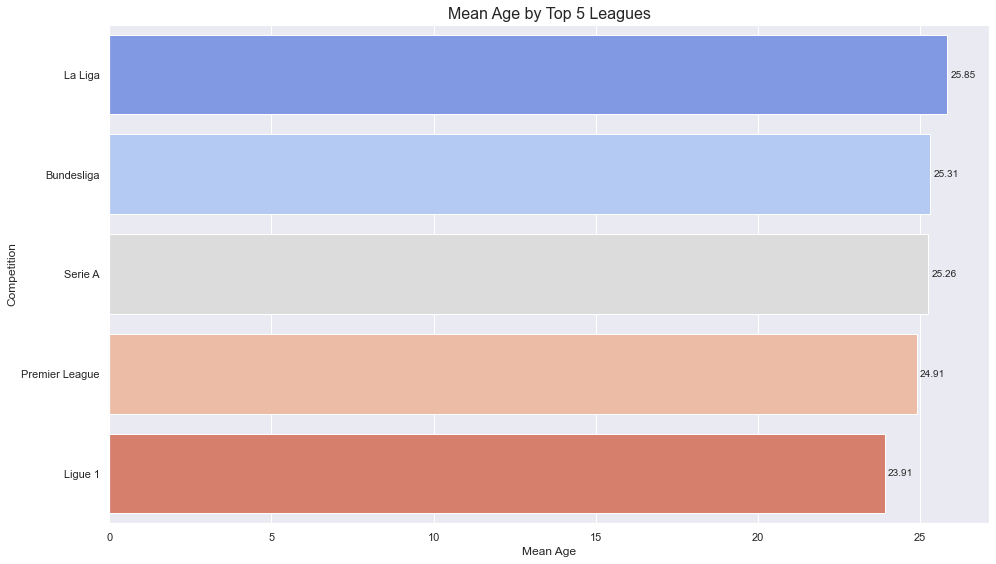

In [20]:
# Calculate and visualize the average age of players in each league:
# - Group the data by 'Competition' and compute the mean age for each league.
# - Sort the leagues by average age in descending order and select the top 10.
# - Create a horizontal bar chart to compare the mean age of players across leagues.
top_10_league_Mean_Age = data.groupby(['Competition'])['Age'].mean().reset_index()
top_10_league_Mean_Age = top_10_league_Mean_Age.sort_values(by='Age', ascending=False).head(10)
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_10_league_Mean_Age, x='Age', y='Competition', palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mean Age by Top 5 Leagues', fontsize=16)
plt.xlabel('Mean Age', fontsize=12)
plt.ylabel('Competition', fontsize=12)
plt.tight_layout()
plt.show()

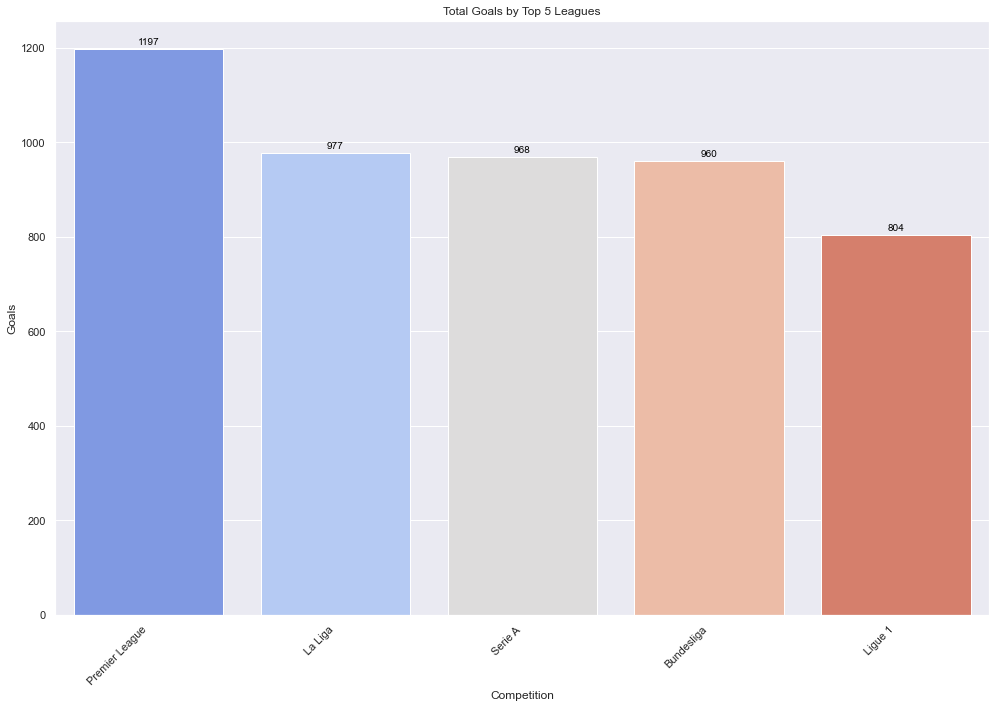

In [21]:
# Calculate and visualize the total number of goals scored in each league:
# - Group the data by 'Competition' and sum up the goals ('Gls') for each league.
# - Sort the leagues by total goals in descending order and select the top 10.
# - Create a bar chart to compare the total goals across leagues.
top_10_league_Gls = data.groupby(['Competition'])['Gls'].sum().reset_index()
top_10_league_Gls = top_10_league_Gls.sort_values(by='Gls', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_Gls,x='Competition',y='Gls', palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 5,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.xticks(rotation=45,ha='right')
plt.title('Total Goals by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.tight_layout()
plt.show()

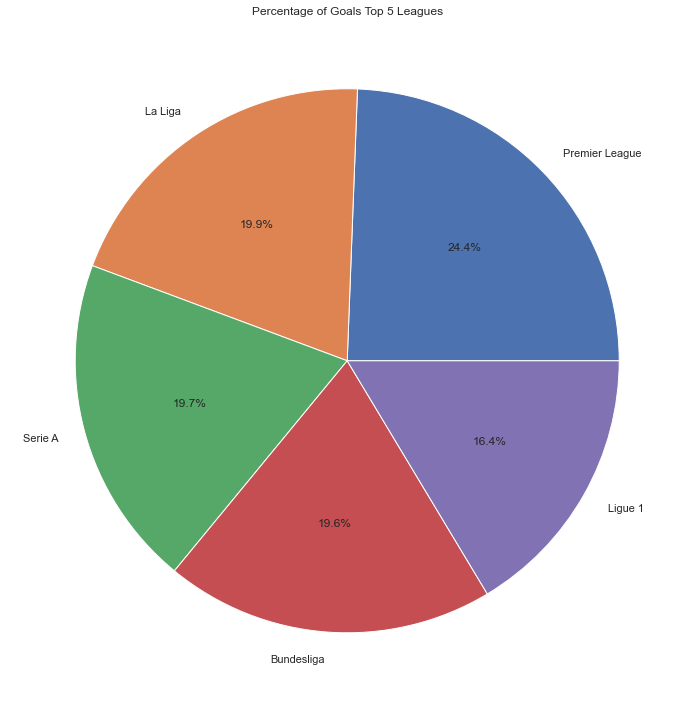

In [22]:
# Create a pie chart to show the percentage distribution of total goals among the top 5 leagues:
# - Use the total goals ('Gls') for each league from the previously calculated top_10_league_Gls dataset.
# - Display the league names as labels and annotate each slice with its percentage contribution.
plt.figure(figsize=(14, 10))
plt.pie(x=top_10_league_Gls['Gls'],labels=top_10_league_Gls['Competition'],autopct='%1.1f%%')
plt.title('Percentage of Goals Top 5 Leagues')
plt.tight_layout()
plt.show()

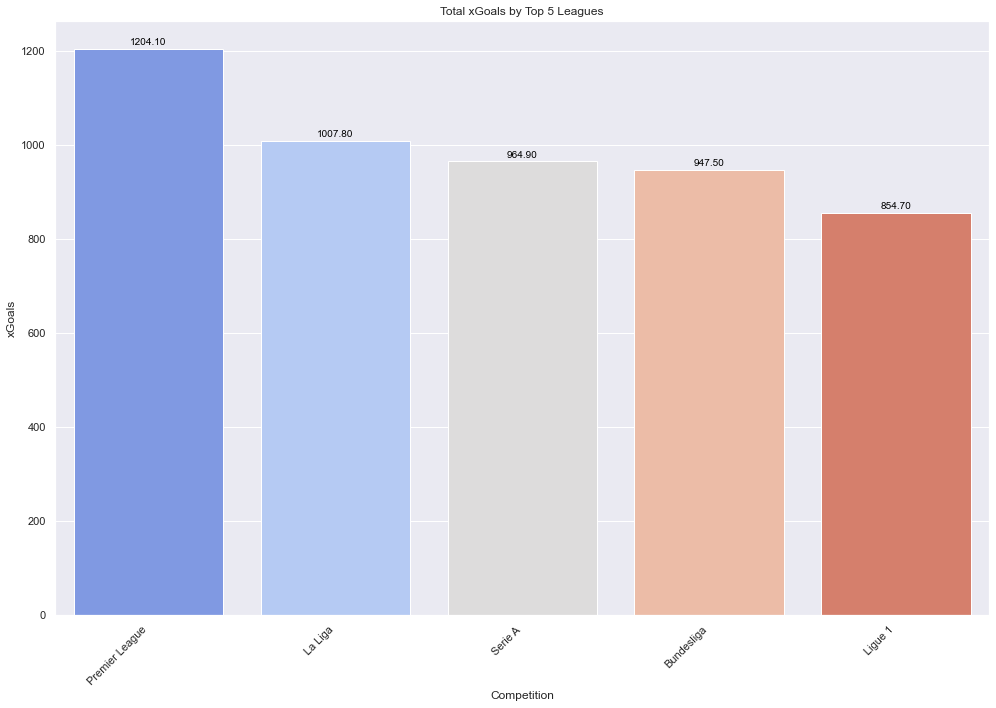

In [23]:
# Calculate and visualize the total expected goals (xG) for each league:
# - Group the data by 'Competition' and sum up the expected goals ('xG') for each league.
# - Sort the leagues by total xG in descending order and select the top 10.
# - Create a bar chart to compare the total xG across leagues.
top_10_league_xG = data.groupby(['Competition'])['xG'].sum().reset_index()
top_10_league_xG = top_10_league_xG.sort_values(by='xG', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_xG,x='Competition',y='xG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,  
        p.get_height() + 5,            
        f'{p.get_height():.2f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.xticks(rotation=45,ha='right')
plt.title('Total xGoals by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('xGoals', fontsize=12)
plt.tight_layout()
plt.show()

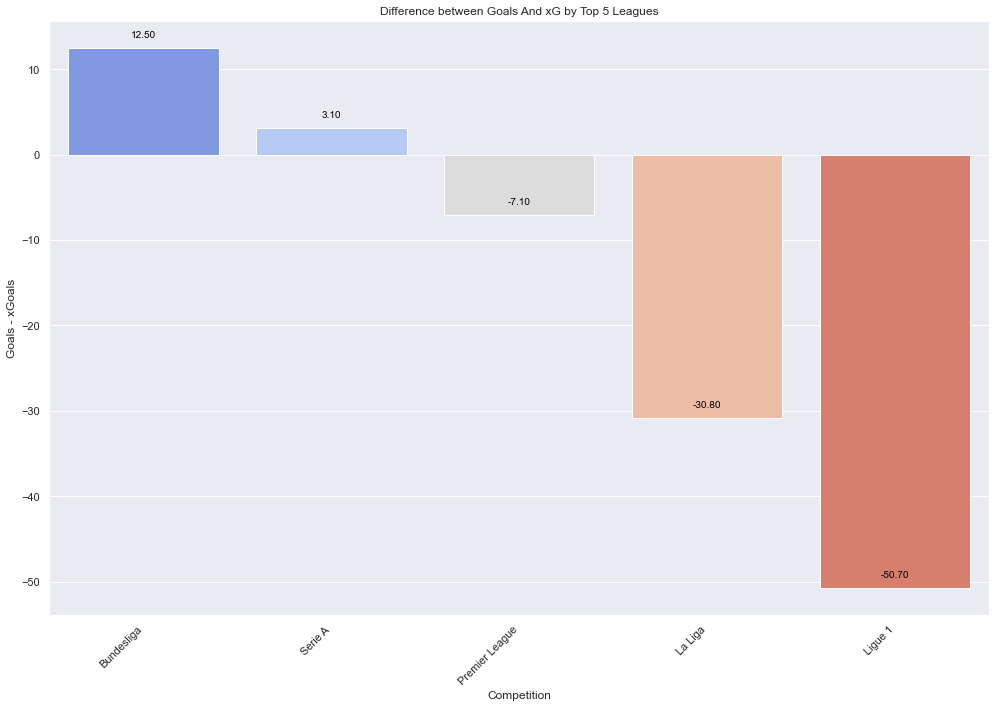

In [24]:
# Calculate and visualize the total difference between goals scored (Gls) and expected goals (xG) for each league:
# - Group the data by 'Competition' and sum the difference between Gls and xG ('Gls-xG') for each league.
# - Sort the leagues by the total Gls-xG difference in descending order and select the top 10.
# - Create a bar chart to compare the Gls-xG differences across leagues
top_10_league_Gls_xG = data.groupby(['Competition'])['Gls-xG'].sum().reset_index()
top_10_league_Gls_xG = top_10_league_Gls_xG.sort_values(by='Gls-xG', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_Gls_xG,x='Competition',y='Gls-xG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,  
        p.get_height() + 1,            
        f'{p.get_height():.2f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.xticks(rotation=45,ha='right')
plt.title('Difference between Goals And xG by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Goals - xGoals', fontsize=12)
plt.tight_layout()
plt.show()

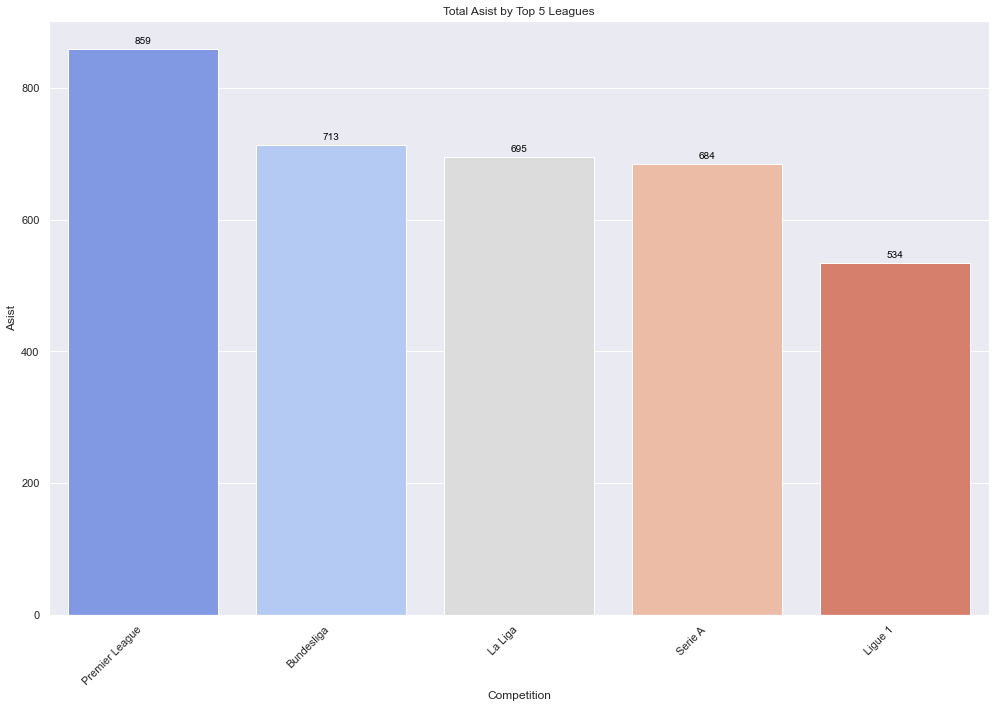

In [25]:
# Calculate and visualize the total number of assists (Ast) for each league:
# - Group the data by 'Competition' and sum the assists ('Ast') for each league.
# - Sort the leagues by total assists in descending order and select the top 10.
# - Create a bar chart to compare the total assists across leagues.
top_10_league_Ast = data.groupby(['Competition'])['Ast'].sum().reset_index()
top_10_league_Ast = top_10_league_Ast.sort_values(by='Ast', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_Ast,x='Competition',y='Ast',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 5,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.xticks(rotation=45,ha='right')
plt.title('Total Asist by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Asist', fontsize=12)
plt.tight_layout()
plt.show()

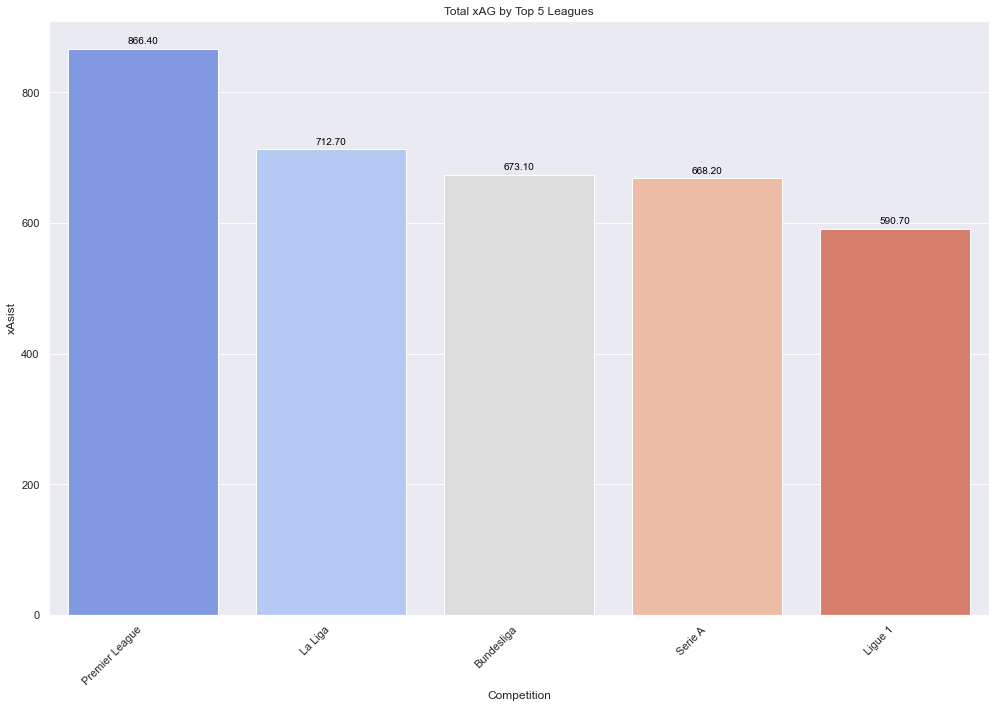

In [26]:
# Calculate and visualize the total expected assists (xAG) for each league:
# - Group the data by 'Competition' and sum the expected assists ('xAG') for each league.
# - Sort the leagues by total xAG in descending order and select the top 10.
# - Create a bar chart to compare the total expected assists across leagues.
top_10_league_xAG = data.groupby(['Competition'])['xAG'].sum().reset_index()
top_10_league_xAG = top_10_league_xAG.sort_values(by='xAG', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_xAG,x='Competition',y='xAG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 5,             
        f'{p.get_height():.2f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.xticks(rotation=45,ha='right')
plt.title('Total xAG by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('xAsist', fontsize=12)
plt.tight_layout()
plt.show()

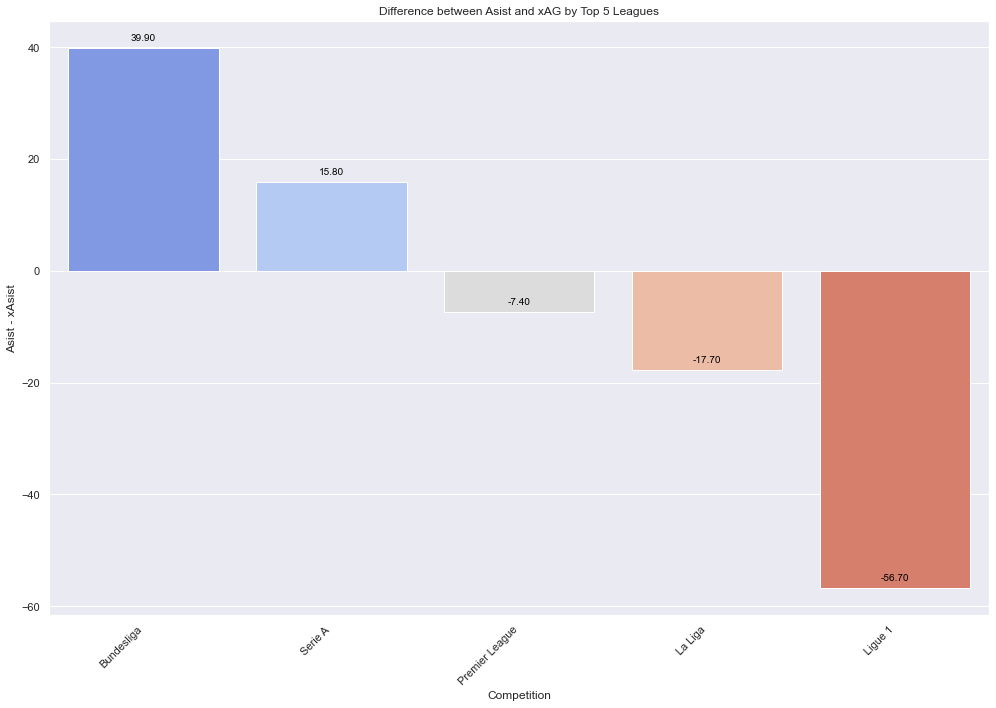

In [27]:
# Calculate and visualize the total difference between assists (Ast) and expected assists (xAG) for each league:
# - Group the data by 'Competition' and sum the difference between Ast and xAG ('Ast-xAG') for each league.
# - Sort the leagues by the total Ast-xAG difference in descending order and select the top 10.
# - Create a bar chart to compare the Ast-xAG differences across leagues.
top_10_league_Ast_xAG = data.groupby(['Competition'])['Ast-xAG'].sum().reset_index()
top_10_league_Ast_xAG = top_10_league_Ast_xAG.sort_values(by='Ast-xAG', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_Ast_xAG,x='Competition',y='Ast-xAG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 1,             
        f'{p.get_height():.2f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xticks(rotation=45,ha='right')
plt.title('Difference between Asist and xAG by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Asist - xAsist', fontsize=12)
plt.tight_layout()
plt.show()

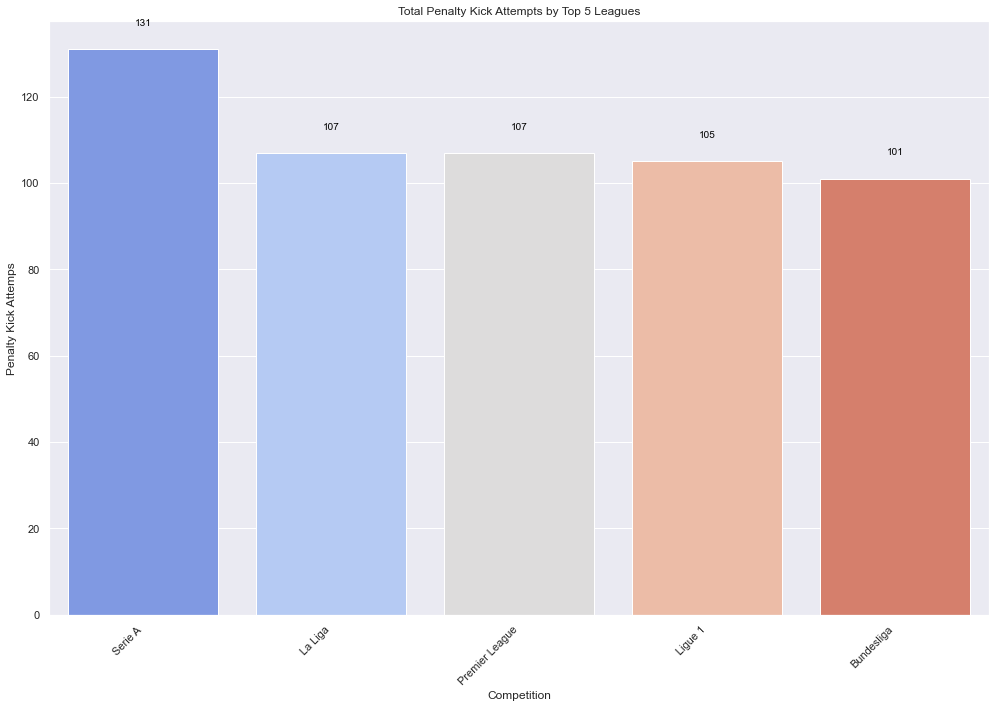

In [28]:
# Calculate and visualize the total number of penalty kick attempts (PKatt) for each league:
# - Group the data by 'Competition' and sum the penalty kick attempts ('PKatt') for each league.
# - Sort the leagues by total penalty kick attempts in descending order and select the top 10.
# - Create a bar chart to compare the total penalty kick attempts across leagues.
top_10_league_PKatt = data.groupby(['Competition'])['PKatt'].sum().reset_index()
top_10_league_PKatt = top_10_league_PKatt.sort_values(by='PKatt', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_PKatt,x='Competition',y='PKatt', palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 5,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.xticks(rotation=45,ha='right')
plt.title('Total Penalty Kick Attempts by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Penalty Kick Attemps', fontsize=12)
plt.tight_layout()
plt.show()

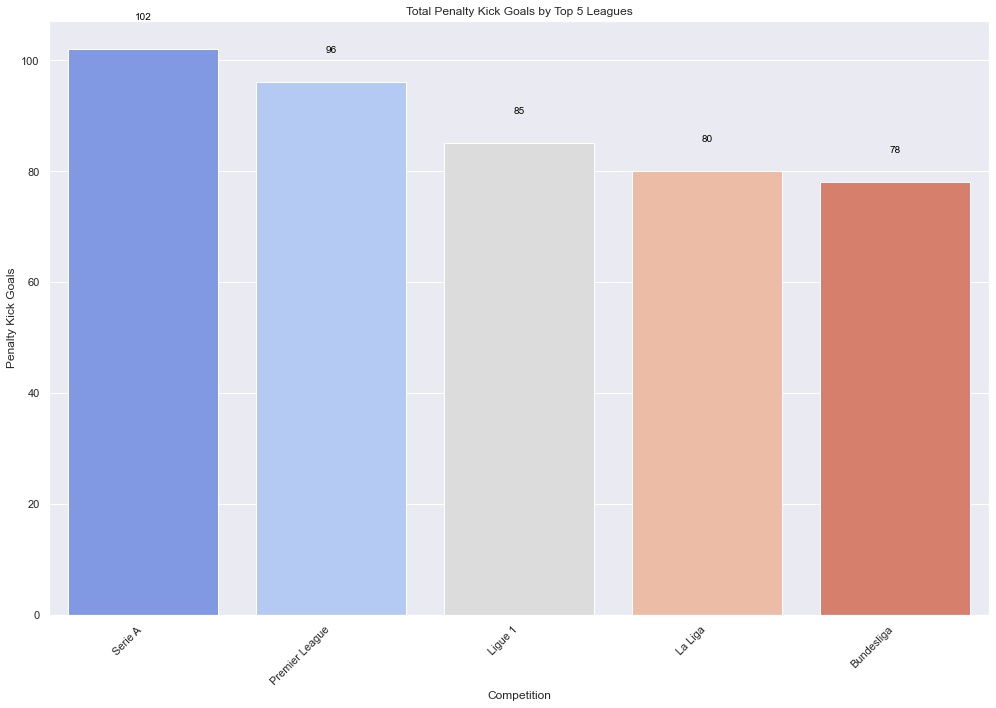

In [29]:
# Calculate and visualize the total number of penalty kick goals (PK) for each league:
# - Group the data by 'Competition' and sum the penalty kick goals ('PK') for each league.
# - Sort the leagues by total penalty kick goals in descending order and select the top 10.
# - Create a bar chart to compare the total penalty kick goals across leagues.
top_10_league_PK = data.groupby(['Competition'])['PK'].sum().reset_index()
top_10_league_PK = top_10_league_PK.sort_values(by='PK', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_PK,x='Competition',y='PK', palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 5,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.xticks(rotation=45,ha='right')
plt.title('Total Penalty Kick Goals by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Penalty Kick Goals', fontsize=12)
plt.tight_layout()
plt.show()

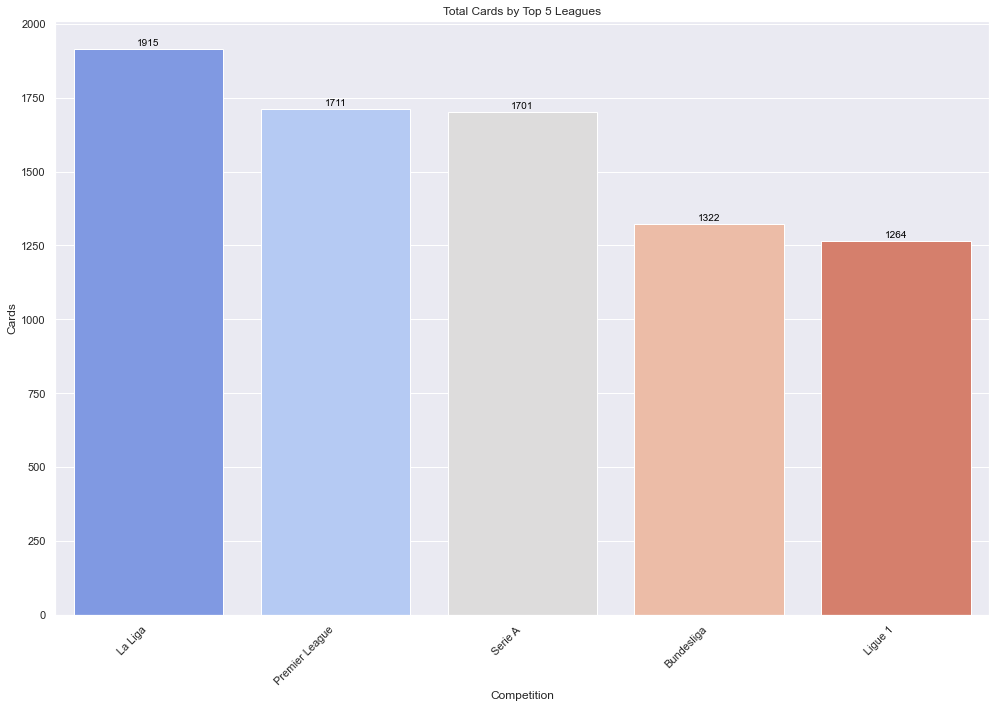

In [30]:
# Calculate and visualize the total number of cards (yellow and red) for each league:
# - Group the data by 'Competition' and calculate the sum of yellow cards ('CrdY') and red cards ('CrdR') for each league.
# - Add a new column 'TotalCards' to represent the total number of cards (yellow + red).
# - Sort the leagues by total cards in descending order and select the top 10.
# - Create a bar chart to compare the total number of cards across leagues.
cards_by_competition = data.groupby('Competition')[['CrdY', 'CrdR']].sum().reset_index()
cards_by_competition['TotalCards'] = (cards_by_competition['CrdY'] + cards_by_competition['CrdR'])
cards_by_competition = cards_by_competition.sort_values(by='TotalCards', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=cards_by_competition,x='Competition',y='TotalCards', palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 5,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.xticks(rotation=45,ha='right')
plt.title('Total Cards by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Cards', fontsize=12)
plt.tight_layout()
plt.show()

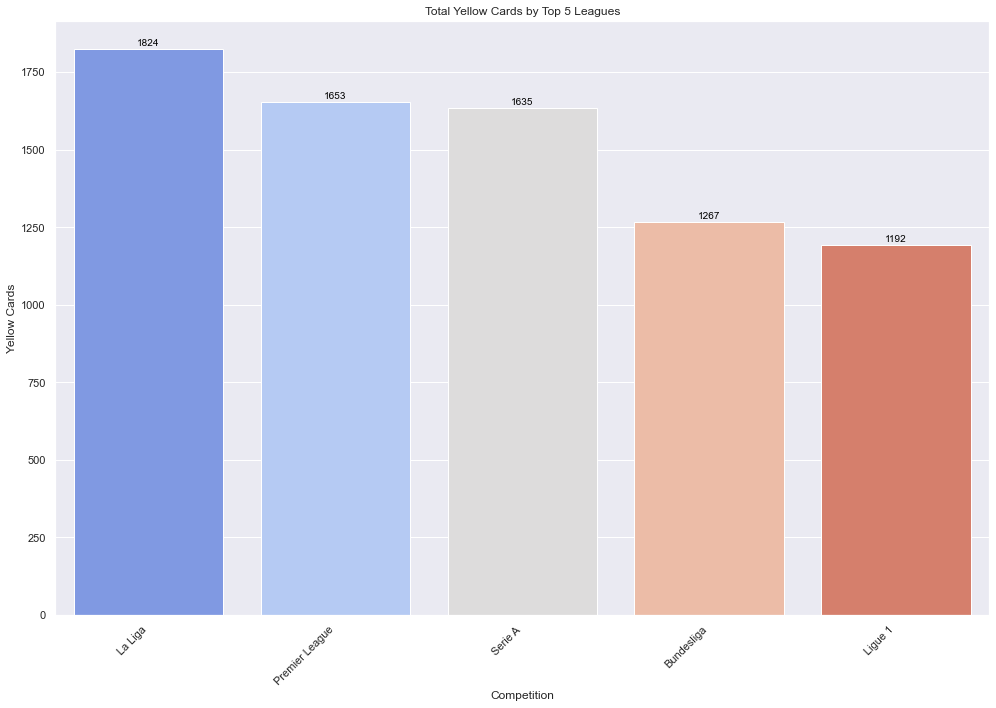

In [31]:
# Calculate and visualize the total number of yellow cards (CrdY) for each league:
# - Group the data by 'Competition' and calculate the sum of yellow cards ('CrdY') for each league.
# - Sort the leagues by total yellow cards in descending order and select the top 10.
# - Create a bar chart to compare the total number of yellow cards across leagues.
top_10_league_CrdY = data.groupby(['Competition'])['CrdY'].sum().reset_index()
top_10_league_CrdY = top_10_league_CrdY.sort_values(by='CrdY', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_CrdY,x='Competition',y='CrdY', palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 5,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xticks(rotation=45,ha='right')
plt.title('Total Yellow Cards by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Yellow Cards', fontsize=12)
plt.tight_layout()
plt.show()

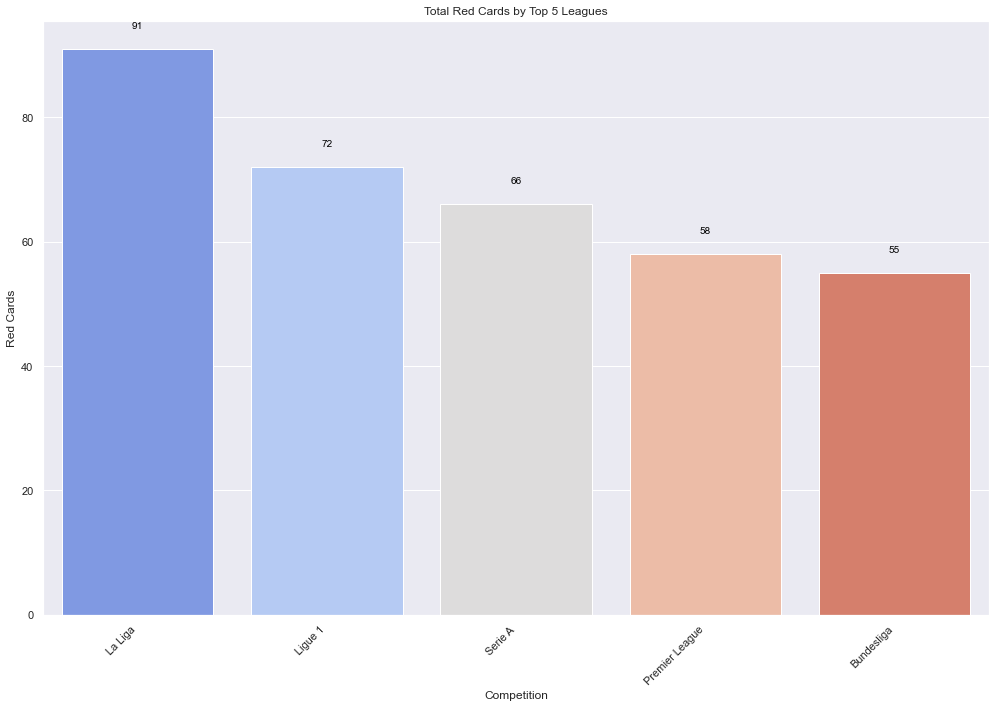

In [32]:
# Calculate and visualize the total number of red cards (CrdR) for each league:
# - Group the data by 'Competition' and calculate the sum of red cards ('CrdR') for each league.
# - Sort the leagues by total red cards in descending order and select the top 10.
# - Create a bar chart to compare the total number of red cards across leagues.
top_10_league_CrdR = data.groupby(['Competition'])['CrdR'].sum().reset_index()
top_10_league_CrdR = top_10_league_CrdR.sort_values(by='CrdR', ascending=False).head(10)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=top_10_league_CrdR,x='Competition',y='CrdR', palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 3,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xticks(rotation=45,ha='right')
plt.title('Total Red Cards by Top 5 Leagues')
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Red Cards', fontsize=12)
plt.tight_layout()
plt.show()

# Teams Analysis

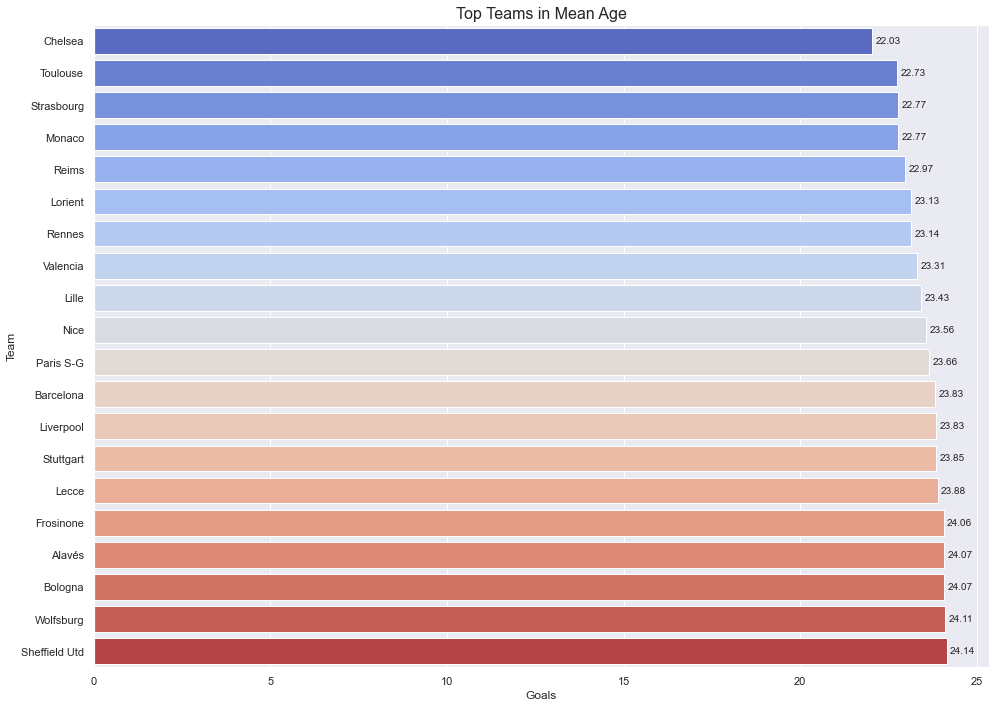

In [33]:
# Calculate and visualize the average age of players for each team:
# - Group the data by 'Team' and calculate the mean age for each team.
# - Sort the teams by average age in ascending order and select the top 20 teams with the lowest average age.
# - Create a horizontal bar chart to compare the average age of players across teams.
top_clubs_average_age = data.groupby('Team')['Age'].mean().reset_index().sort_values(by='Age', ascending=True)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_average_age[:20], y='Team', x='Age',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Mean Age', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

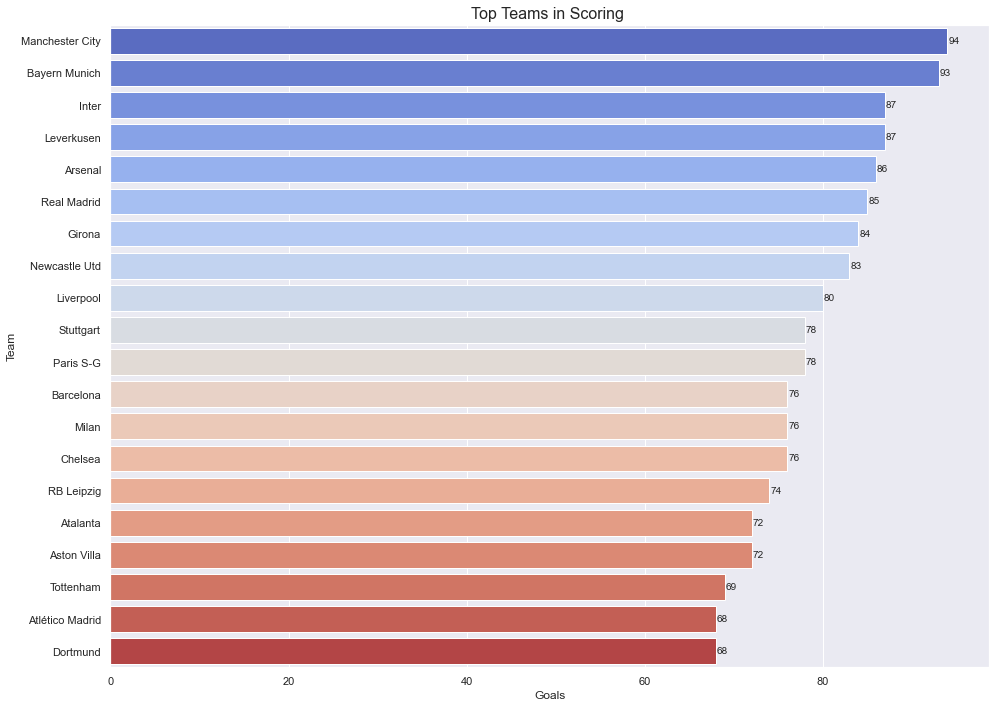

In [34]:
# Calculate and visualize the total goals scored by each team:
# - Group the data by 'Team' and calculate the total goals ('Gls') for each team.
# - Sort the teams by total goals in descending order and select the top 20 scoring teams.
# - Create a horizontal bar chart to compare the total goals scored by the top teams.
top_clubs_scores = data.groupby('Team')['Gls'].sum().reset_index().sort_values(by='Gls', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_scores[:20], y='Team', x='Gls',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Scoring ', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

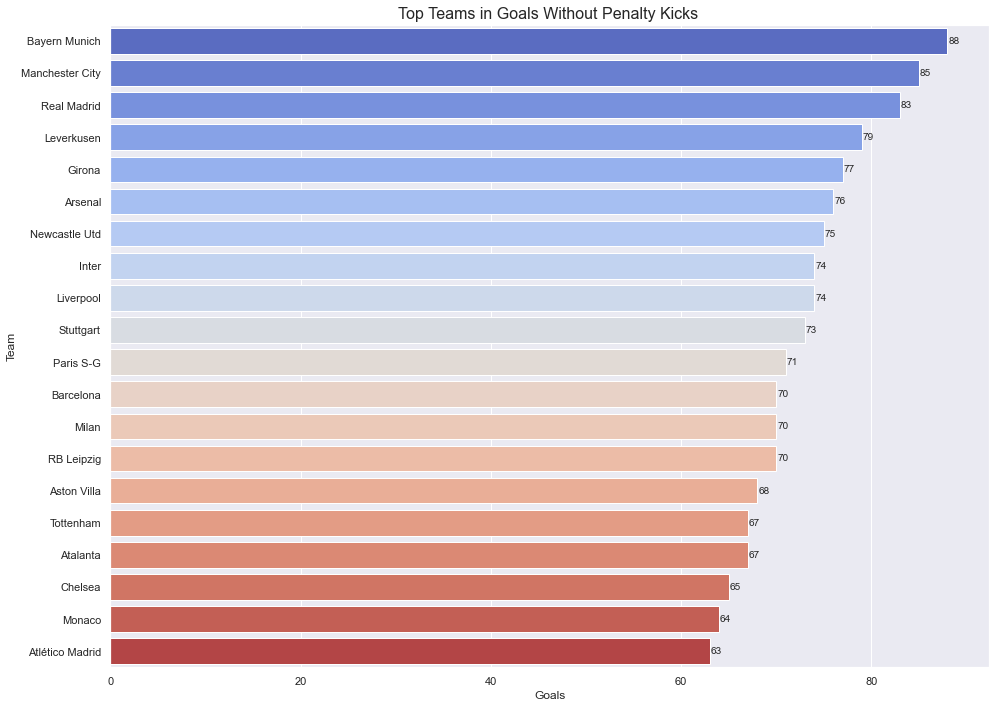

In [35]:
# Calculate and visualize the total goals scored by each team excluding penalty kicks (G-PK):
# - Group the data by 'Team' and calculate the total goals excluding penalty kicks ('G-PK') for each team.
# - Sort the teams by total non-penalty goals in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total goals (excluding penalty kicks) scored by the top teams.
top_clubs_G_PK = data.groupby('Team')['G-PK'].sum().reset_index().sort_values(by='G-PK', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_G_PK[:20], y='Team', x='G-PK',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Goals Without Penalty Kicks ', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

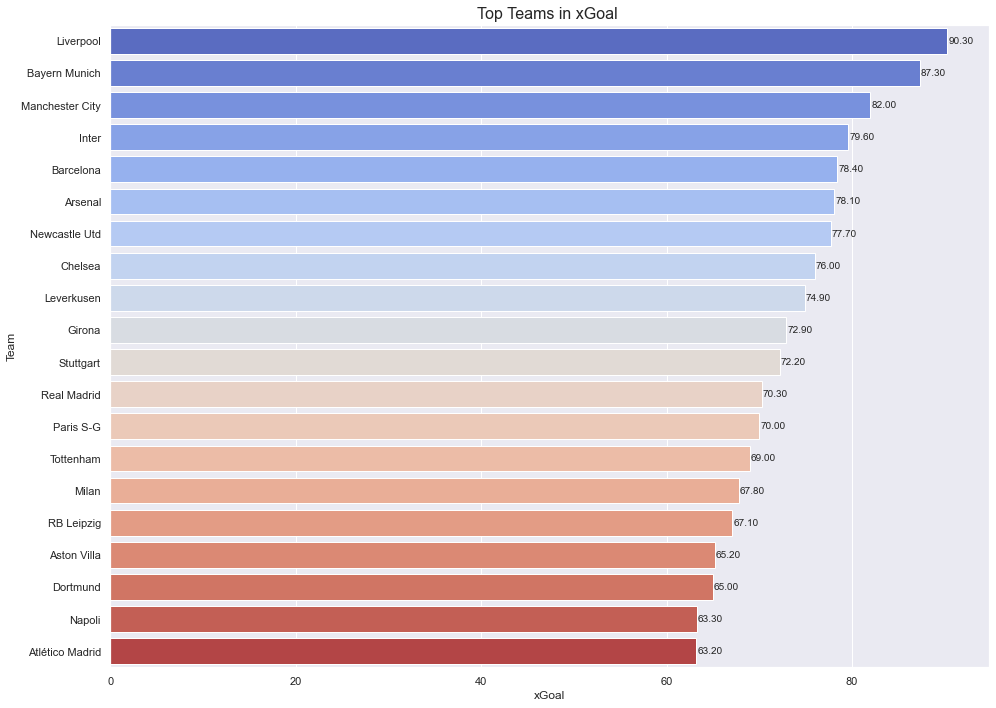

In [36]:
# Calculate and visualize the total expected goals (xG) for each team:
# - Group the data by 'Team' and calculate the total expected goals ('xG') for each team.
# - Sort the teams by total xG in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total expected goals scored by the top teams.
top_clubs_xg = data.groupby('Team')['xG'].sum().reset_index().sort_values(by='xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_xg[:20], y='Team', x='xG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in xGoal ', fontsize=16)
plt.xlabel('xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

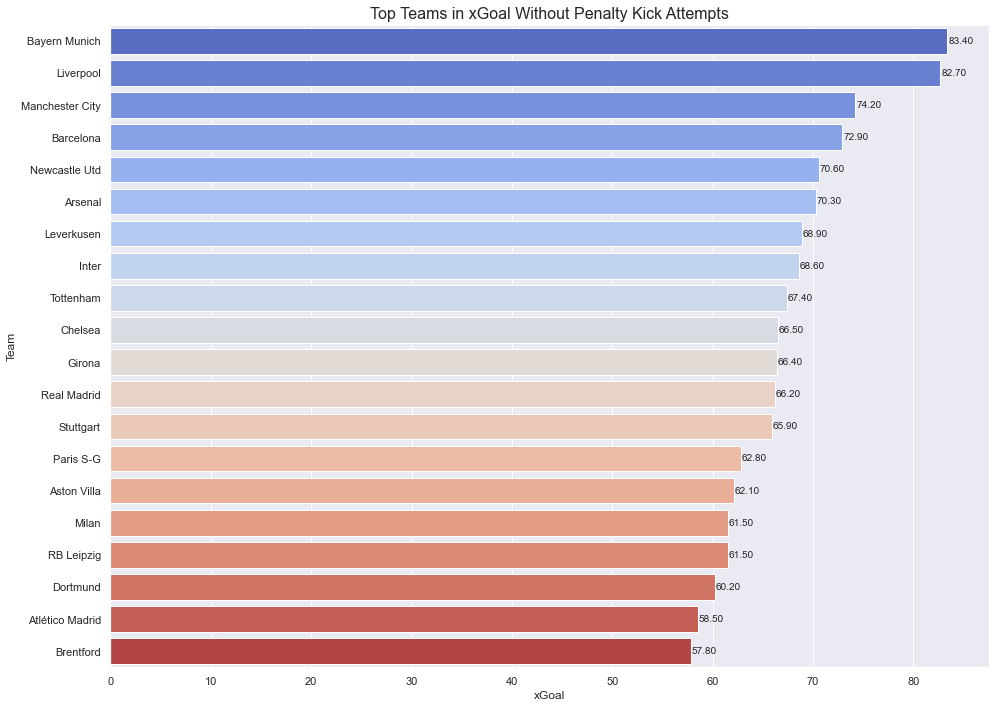

In [37]:
# Calculate and visualize the total expected goals (xG) excluding penalty kicks (npxG) for each team:
# - Group the data by 'Team' and calculate the total non-penalty expected goals ('npxG') for each team.
# - Sort the teams by total npxG in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total non-penalty expected goals scored by the top teams.
top_clubs_npxG = data.groupby('Team')['npxG'].sum().reset_index().sort_values(by='npxG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_npxG[:20], y='Team', x='npxG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in xGoal Without Penalty Kick Attempts', fontsize=16)
plt.xlabel('xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

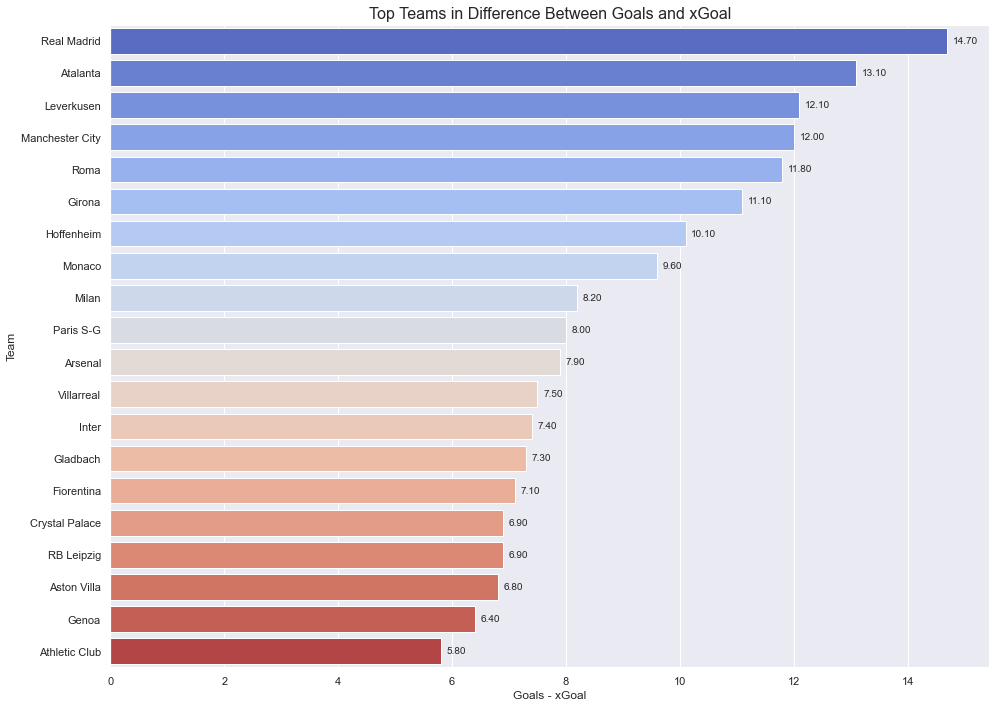

In [38]:
# Calculate and visualize the difference between goals scored (Gls) and expected goals (xG) for each team:
# - Group the data by 'Team' and calculate the sum of the difference between goals and expected goals ('Gls-xG') for each team.
# - Sort the teams by the total Gls-xG difference in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the difference between goals and expected goals across teams.
top_clubs_gls_xg = data.groupby('Team')['Gls-xG'].sum().reset_index().sort_values(by='Gls-xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_gls_xg[:20], y='Team', x='Gls-xG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Difference Between Goals and xGoal', fontsize=16)
plt.xlabel('Goals - xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

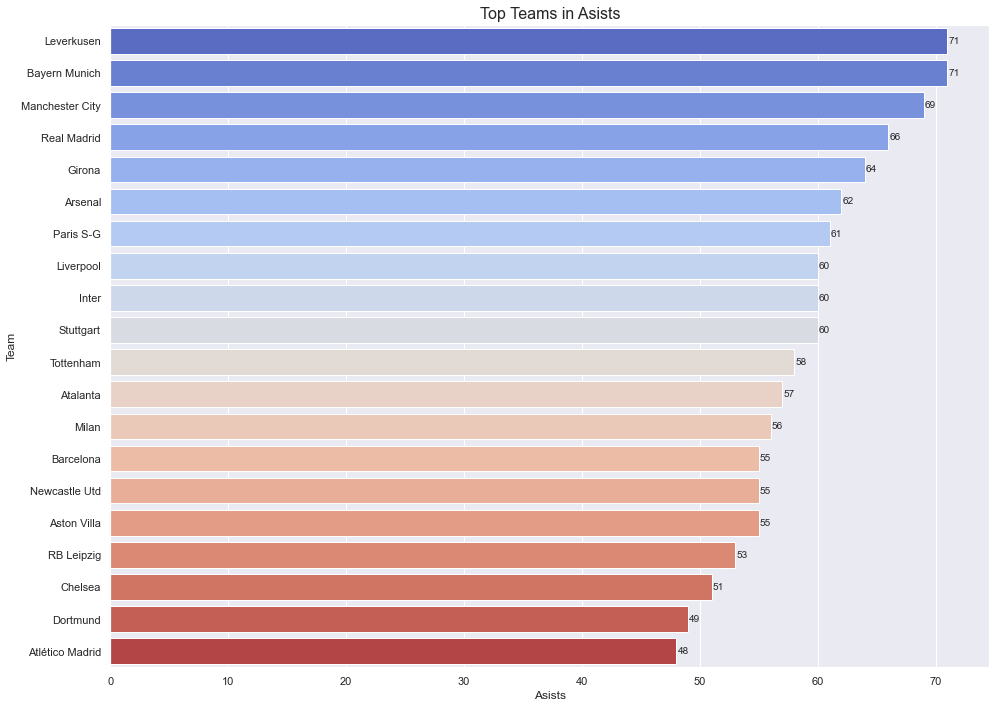

In [39]:
# Calculate and visualize the total number of assists (Ast) for each team:
# - Group the data by 'Team' and calculate the total assists ('Ast') for each team.
# - Sort the teams by total assists in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total assists across the top teams.
top_clubs_Ast = data.groupby('Team')['Ast'].sum().reset_index().sort_values(by='Ast', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_Ast[:20], y='Team', x='Ast',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Asists', fontsize=16)
plt.xlabel('Asists', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

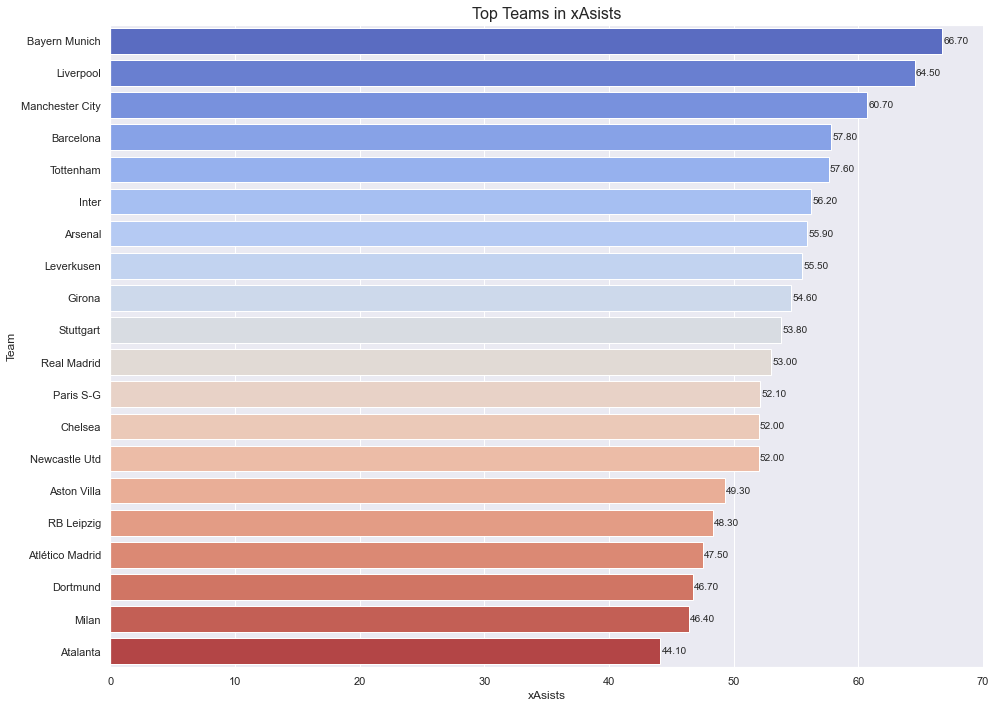

In [40]:
# Calculate and visualize the total expected assists (xAG) for each team:
# - Group the data by 'Team' and calculate the total expected assists ('xAG') for each team.
# - Sort the teams by total xAG in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total expected assists across the top teams.
top_clubs_xAG = data.groupby('Team')['xAG'].sum().reset_index().sort_values(by='xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_xAG[:20], y='Team', x='xAG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in xAsists', fontsize=16)
plt.xlabel('xAsists', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

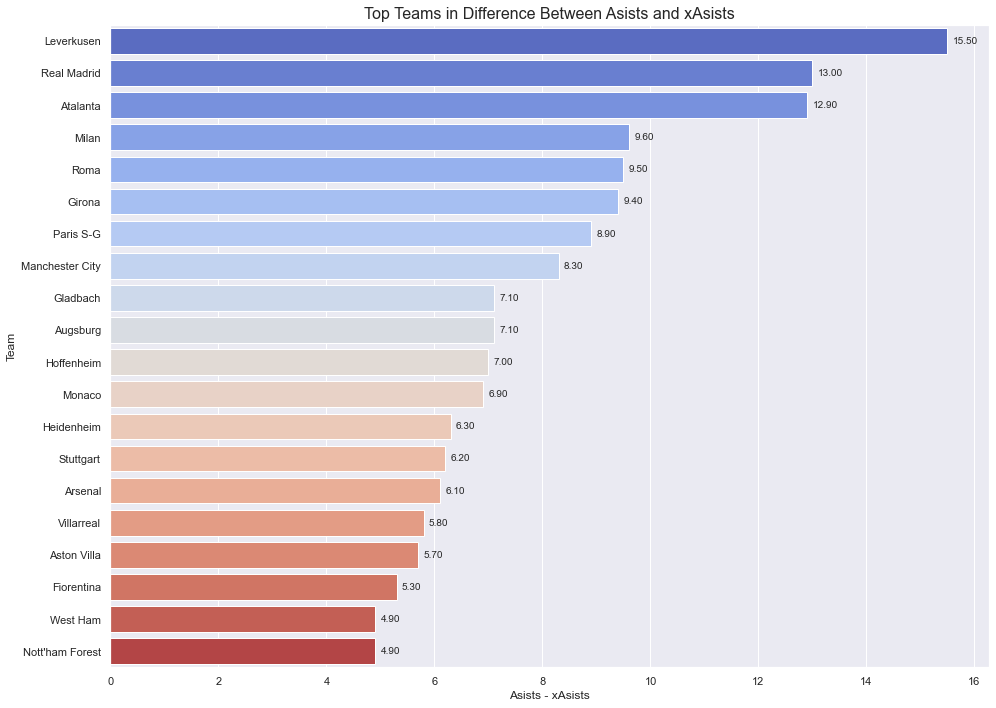

In [41]:
# Calculate and visualize the difference between assists (Ast) and expected assists (xAG) for each team:
# - Group the data by 'Team' and calculate the total difference between Ast and xAG ('Ast-xAG') for each team.
# - Sort the teams by the total Ast-xAG difference in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the difference between actual assists and expected assists across teams.
# - Annotate each bar with the exact Ast-xAG value for better clarity.
top_clubs_Ast_xAG = data.groupby('Team')['Ast-xAG'].sum().reset_index().sort_values(by='Ast-xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_Ast_xAG[:20], y='Team', x='Ast-xAG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Difference Between Asists and xAsists', fontsize=16)
plt.xlabel('Asists - xAsists', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

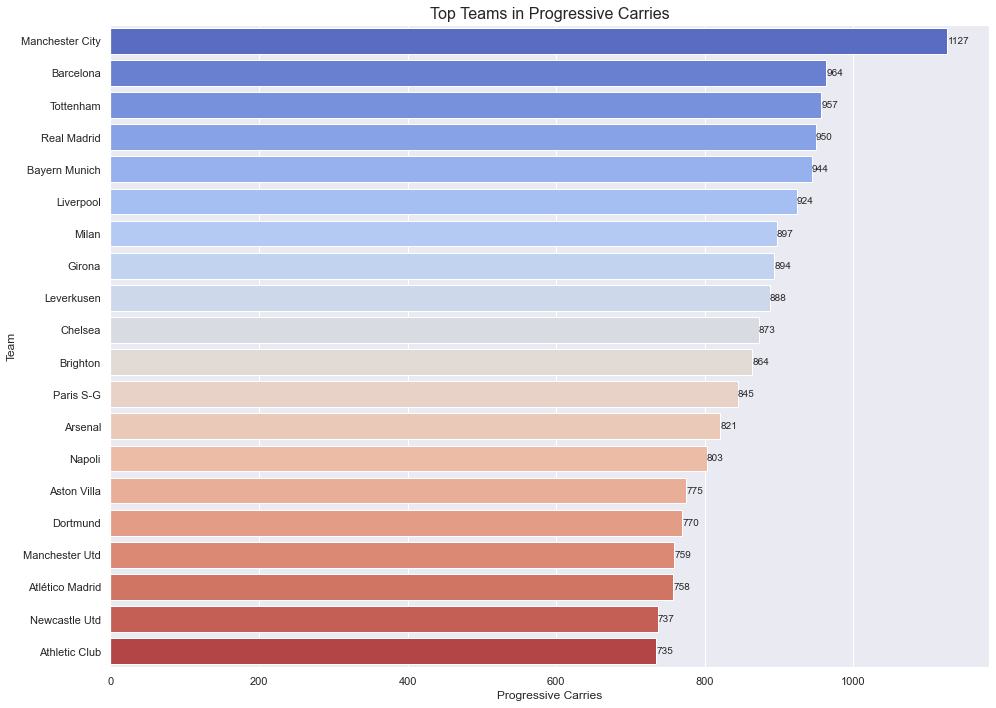

In [42]:
# Calculate and visualize the total number of progressive carries (PrgC) for each team:
# - Group the data by 'Team' and calculate the total progressive carries ('PrgC') for each team.
# - Sort the teams by total progressive carries in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total progressive carries across the top teams.
top_clubs_PrgC = data.groupby('Team')['PrgC'].sum().reset_index().sort_values(by='PrgC', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_PrgC[:20], y='Team', x='PrgC',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Progressive Carries', fontsize=16)
plt.xlabel('Progressive Carries', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

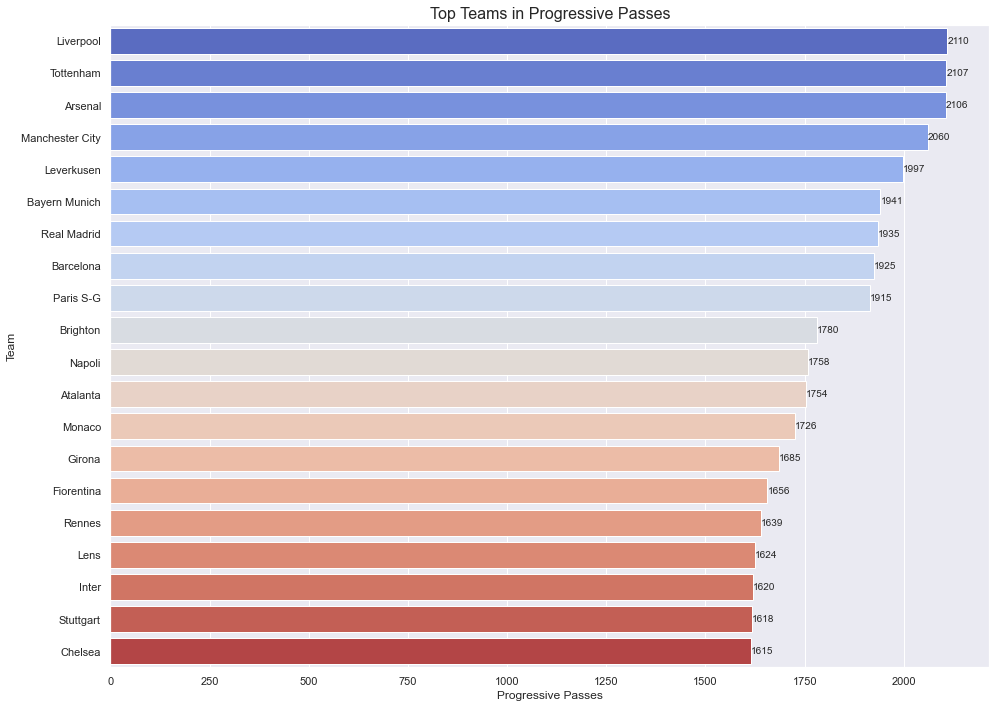

In [43]:
# Calculate and visualize the total number of progressive passes (PrgP) for each team:
# - Group the data by 'Team' and calculate the total progressive passes ('PrgP') for each team.
# - Sort the teams by total progressive passes in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total progressive passes across the top teams.
top_clubs_PrgP = data.groupby('Team')['PrgP'].sum().reset_index().sort_values(by='PrgP', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_PrgP[:20], y='Team', x='PrgP',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Progressive Passes', fontsize=16)
plt.xlabel('Progressive Passes', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

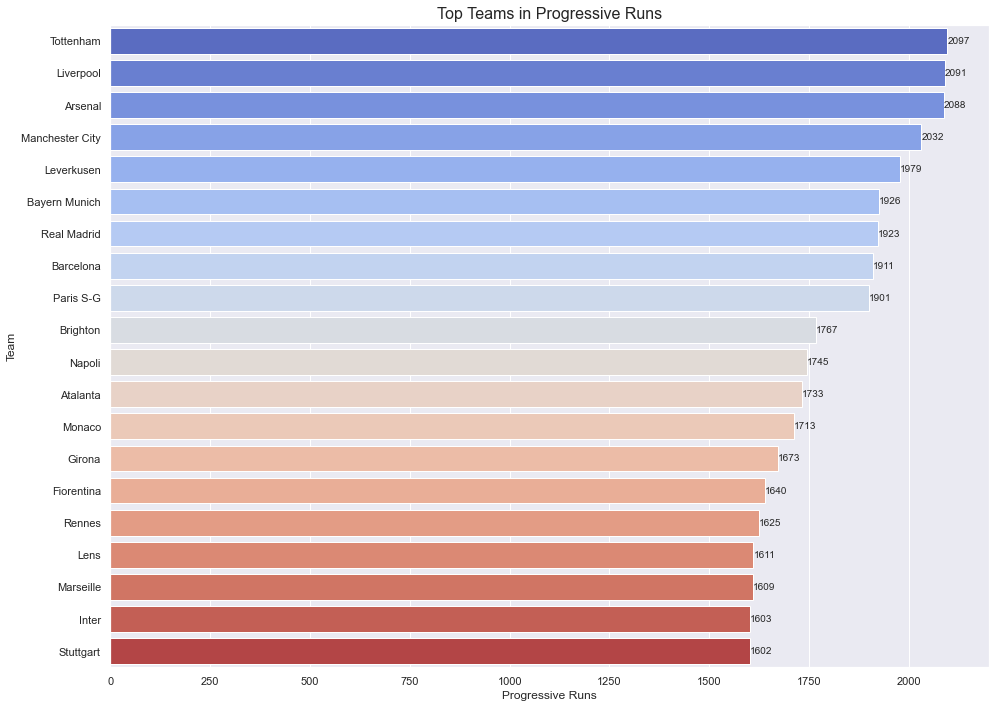

In [44]:
# Calculate and visualize the total number of progressive runs (PrgR) for each team:
# - Group the data by 'Team' and calculate the total progressive runs ('PrgR') for each team.
# - Sort the teams by total progressive runs in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total progressive runs across the top teams.
top_clubs_PrgR = data.groupby('Team')['PrgR'].sum().reset_index().sort_values(by='PrgR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_PrgR[:20], y='Team', x='PrgR',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Progressive Runs', fontsize=16)
plt.xlabel('Progressive Runs', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

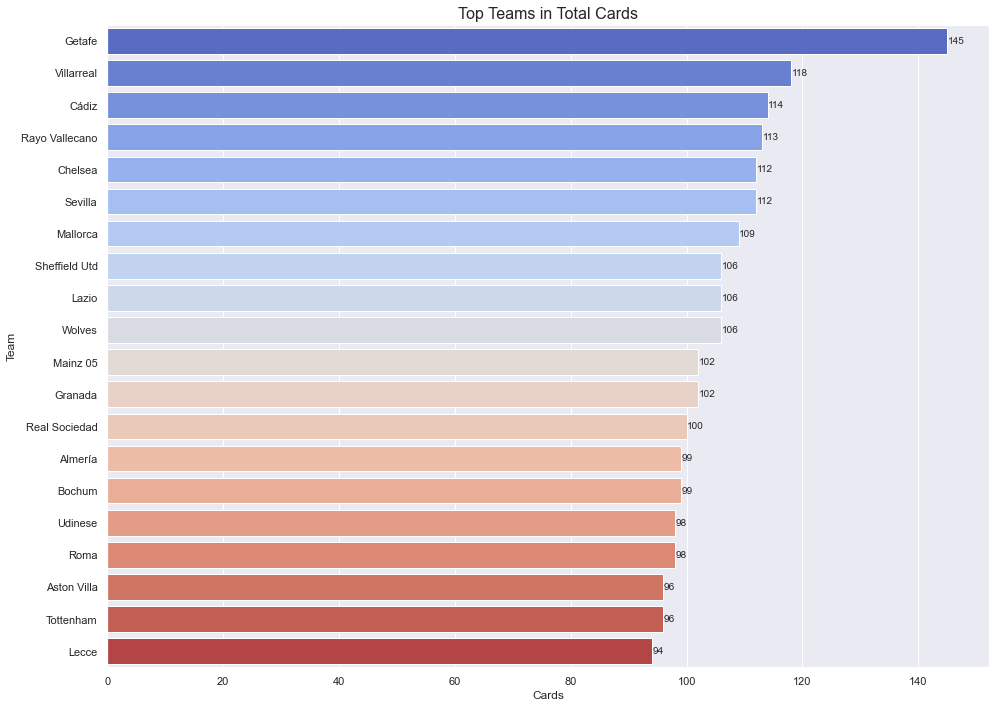

In [45]:
# Calculate and visualize the total number of cards (yellow and red) for each team:
# - Group the data by 'Team' and calculate the sum of yellow cards ('CrdY') and red cards ('CrdR') for each team.
# - Add a new column 'TotalCards' to represent the total number of cards (yellow + red).
# - Sort the teams by total cards in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total number of cards across the top teams.
cards_by_team = data.groupby('Team')[['CrdY', 'CrdR']].sum().reset_index()
cards_by_team['TotalCards'] = (cards_by_team['CrdY'] + cards_by_team['CrdR'])
cards_by_team = cards_by_team.sort_values(by='TotalCards', ascending=False).head(20)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=cards_by_team[:20], y='Team', x='TotalCards',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Total Cards', fontsize=16)
plt.xlabel('Cards', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

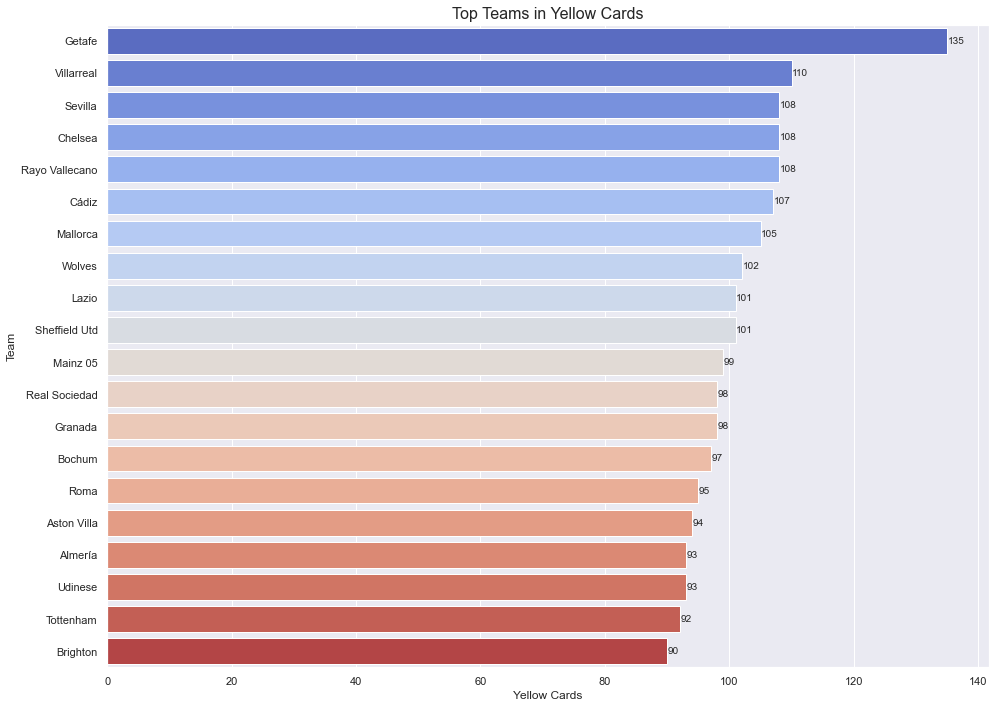

In [46]:
# Calculate and visualize the total number of yellow cards (CrdY) for each team:
# - Group the data by 'Team' and calculate the sum of yellow cards ('CrdY') for each team.
# - Sort the teams by total yellow cards in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total yellow cards across the top teams.
top_clubs_CrdY = data.groupby('Team')['CrdY'].sum().reset_index().sort_values(by='CrdY', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_CrdY[:20], y='Team', x='CrdY',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Yellow Cards', fontsize=16)
plt.xlabel('Yellow Cards', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

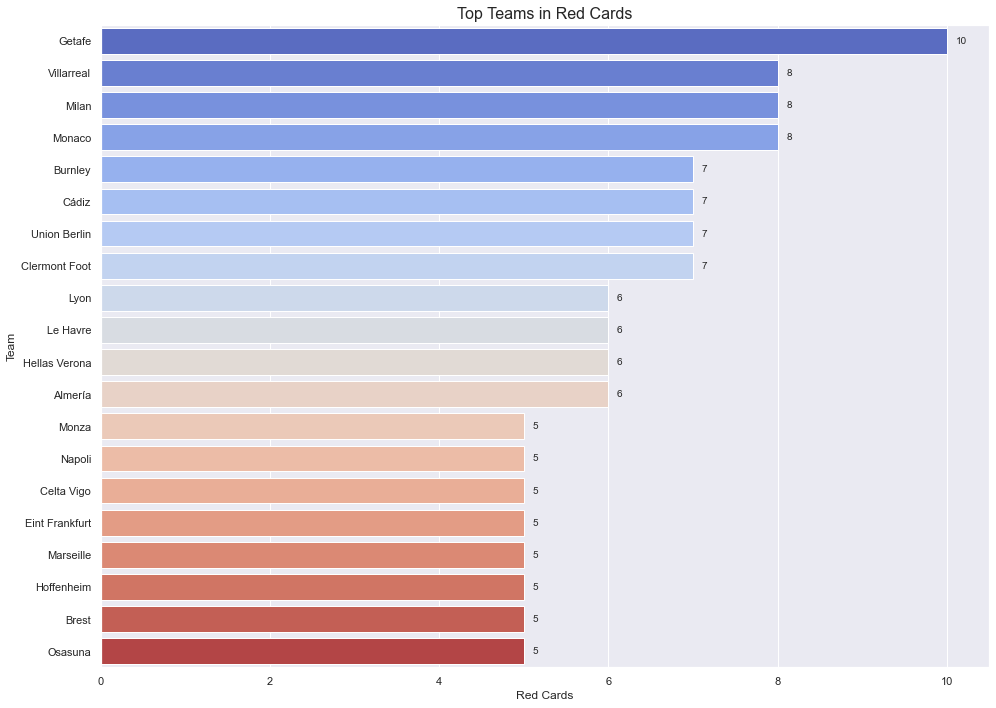

In [47]:
# Calculate and visualize the total number of red cards (CrdR) for each team:
# - Group the data by 'Team' and calculate the sum of red cards ('CrdR') for each team.
# - Sort the teams by total red cards in descending order and select the top 20 teams.
# - Create a horizontal bar chart to compare the total red cards across the top teams.
top_clubs_CrdR = data.groupby('Team')['CrdR'].sum().reset_index().sort_values(by='CrdR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_clubs_CrdR[:20], y='Team', x='CrdR',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Teams in Red Cards', fontsize=16)
plt.xlabel('Red Cards', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

# Players Analysis

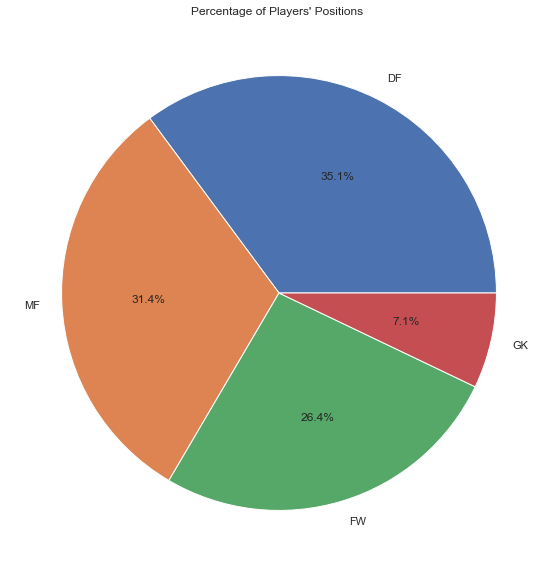

In [48]:
# Create a pie chart to visualize the percentage distribution of players' positions:
# - Use the 'Position' column to count the number of players for each position.
# - Display the position names as labels and annotate each slice with its percentage contribution.
plt.figure(figsize=(14, 10))
plt.pie(x=data['Position'].value_counts(),labels=data['Position'].value_counts().index,autopct='%1.1f%%')
plt.title("Percentage of Players' Positions ")
plt.show()

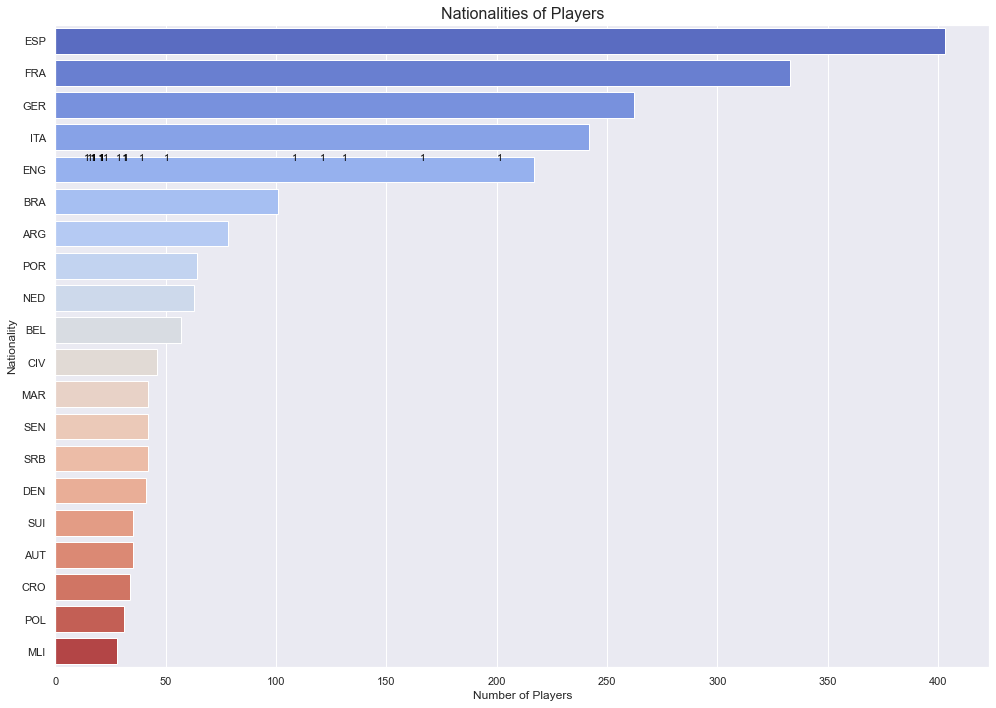

In [49]:
# Calculate and visualize the number of players from each nationality:
# - Group the data by 'Nationality' and count the number of players for each nationality.
# - Sort the nationalities by the total number of players in descending order and select the top 20.
# - Create a horizontal bar chart to compare the number of players from different nationalities.
players_nation = data.groupby(['Nationality']).count().reset_index()
players_nation = players_nation.sort_values(by='Rk', ascending=False).head(20)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=players_nation, x='Rk',y='Nationality' , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 3,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Nationalities of Players', fontsize=16)
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.tight_layout()
plt.show()

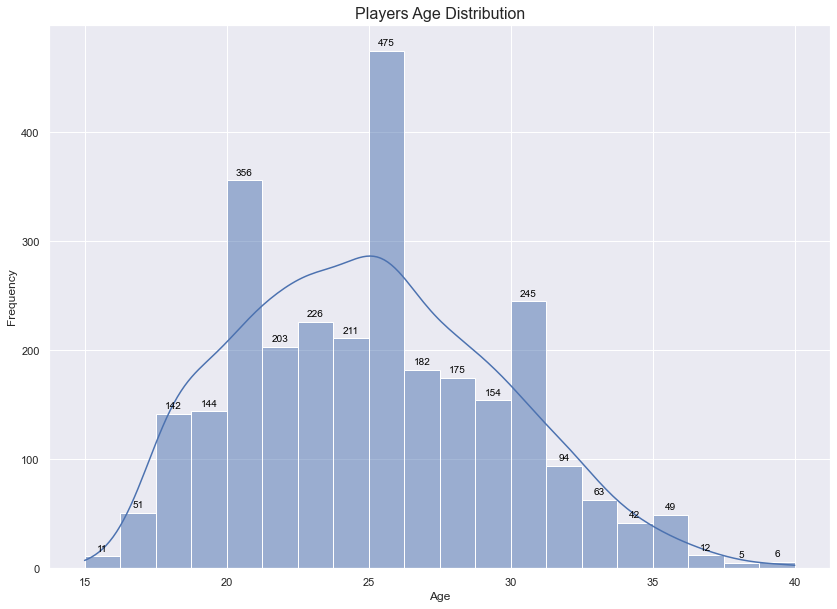

In [50]:
# Visualize the age distribution of players:
# - Create a histogram to show the frequency distribution of players' ages.
age_dist = data['Age']
plt.figure(figsize=(14, 10))
ax = sns.histplot(age_dist, kde=True, bins=20) 

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 3,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Players Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

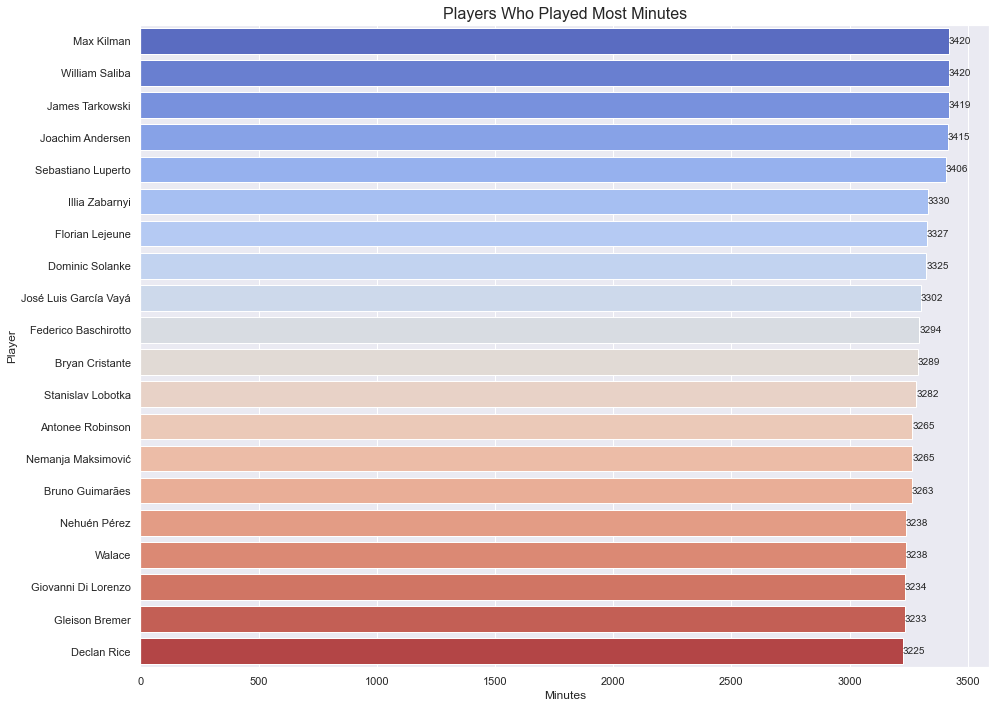

In [51]:
# Visualize the players (excluding goalkeepers) who played the most minutes:
# - Filter out goalkeepers ('GK') from the dataset to focus on outfield players.
# - Select the 'Player' and 'Min' columns and sort the players by minutes played in descending order.
# - Select the top 20 players with the most minutes played.
# - Create a horizontal bar chart to compare the total minutes played across these players.
players_not_gk = data[data['Position'] != 'GK']
players_most_min = players_not_gk[['Player','Min']].sort_values(by='Min', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=players_most_min[:20], y='Player', x='Min', order=players_most_min[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Players Who Played Most Minutes', fontsize=16)
plt.xlabel('Minutes', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

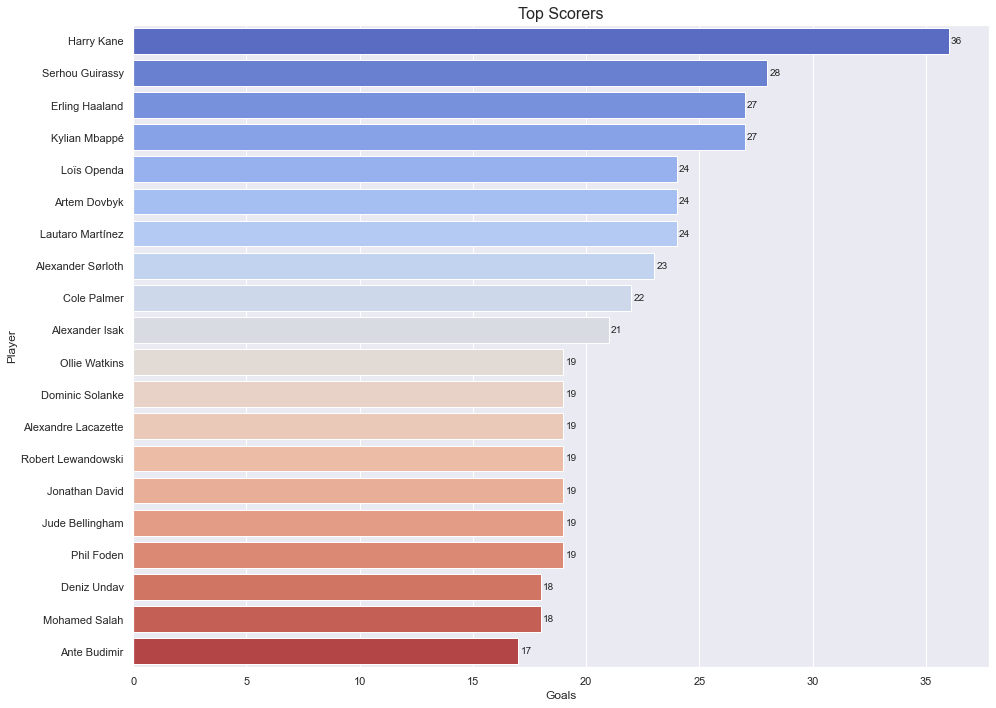

In [52]:
# Visualize the top goal scorers:
# - Select the 'Player' and 'Gls' columns to focus on players and their total goals scored.
# - Sort the players by goals scored ('Gls') in descending order.
# - Select the top 20 players with the most goals.
# - Create a horizontal bar chart to compare the total goals scored across these players.
top_scorers = data[['Player','Gls']].sort_values(by='Gls', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_scorers[:20], y='Player', x='Gls', order=top_scorers[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Scorers', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

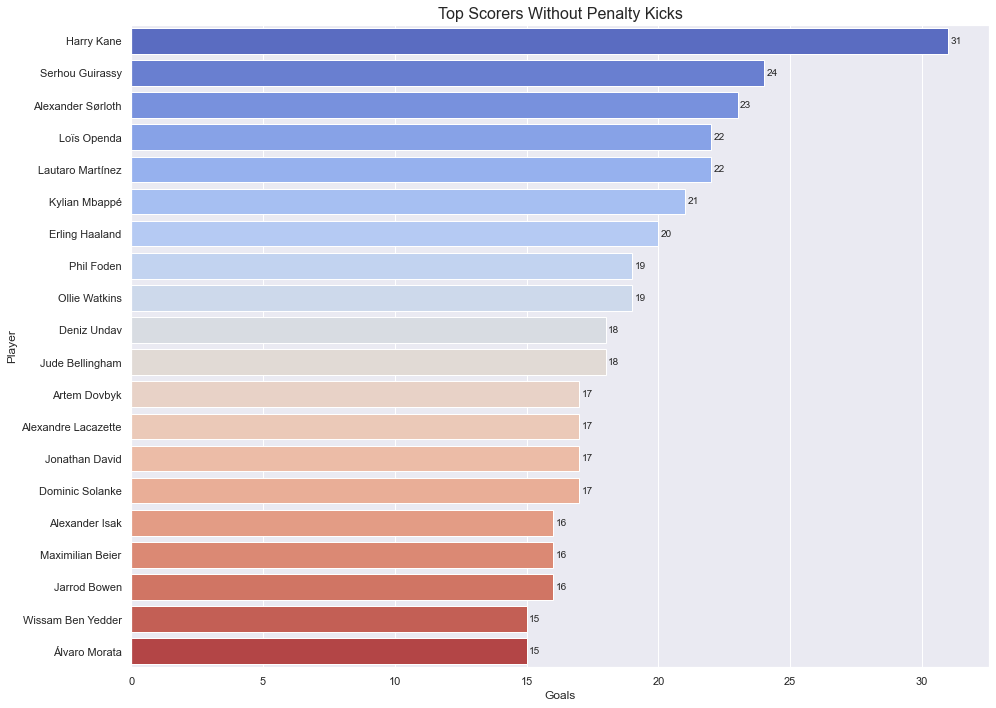

In [53]:
# Visualize the top scorers excluding penalty kick goals:
# - Select the 'Player' and 'G-PK' columns to focus on players and their total non-penalty goals.
# - Sort the players by non-penalty goals ('G-PK') in descending order.
# - Select the top 20 players with the most goals excluding penalty kicks.
# - Create a horizontal bar chart to compare the total non-penalty goals scored across these players.
top_players_G_PK = data[['Player','G-PK']].sort_values(by='G-PK', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_G_PK[:20], y='Player', x='G-PK', order=top_players_G_PK[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Scorers Without Penalty Kicks', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

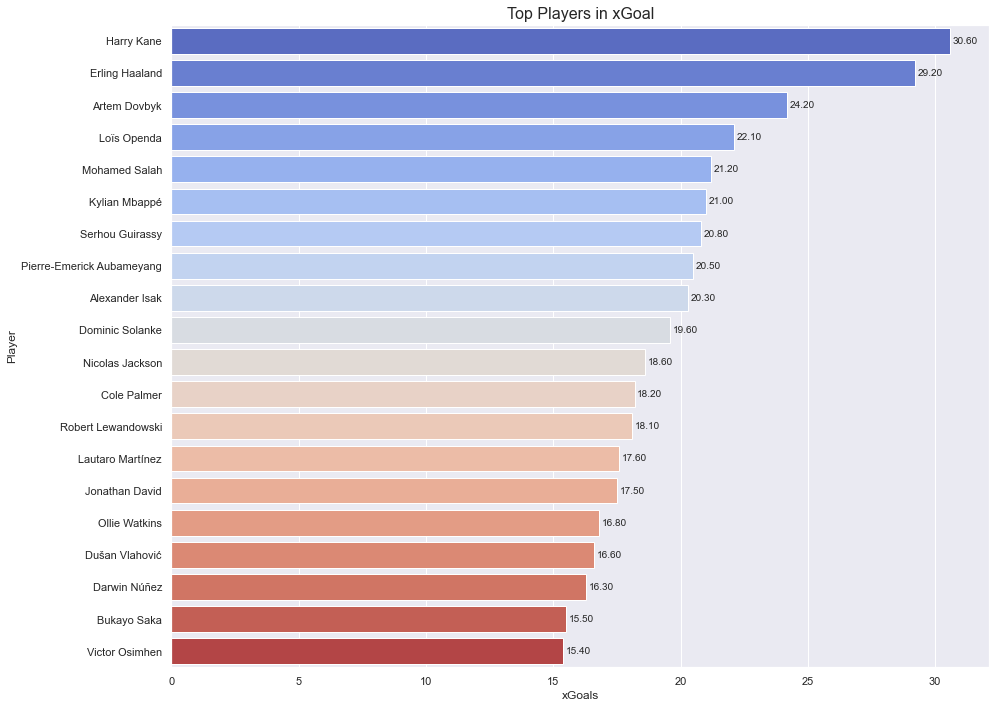

In [54]:
# Visualize the top players in expected goals (xG):
# - Select the 'Player' and 'xG' columns to focus on players and their total expected goals.
# - Sort the players by expected goals ('xG') in descending order.
# - Select the top 20 players with the highest expected goals.
# - Create a horizontal bar chart to compare the total expected goals across these players.
top_players_xg = data[['Player','xG']].sort_values(by='xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_xg[:20], y='Player', x='xG', order=top_players_xg[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Players in xGoal', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

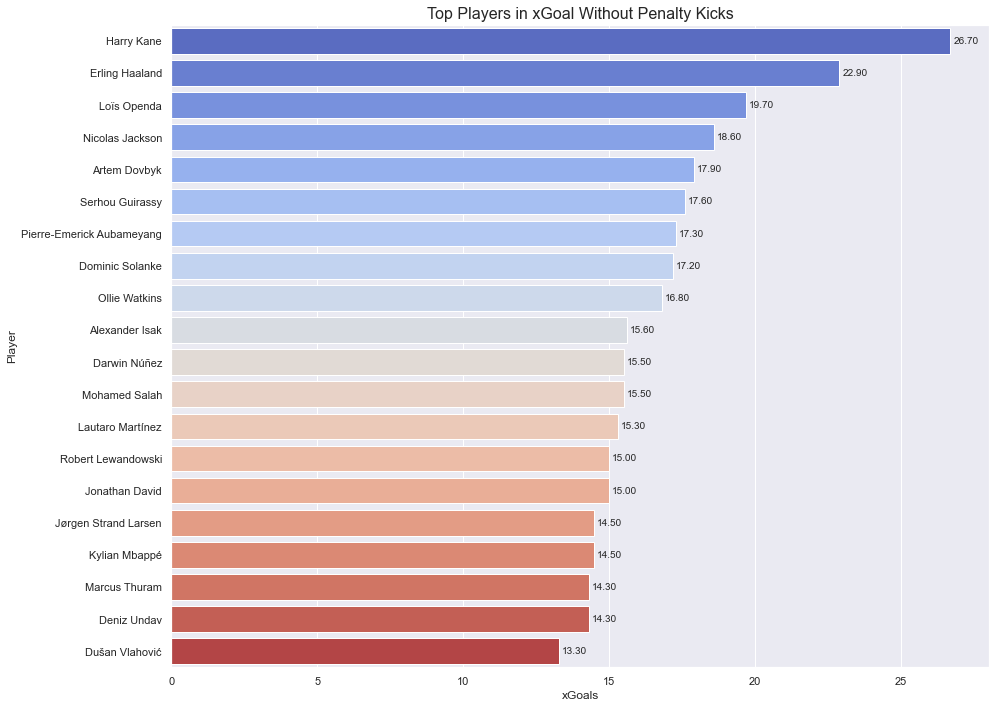

In [55]:
# Visualize the top players in expected goals (xG) excluding penalty kicks:
# - Select the 'Player' and 'npxG' columns to focus on players and their total non-penalty expected goals.
# - Sort the players by non-penalty expected goals ('npxG') in descending order.
# - Select the top 20 players with the highest non-penalty xG values.
# - Create a horizontal bar chart to compare the total non-penalty xG across these players.
top_players_npxG = data[['Player','npxG']].sort_values(by='npxG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_npxG[:20], y='Player', x='npxG', order=top_players_npxG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Players in xGoal Without Penalty Kicks', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

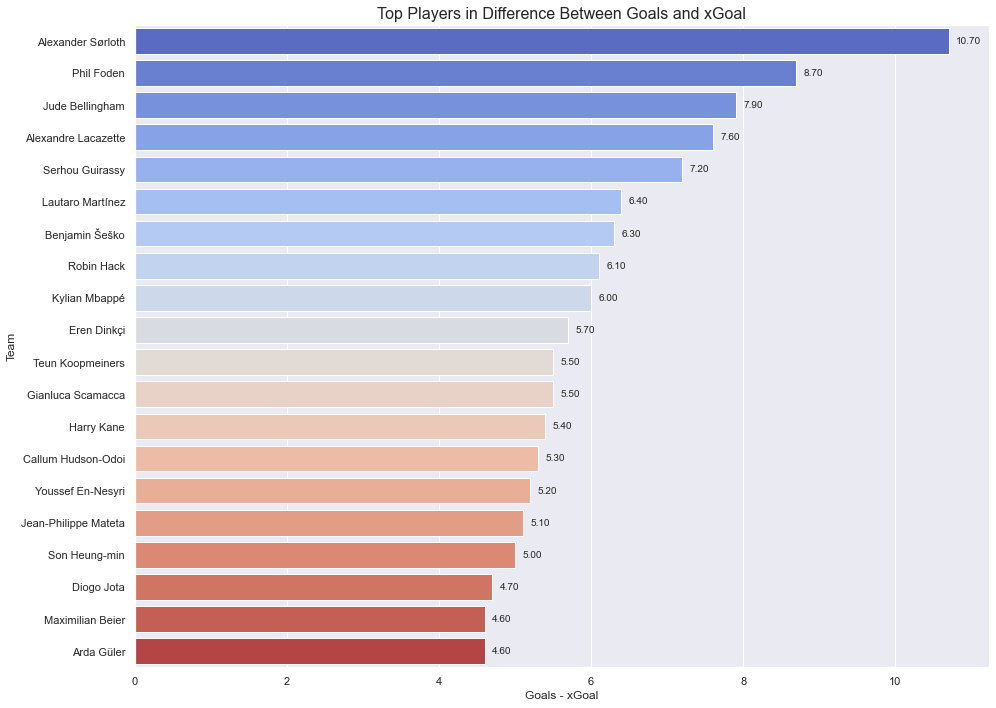

In [56]:
# Visualize the top players in the difference between goals scored (Gls) and expected goals (xG):
# - Select the 'Player' and 'Gls-xG' columns to focus on players and their performance compared to xG.
# - Sort the players by the difference between Gls and xG ('Gls-xG') in descending order.
# - Select the top 20 players with the highest positive difference (indicating they outperformed their xG).
# - Create a horizontal bar chart to compare the difference between goals scored and xG across these players.
top_players_gls_xg =  data[['Player','Gls-xG']].sort_values(by='Gls-xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_gls_xg[:20], y='Player', x='Gls-xG', order=top_players_gls_xg[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Players in Difference Between Goals and xGoal', fontsize=16)
plt.xlabel('Goals - xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

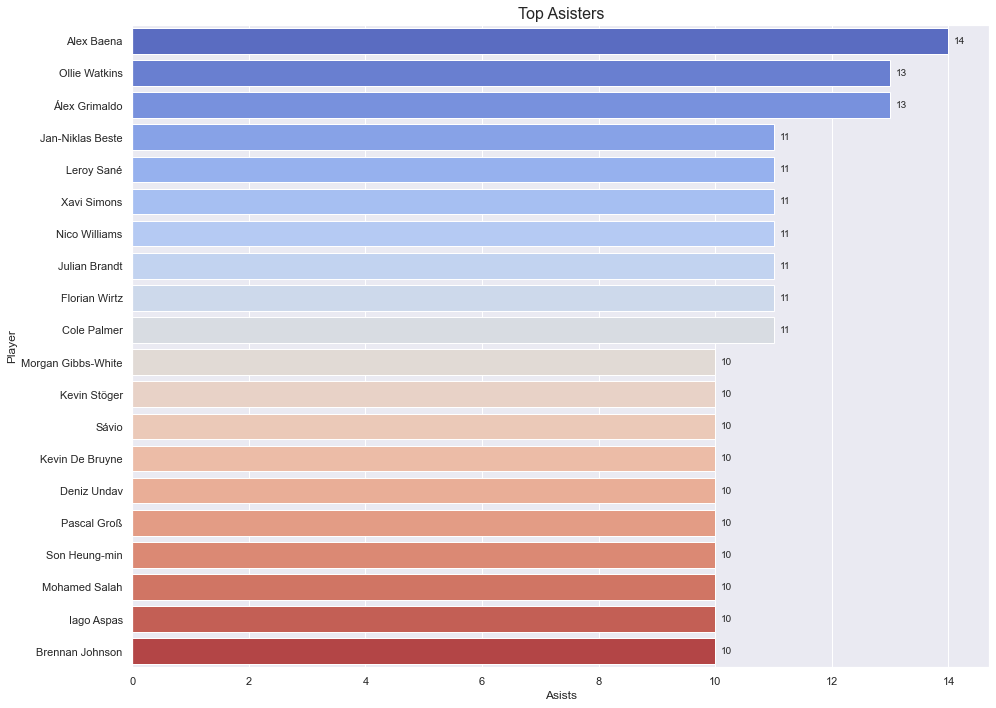

In [57]:
# Visualize the top players in assists (Ast):
# - Select the 'Player' and 'Ast' columns to focus on players and their total assists.
# - Sort the players by total assists ('Ast') in descending order.
# - Select the top 20 players with the most assists.
# - Create a horizontal bar chart to compare the total assists across these players.
top_asisters = data[['Player','Ast']].sort_values(by='Ast', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_asisters[:20], y='Player', x='Ast', order=top_asisters[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Asisters', fontsize=16)

plt.xlabel('Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

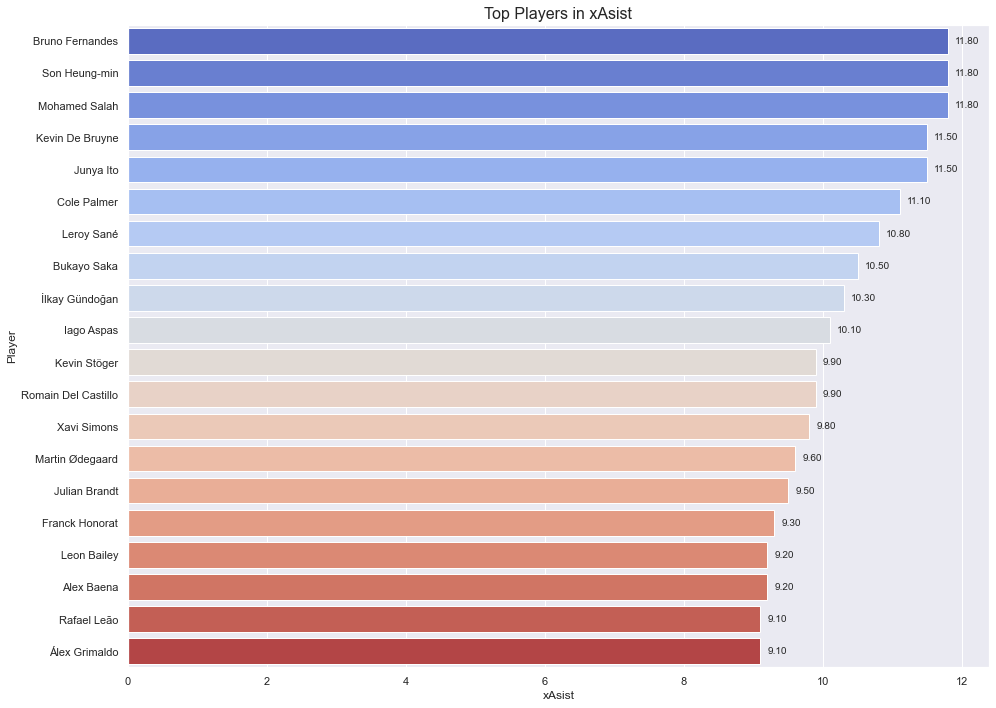

In [58]:
# Visualize the top players in expected assists (xAG):
# - Select the 'Player' and 'xAG' columns to focus on players and their total expected assists.
# - Sort the players by expected assists ('xAG') in descending order.
# - Select the top 20 players with the highest xAG values.
# - Create a horizontal bar chart to compare the total expected assists across these players.
top_players_xag = data[['Player','xAG']].sort_values(by='xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_xag[:20], y='Player', x='xAG', order=top_players_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in xAsist', fontsize=16)
plt.xlabel('xAsist', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

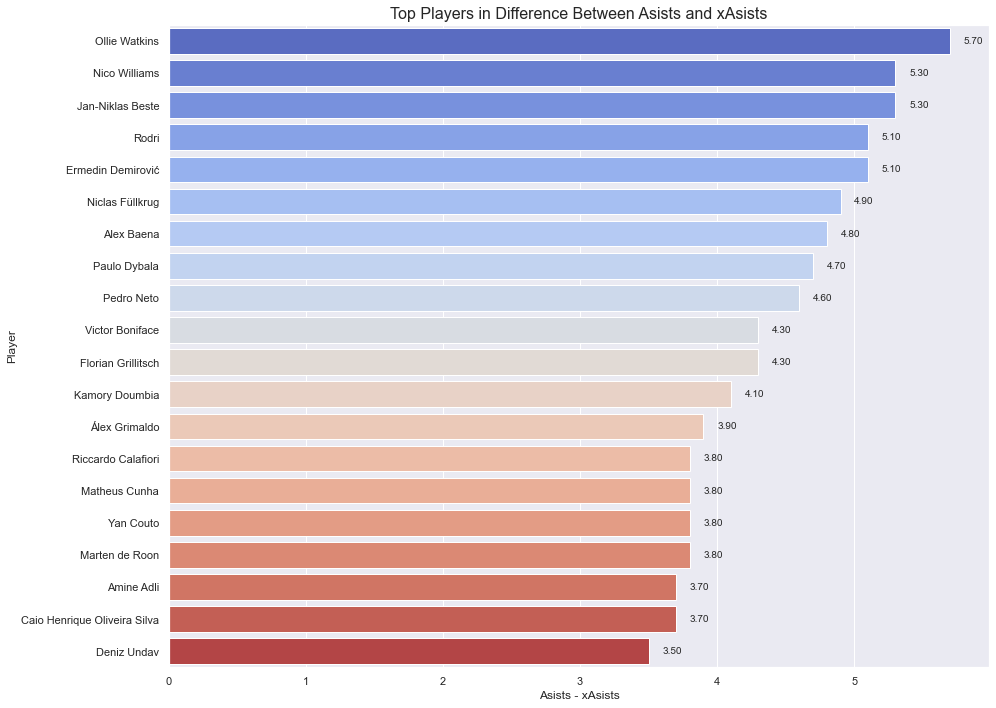

In [59]:
# Visualize the top players in the difference between actual assists (Ast) and expected assists (xAG):
# - Select the 'Player' and 'Ast-xAG' columns to focus on players and their overperformance or underperformance compared to xAG.
# - Sort the players by the difference between Ast and xAG ('Ast-xAG') in descending order.
# - Select the top 20 players with the highest positive difference (indicating they outperformed their xAG).
# - Create a horizontal bar chart to compare the difference between assists and xAG across these players.
top_players_ast_xag = data[['Player','Ast-xAG']].sort_values(by='Ast-xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_ast_xag[:20], y='Player', x='Ast-xAG', order=top_players_ast_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in Difference Between Asists and xAsists', fontsize=16)
plt.xlabel('Asists - xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

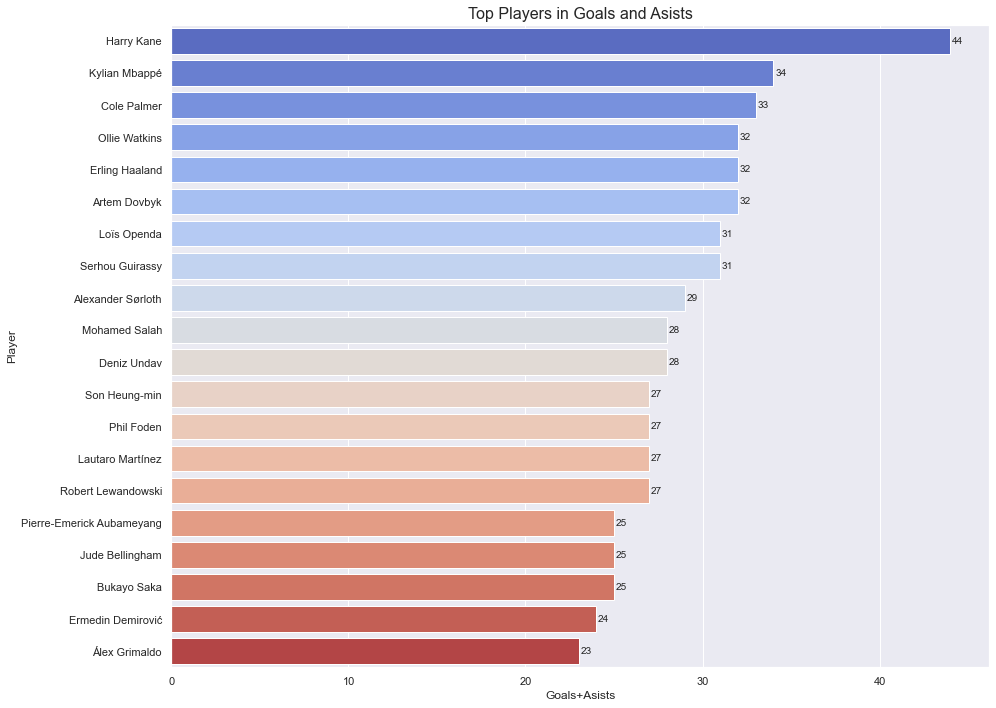

In [60]:
# Visualize the top players in combined goals and assists (G+A):
# - Select the 'Player' and 'G+A' columns to focus on players and their total contribution in terms of goals and assists.
# - Sort the players by total G+A in descending order.
# - Select the top 20 players with the highest combined goals and assists.
# - Create a horizontal bar chart to compare the total G+A across these players.
top_players_G_Ast = data[['Player','G+A']].sort_values(by='G+A', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_G_Ast[:20], y='Player', x='G+A', order=top_players_G_Ast[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Players in Goals and Asists', fontsize=16)
plt.xlabel('Goals+Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

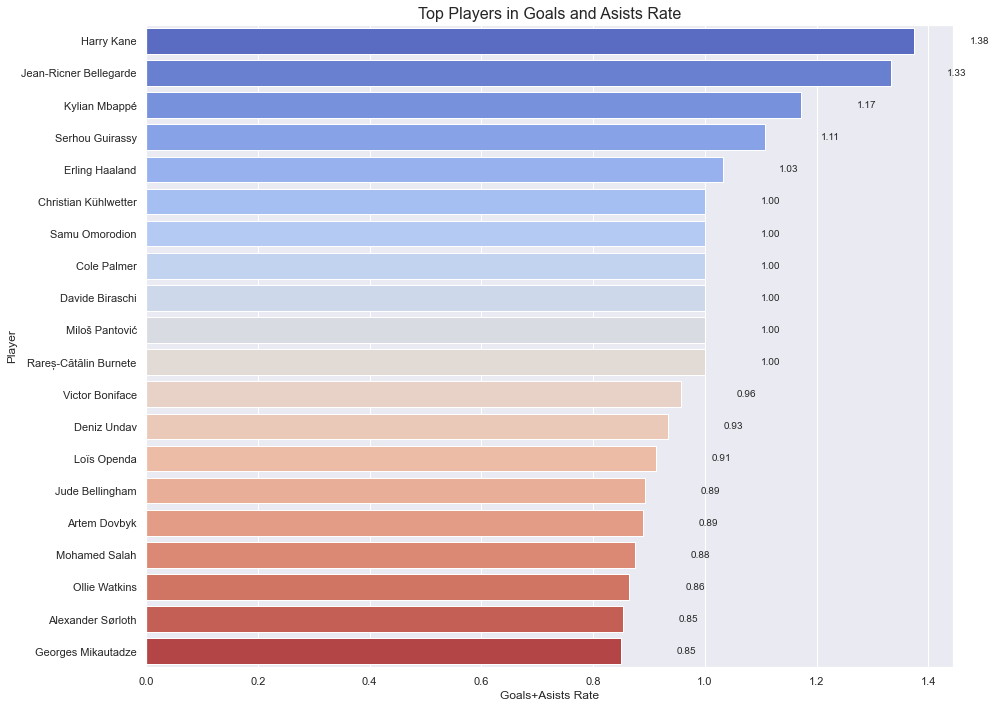

In [61]:
#Visualize the top players in goals and assists rate (G+A_rate):
# - Select the 'Player' and 'G+A_rate' columns to focus on players and their combined contribution rate per match.
# - Sort the players by G+A_rate in descending order.
# - Select the top 20 players with the highest combined goals and assists rate.
# - Create a horizontal bar chart to compare the G+A_rate across these players.
top_players_G_Ast_rate = data[['Player','G+A_rate']].sort_values(by='G+A_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_G_Ast_rate[:20], y='Player', x='G+A_rate', order=top_players_G_Ast_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Players in Goals and Asists Rate', fontsize=16)
plt.xlabel('Goals+Asists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

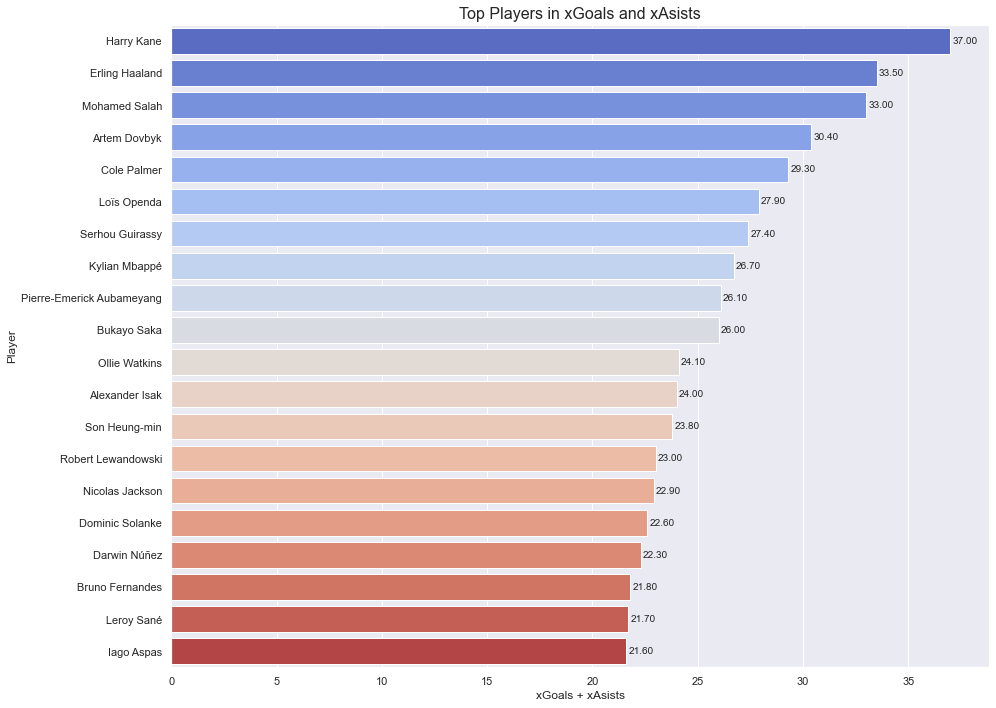

In [62]:
# Visualize the top players in combined expected goals (xG) and expected assists (xAG):
# - Select the 'Player' and 'xG+xAG' columns to focus on players and their total contribution in terms of xG and xAG.
# - Sort the players by the combined xG and xAG ('xG+xAG') in descending order.
# - Select the top 20 players with the highest combined xG and xAG values.
# - Create a horizontal bar chart to compare the total xG and xAG across these players.
top_players_xg_xag = data[['Player','xG+xAG']].sort_values(by='xG+xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_xg_xag[:20], y='Player', x='xG+xAG', order=top_players_xg_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in xGoals and xAsists', fontsize=16)
plt.xlabel('xGoals + xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

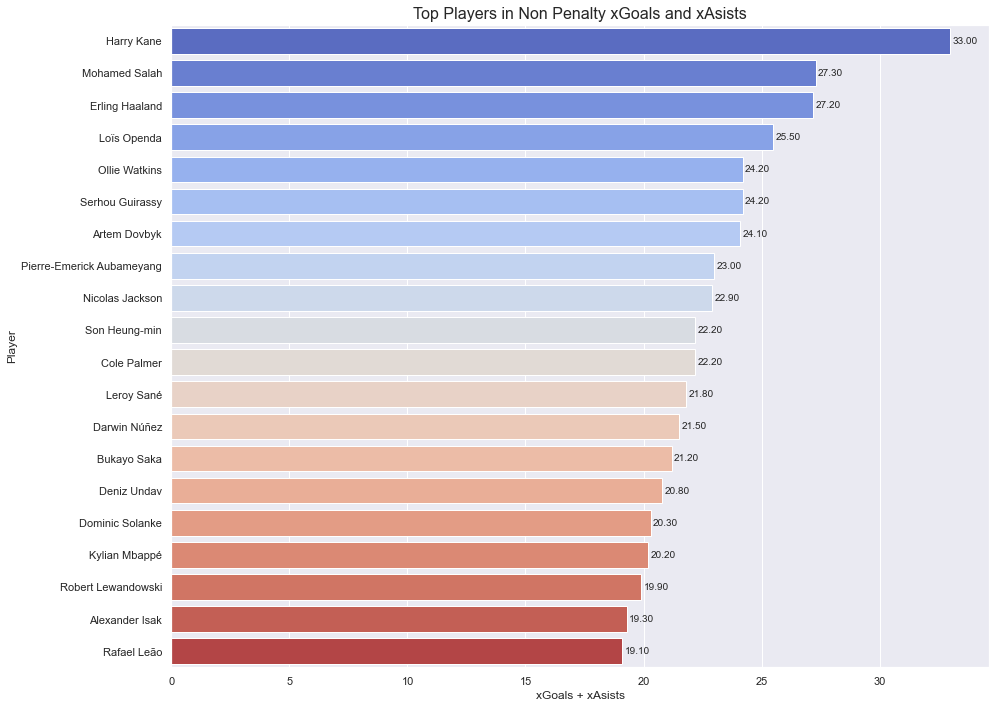

In [63]:
# Visualize the top players in combined non-penalty expected goals (npxG) and expected assists (xAG):
# - Select the 'Player' and 'npxG+xAG' columns to focus on players and their total contribution in non-penalty xG and xAG.
# - Sort the players by the combined npxG and xAG ('npxG+xAG') in descending order.
# - Select the top 20 players with the highest combined npxG and xAG values.
# - Create a horizontal bar chart to compare the total non-penalty xG and xAG across these players.
top_players_npxg_xag = data[['Player','npxG+xAG']].sort_values(by='npxG+xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_npxg_xag[:20], y='Player', x='npxG+xAG', order=top_players_npxg_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in Non Penalty xGoals and xAsists', fontsize=16)
plt.xlabel('xGoals + xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

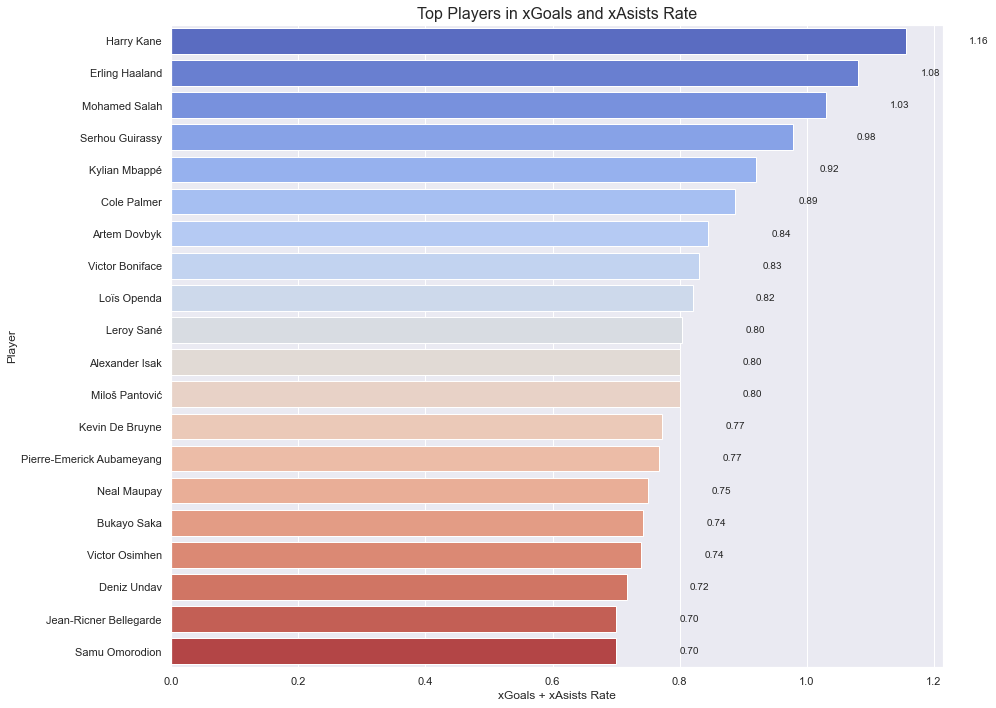

In [64]:
# Visualize the top players in the combined rate of expected goals (xG) and expected assists (xAG) per match:
# - Select the 'Player' and 'xG+xAG_rate' columns to focus on players and their combined contribution rate per match.
# - Sort the players by the combined xG and xAG rate ('xG+xAG_rate') in descending order.
# - Select the top 20 players with the highest combined xG and xAG rates.
# - Create a horizontal bar chart to compare the xG+xAG rate across these players.
top_players_xg_xag_rate = data[['Player','xG+xAG_rate']].sort_values(by='xG+xAG_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_xg_xag_rate[:20], y='Player', x='xG+xAG_rate', order=top_players_xg_xag_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in xGoals and xAsists Rate', fontsize=16)
plt.xlabel('xGoals + xAsists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

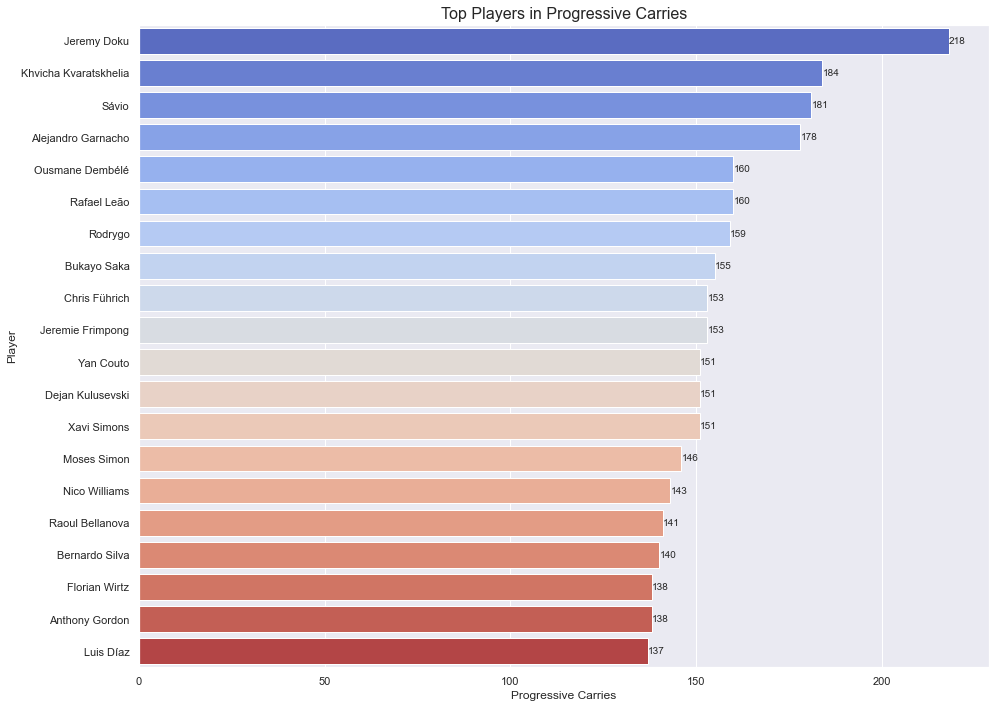

In [65]:
# Visualize the top players in progressive carries (PrgC):
# - Select the 'Player' and 'PrgC' columns to focus on players and their total progressive carries.
# - Sort the players by the total number of progressive carries ('PrgC') in descending order.
# - Select the top 20 players with the highest progressive carries.
# - Create a horizontal bar chart to compare the total progressive carries across these players.
top_players_PrgC = data[['Player','PrgC']].sort_values(by='PrgC', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_PrgC[:20], y='Player', x='PrgC', order=top_players_PrgC[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in Progressive Carries', fontsize=16)
plt.xlabel('Progressive Carries', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

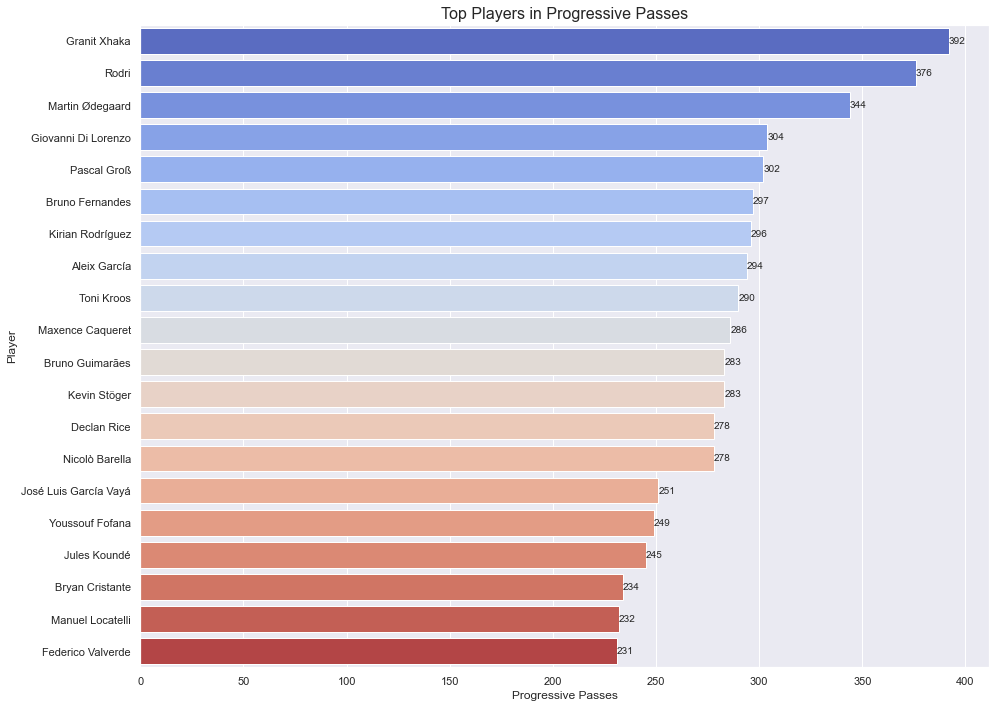

In [66]:
# Visualize the top players in progressive passes (PrgP):
# - Select the 'Player' and 'PrgP' columns to focus on players and their total progressive passes.
# - Sort the players by the total number of progressive passes ('PrgP') in descending order.
# - Select the top 20 players with the highest progressive passes.
# - Create a horizontal bar chart to compare the total progressive passes across these players.
top_players_PrgP = data[['Player','PrgP']].sort_values(by='PrgP', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_PrgP[:20], y='Player', x='PrgP', order=top_players_PrgP[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in Progressive Passes', fontsize=16)
plt.xlabel('Progressive Passes', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

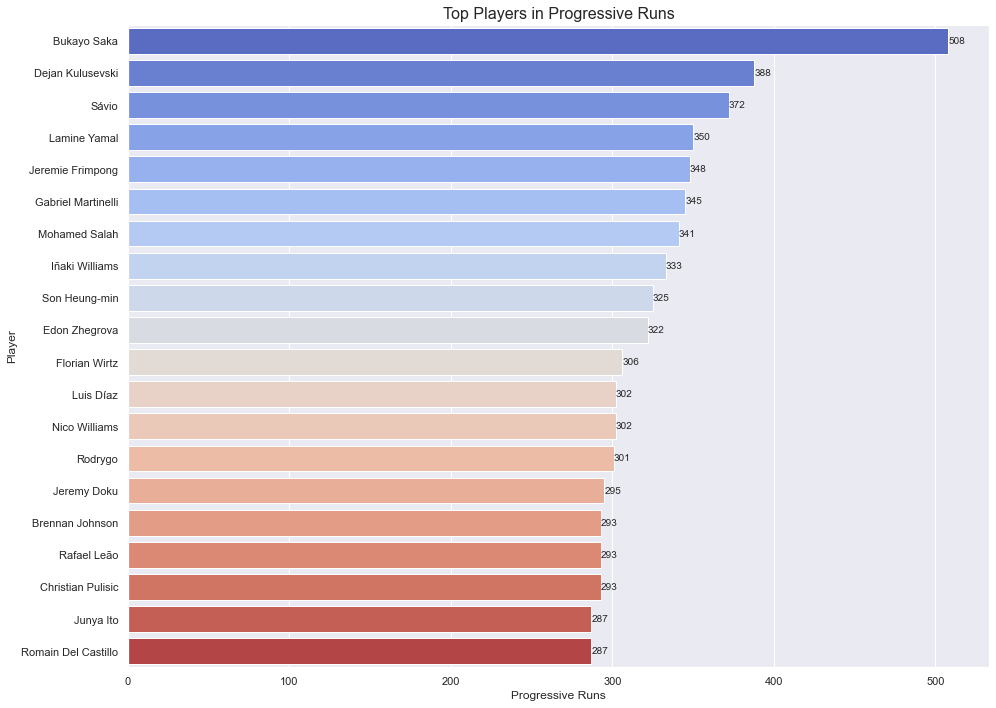

In [67]:
# Visualize the top players in progressive runs (PrgR):
# - Select the 'Player' and 'PrgR' columns to focus on players and their total progressive runs.
# - Sort the players by the total number of progressive runs ('PrgR') in descending order.
# - Select the top 20 players with the highest progressive runs.
# - Create a horizontal bar chart to compare the total progressive runs across these players.
top_players_PrgR = data[['Player','PrgR']].sort_values(by='PrgR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_players_PrgR[:20], y='Player', x='PrgR', order=top_players_PrgR[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Players in Progressive Runs', fontsize=16)
plt.xlabel('Progressive Runs', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

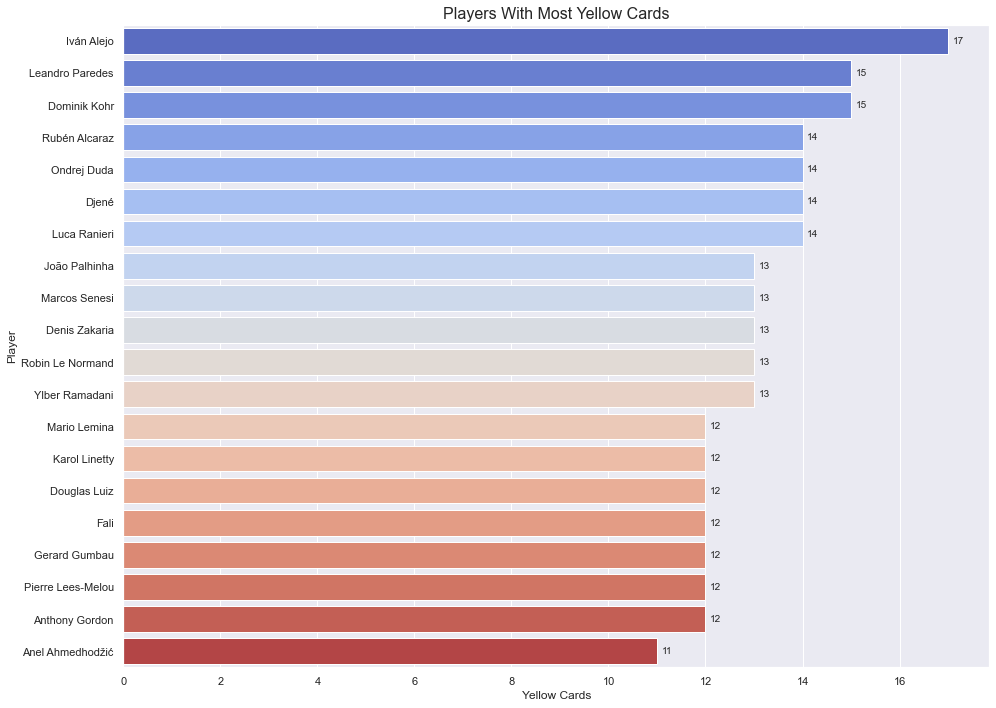

In [68]:
# Visualize the players with the most yellow cards (CrdY):
# - Select the 'Player' and 'CrdY' columns to focus on players and their yellow card counts.
# - Sort the players by the number of yellow cards ('CrdY') in descending order.
# - Select the top 20 players with the most yellow cards.
# - Create a horizontal bar chart to compare the total yellow cards across these players.
players_CrdY = data[['Player','CrdY']].sort_values(by='CrdY', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=players_CrdY[:20], y='Player', x='CrdY', order=players_CrdY[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Players With Most Yellow Cards', fontsize=16)
plt.xlabel('Yellow Cards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

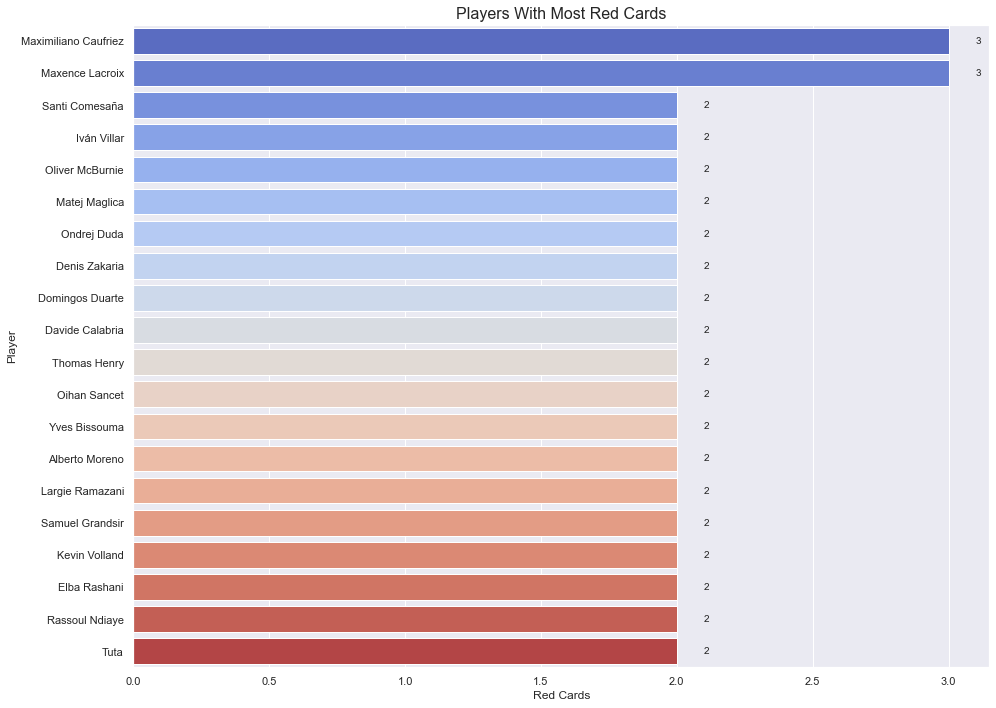

In [69]:
# Visualize the players with the most red cards (CrdR):
# - Select the 'Player' and 'CrdR' columns to focus on players and their red card counts.
# - Sort the players by the number of red cards ('CrdR') in descending order.
# - Select the top 20 players with the most red cards.
# - Create a horizontal bar chart to compare the total red cards across these players.
players_CrdR = data[['Player','CrdR']].sort_values(by='CrdR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=players_CrdR[:20], y='Player', x='CrdR', order=players_CrdR[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Players With Most Red Cards', fontsize=16)
plt.xlabel('Red Cards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

# Position Analysis 

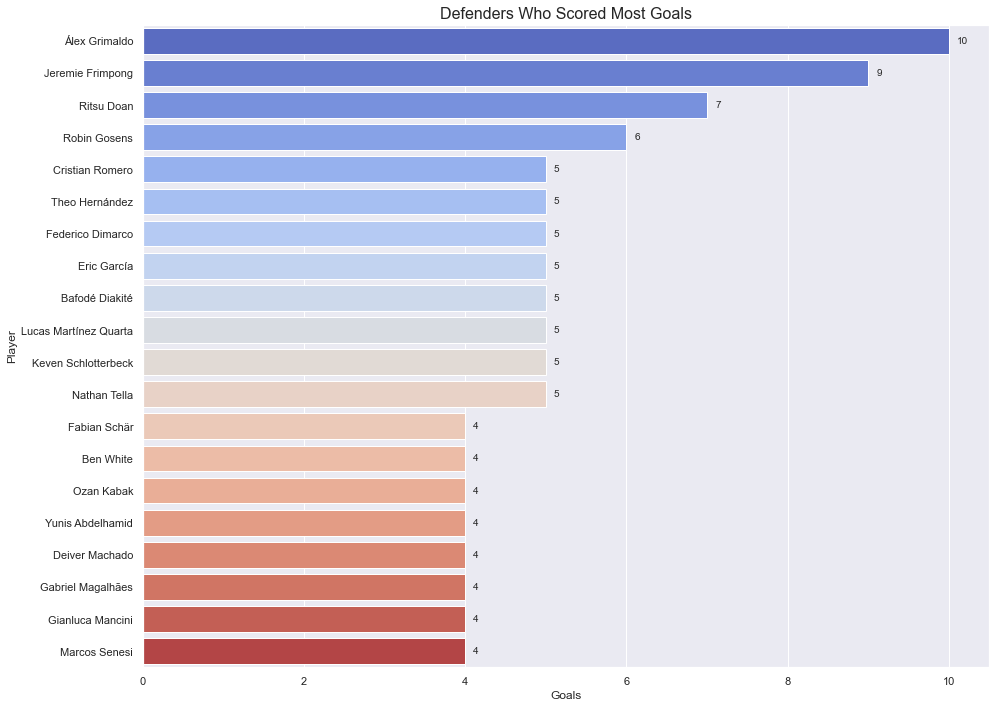

In [70]:
# Visualize the defenders who scored the most goals:
# - Filter the data to focus on players who play in the defender position ('DF').
# - Select the 'Player' and 'Gls' columns to focus on the players and their goals scored.
# - Sort the players by goals scored ('Gls') in descending order.
# - Select the top 20 defenders who have scored the most goals.
# - Create a horizontal bar chart to compare the total goals scored across these defenders.
defender_most_goal = data[data['Position'] == 'DF']
defender_most_goal = defender_most_goal[['Player','Gls']].sort_values(by='Gls', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=defender_most_goal[:20], y='Player', x='Gls', order=defender_most_goal[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Defenders Who Scored Most Goals', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

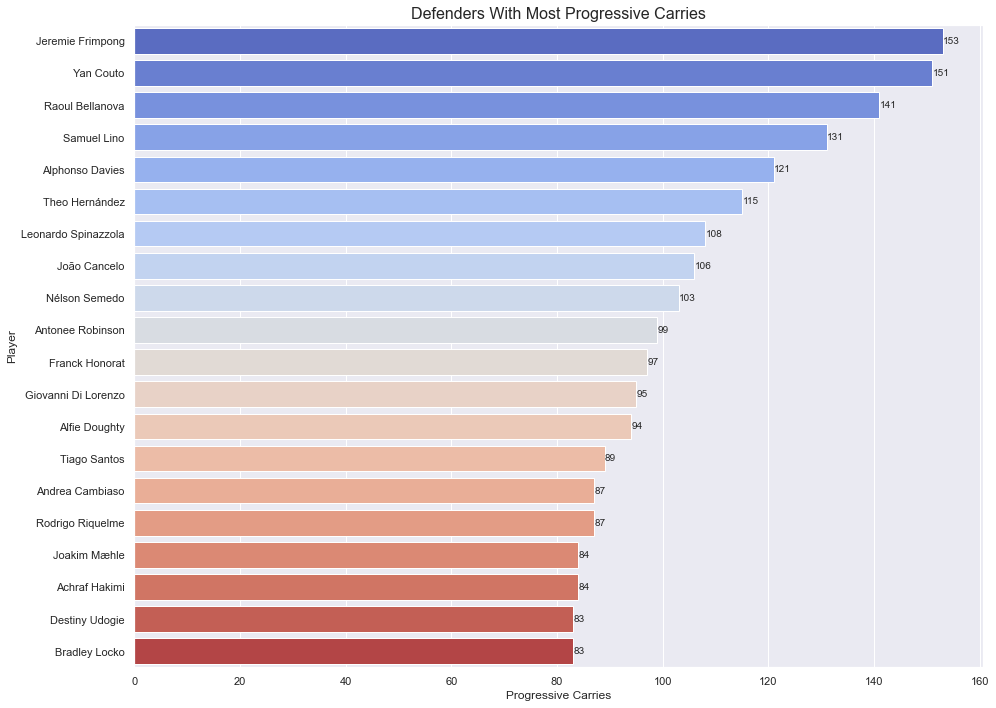

In [71]:
# Visualize the defenders with the most progressive carries (PrgC):
# - Filter the data to focus on players in the defender position ('DF').
# - Select the 'Player' and 'PrgC' columns to focus on the players and their progressive carries.
# - Sort the defenders by the number of progressive carries ('PrgC') in descending order.
# - Select the top 20 defenders with the most progressive carries.
# - Create a horizontal bar chart to compare the total progressive carries across these defenders.
defender_most_PrgC = data[data['Position'] == 'DF']
defender_most_PrgC = defender_most_PrgC[['Player','PrgC']].sort_values(by='PrgC', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=defender_most_PrgC[:20], y='Player', x='PrgC', order=defender_most_PrgC[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Defenders With Most Progressive Carries', fontsize=16)
plt.xlabel('Progressive Carries', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

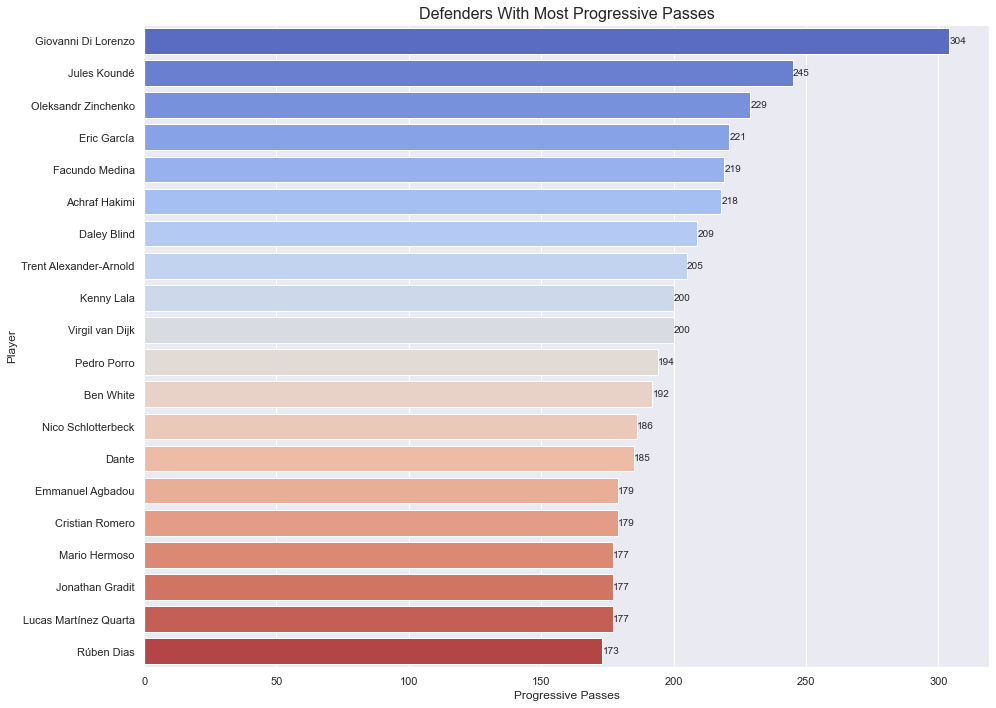

In [72]:
# Visualize the defenders with the most progressive passes (PrgP):
# - Filter the data to focus on players in the defender position ('DF').
# - Select the 'Player' and 'PrgP' columns to focus on the players and their progressive passes.
# - Sort the defenders by the number of progressive passes ('PrgP') in descending order.
# - Select the top 20 defenders with the most progressive passes.
# - Create a horizontal bar chart to compare the total progressive passes across these defenders.
defender_most_PrgP = data[data['Position'] == 'DF']
defender_most_PrgP = defender_most_PrgP[['Player','PrgP']].sort_values(by='PrgP', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=defender_most_PrgP[:20], y='Player', x='PrgP', order=defender_most_PrgP[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Defenders With Most Progressive Passes', fontsize=16)
plt.xlabel('Progressive Passes', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

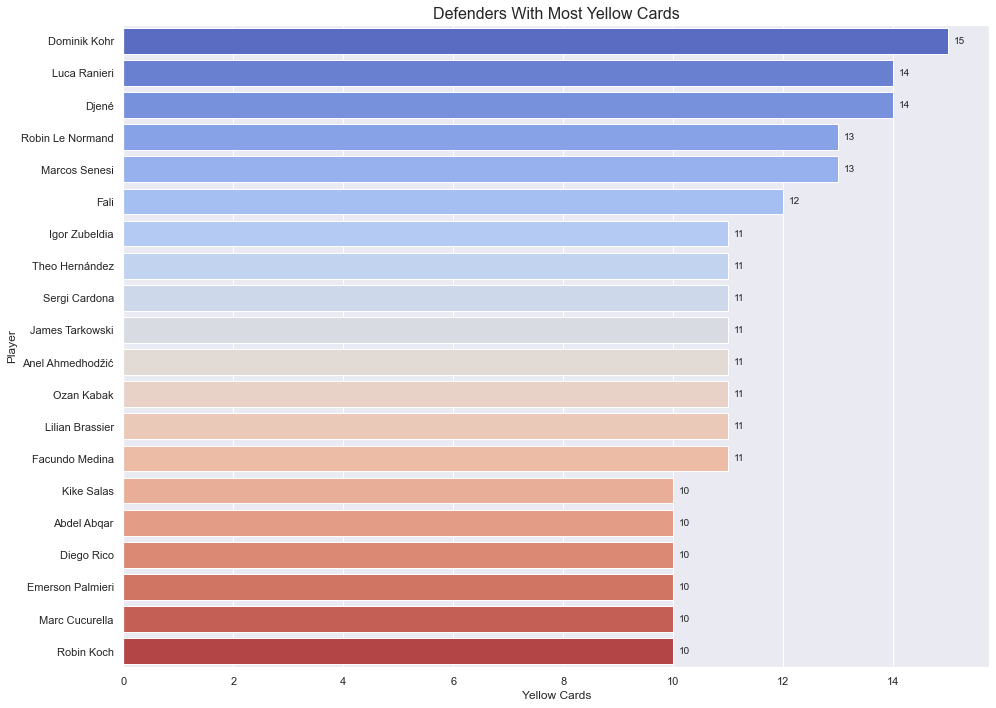

In [73]:
# Visualize the defenders with the most yellow cards (CrdY):
# - Filter the data to focus on players in the defender position ('DF').
# - Select the 'Player' and 'CrdY' columns to focus on the players and their yellow card counts.
# - Sort the defenders by the number of yellow cards ('CrdY') in descending order.
# - Select the top 20 defenders with the most yellow cards.
# - Create a horizontal bar chart to compare the total yellow cards across these defenders.
defender_most_CrdY = data[data['Position'] == 'DF']
defender_most_CrdY = defender_most_CrdY[['Player','CrdY']].sort_values(by='CrdY', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=defender_most_CrdY[:20], y='Player', x='CrdY', order=defender_most_CrdY[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Defenders With Most Yellow Cards', fontsize=16)
plt.xlabel('Yellow Cards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

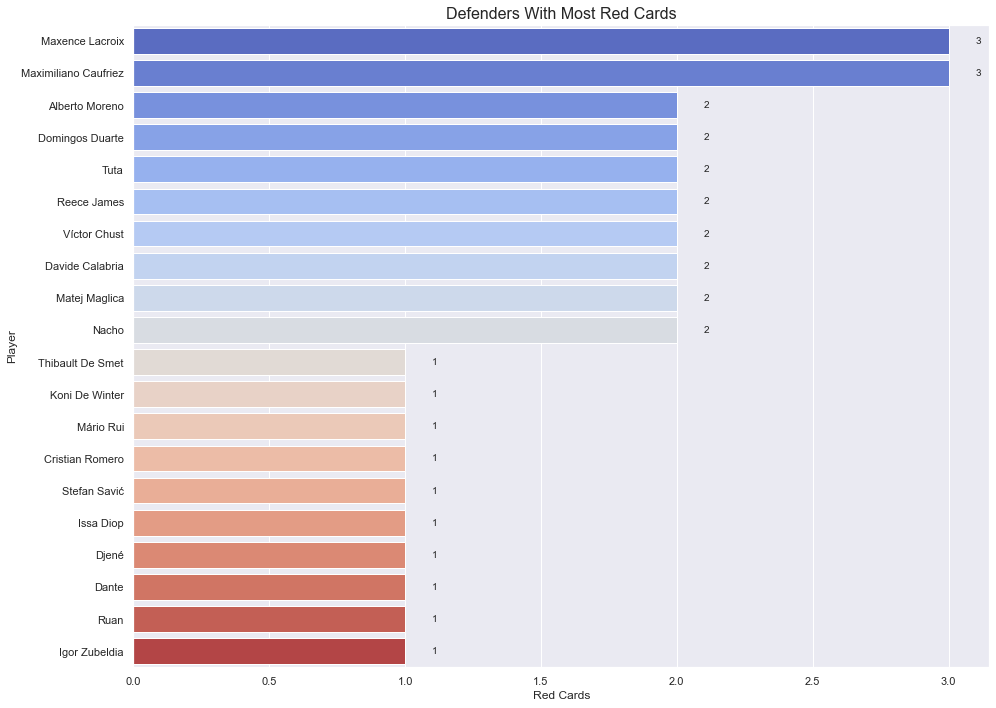

In [74]:
# Visualize the defenders with the most red cards (CrdR):
# - Filter the data to focus on players in the defender position ('DF').
# - Select the 'Player' and 'CrdR' columns to focus on the players and their red card counts.
# - Sort the defenders by the number of red cards ('CrdR') in descending order.
# - Select the top 20 defenders with the most red cards.
# - Create a horizontal bar chart to compare the total red cards across these defenders.
defender_most_CrdR = data[data['Position'] == 'DF']
defender_most_CrdR = defender_most_CrdR[['Player','CrdR']].sort_values(by='CrdR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=defender_most_CrdR[:20], y='Player', x='CrdR', order=defender_most_CrdR[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Defenders With Most Red Cards', fontsize=16)
plt.xlabel('Red Cards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

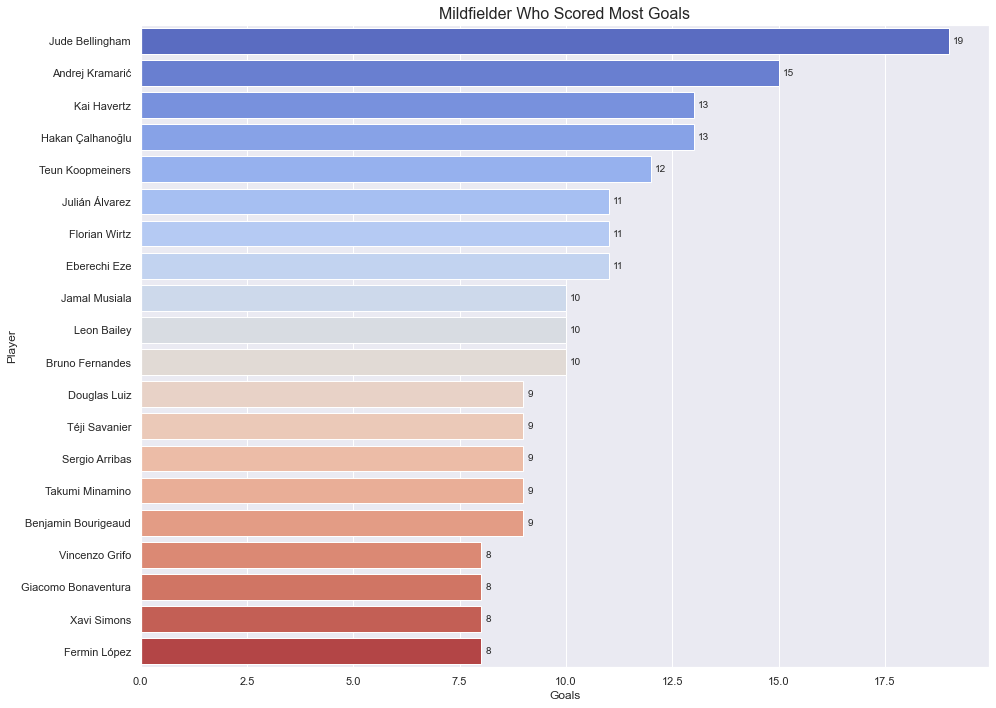

In [75]:
# Visualize the midfielders who scored the most goals:
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'Gls' columns to focus on the players and their goals scored.
# - Sort the midfielders by goals scored ('Gls') in descending order.
# - Select the top 20 midfielders who have scored the most goals.
# - Create a horizontal bar chart to compare the total goals scored across these midfielders.
midfielder_most_goal = data[data['Position'] == 'MF']
midfielder_most_goal = midfielder_most_goal[['Player','Gls']].sort_values(by='Gls', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_goal[:20], y='Player', x='Gls', order=midfielder_most_goal[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder Who Scored Most Goals', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

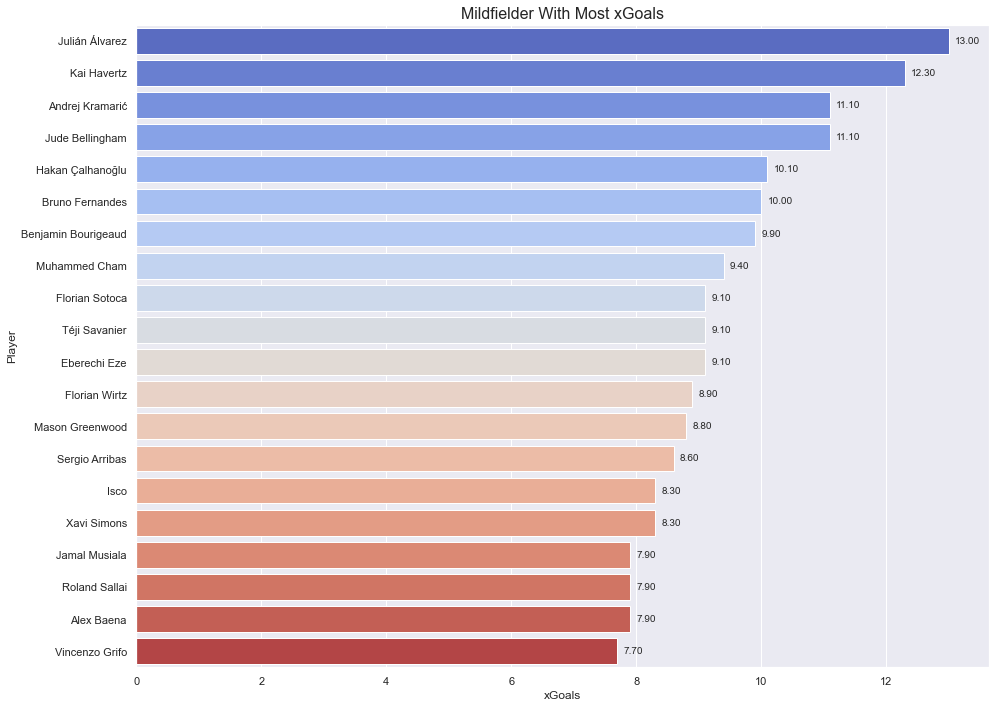

In [76]:
# Visualize the midfielders with the most expected goals (xG):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'xG' columns to focus on the players and their expected goals.
# - Sort the midfielders by expected goals ('xG') in descending order.
# - Select the top 20 midfielders with the highest expected goals.
# - Create a horizontal bar chart to compare the total expected goals across these midfielders.
midfielder_most_xG = data[data['Position'] == 'MF']
midfielder_most_xG = midfielder_most_xG[['Player','xG']].sort_values(by='xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_xG[:20], y='Player', x='xG', order=midfielder_most_xG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most xGoals', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()

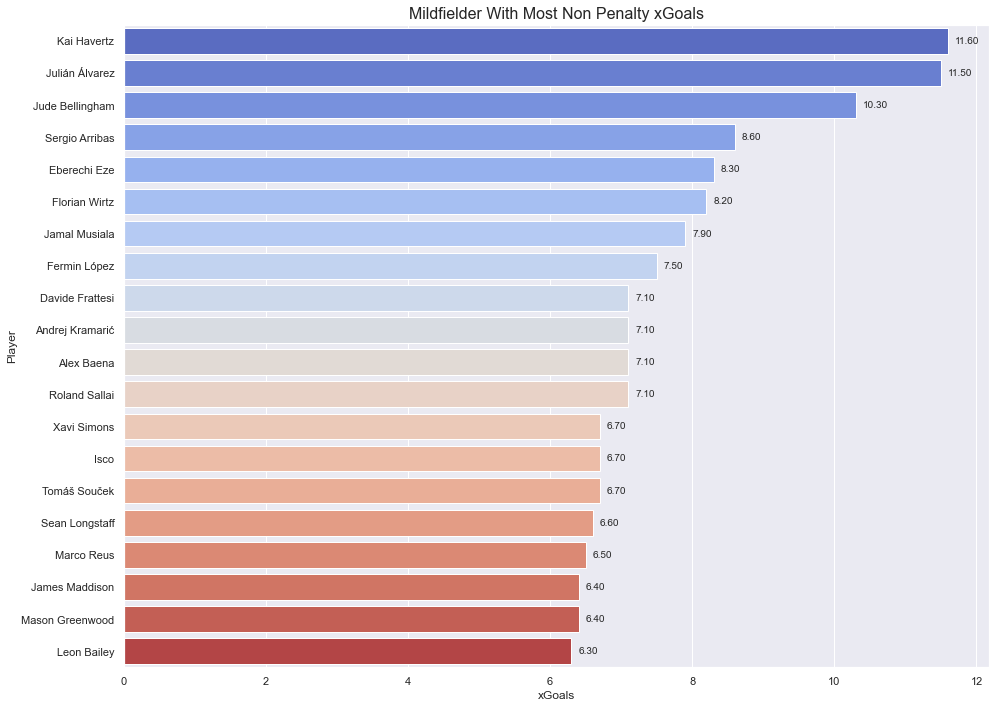

In [77]:
# Visualize the midfielders with the most non-penalty expected goals (npxG):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'npxG' columns to focus on the players and their non-penalty expected goals.
# - Sort the midfielders by non-penalty expected goals ('npxG') in descending order.
# - Select the top 20 midfielders with the highest non-penalty expected goals.
# - Create a horizontal bar chart to compare the total non-penalty expected goals across these midfielders.
midfielder_most_npxG = data[data['Position'] == 'MF']
midfielder_most_npxG = midfielder_most_npxG[['Player','npxG']].sort_values(by='npxG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_npxG[:20], y='Player', x='npxG', order=midfielder_most_npxG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Non Penalty xGoals', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()

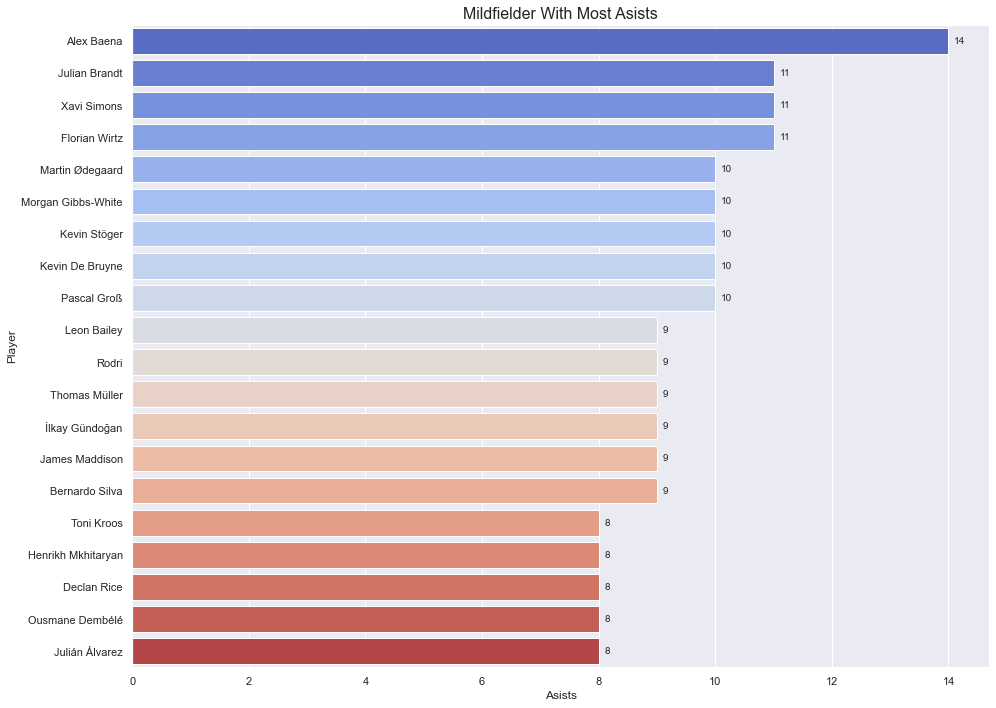

In [78]:
# Visualize the midfielders with the most assists (Ast):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'Ast' columns to focus on the players and their assists.
# - Sort the midfielders by assists ('Ast') in descending order.
# - Select the top 20 midfielders with the most assists.
# - Create a horizontal bar chart to compare the total assists across these midfielders.
midfielder_most_asists = data[data['Position'] == 'MF']
midfielder_most_asists = midfielder_most_asists[['Player','Ast']].sort_values(by='Ast', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_asists[:20], y='Player', x='Ast', order=midfielder_most_asists[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Asists', fontsize=16)
plt.xlabel('Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

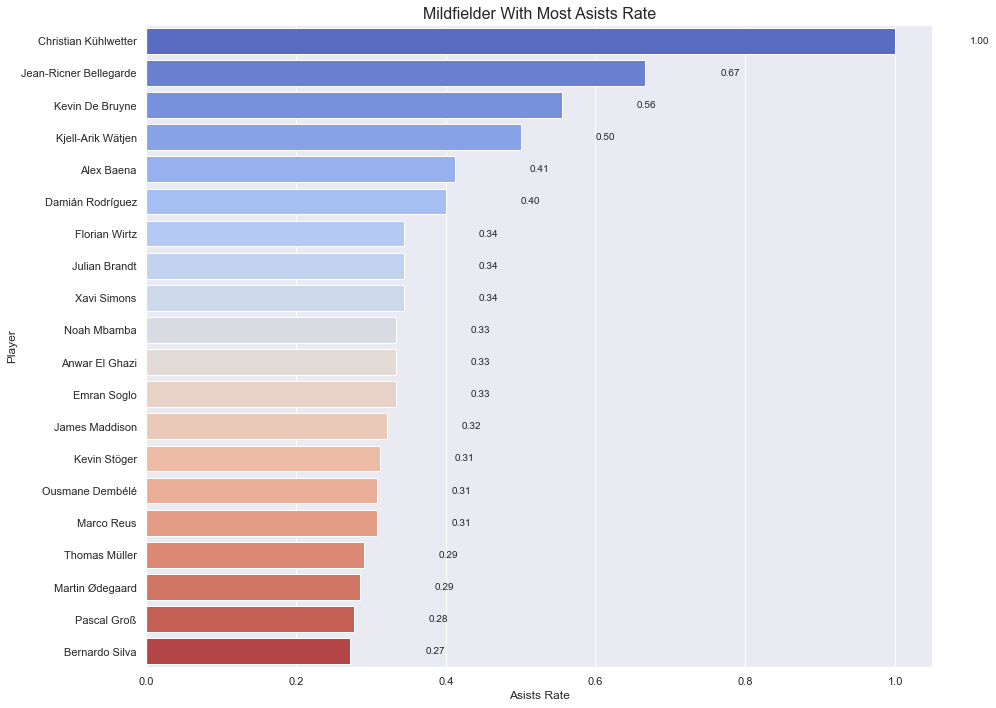

In [79]:
# Visualize the midfielders with the most assists rate (Ast_rate):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'Ast_rate' columns to focus on the players and their assists rate.
# - Sort the midfielders by assists rate ('Ast_rate') in descending order.
# - Select the top 20 midfielders with the highest assists rate.
# - Create a horizontal bar chart to compare the total assists rate across these midfielders.
midfielder_most_asists_rate = data[data['Position'] == 'MF']
midfielder_most_asists_rate = midfielder_most_asists_rate[['Player','Ast_rate']].sort_values(by='Ast_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_asists_rate[:20], y='Player', x='Ast_rate', order=midfielder_most_asists_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Asists Rate', fontsize=16)
plt.xlabel('Asists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

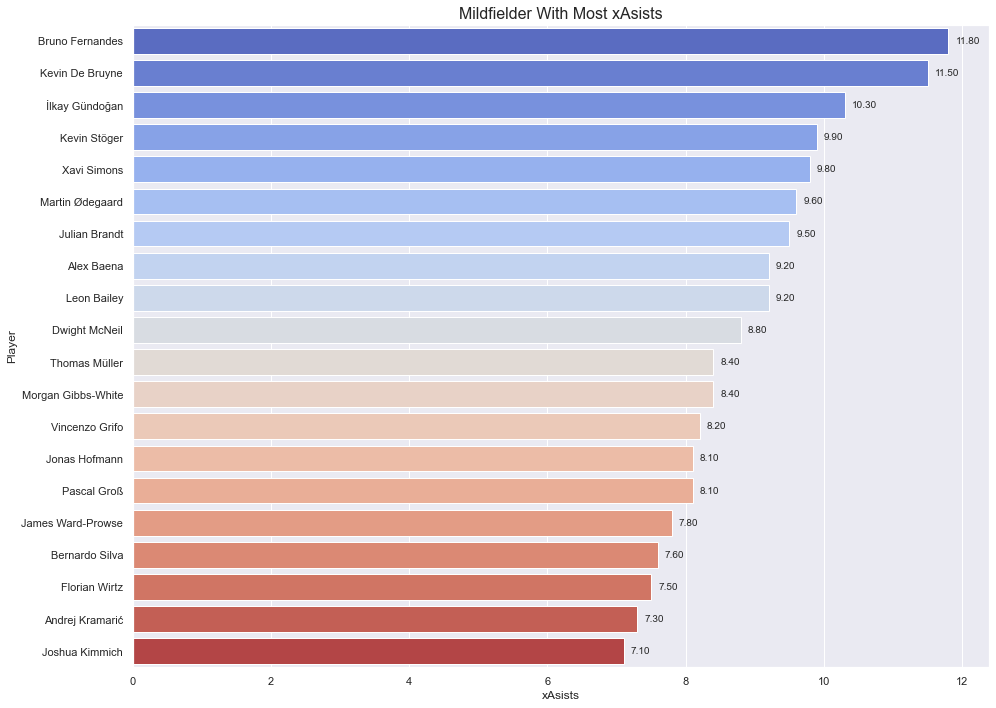

In [80]:
# Visualize the midfielders with the most expected assists (xAG):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'xAG' columns to focus on the players and their expected assists.
# - Sort the midfielders by expected assists ('xAG') in descending order.
# - Select the top 20 midfielders with the highest expected assists.
# - Create a horizontal bar chart to compare the total expected assists across these midfielders.
midfielder_most_xAG = data[data['Position'] == 'MF']
midfielder_most_xAG = midfielder_most_xAG[['Player','xAG']].sort_values(by='xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_xAG[:20], y='Player', x='xAG', order=midfielder_most_xAG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most xAsists', fontsize=16)
plt.xlabel('xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()

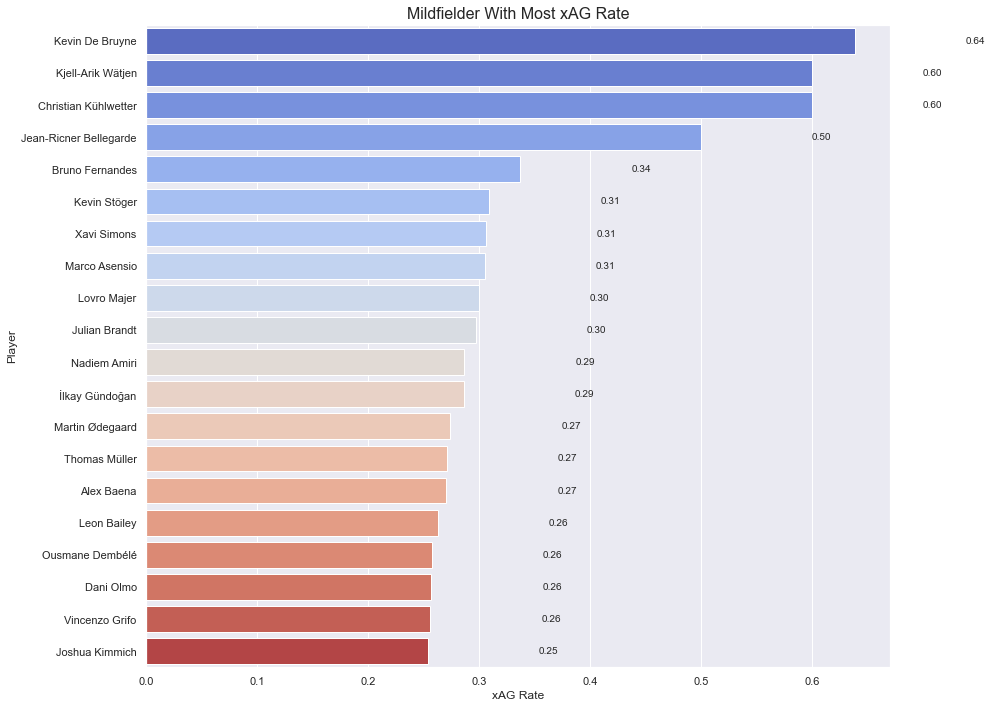

In [81]:
# Visualize the midfielders with the most expected assists rate (xAG_rate):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'xAG_rate' columns to focus on the players and their expected assists rate.
# - Sort the midfielders by expected assists rate ('xAG_rate') in descending order.
# - Select the top 20 midfielders with the highest xAG rate.
# - Create a horizontal bar chart to compare the total xAG rate across these midfielders.
midfielder_most_xAG_rate = data[data['Position'] == 'MF']
midfielder_most_xAG_rate = midfielder_most_xAG_rate[['Player','xAG_rate']].sort_values(by='xAG_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_xAG_rate[:20], y='Player', x='xAG_rate', order=midfielder_most_xAG_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most xAG Rate', fontsize=16)
plt.xlabel('xAG Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

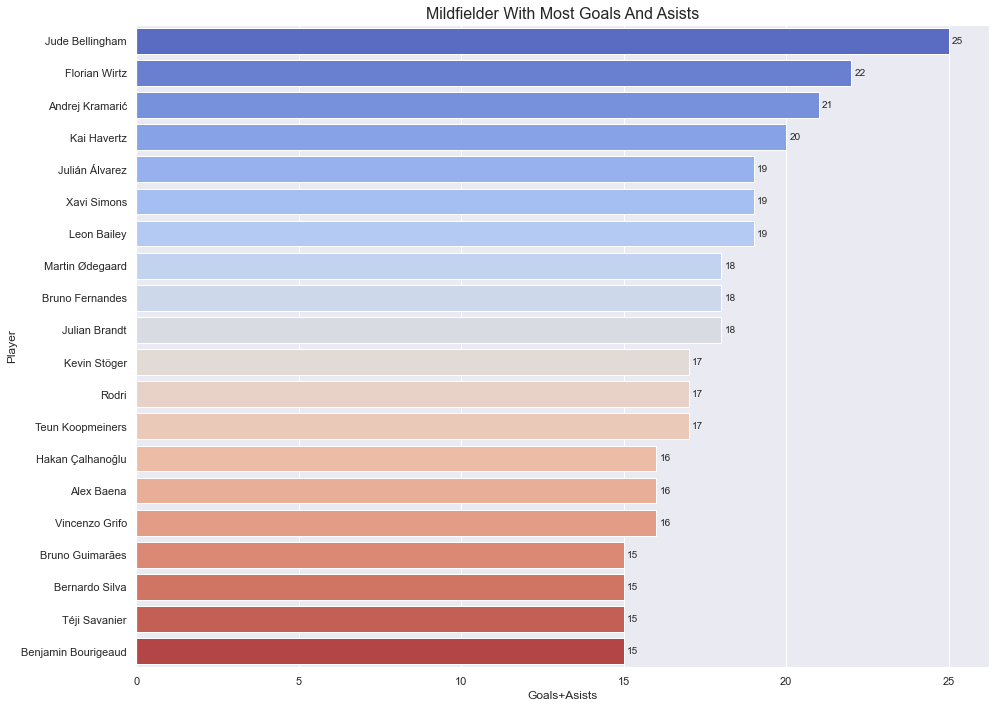

In [82]:
# Visualize the midfielders with the most combined goals and assists (G+A):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'G+A' columns to focus on the players and their total goals and assists.
# - Sort the midfielders by their combined goals and assists ('G+A') in descending order.
# - Select the top 20 midfielders with the highest combined goals and assists.
# - Create a horizontal bar chart to compare the total goals and assists across these midfielders.
midfielder_most_G_A = data[data['Position'] == 'MF']
midfielder_most_G_A = midfielder_most_G_A[['Player','G+A']].sort_values(by='G+A', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_G_A[:20], y='Player', x='G+A', order=midfielder_most_G_A[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Goals And Asists', fontsize=16)
plt.xlabel('Goals+Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

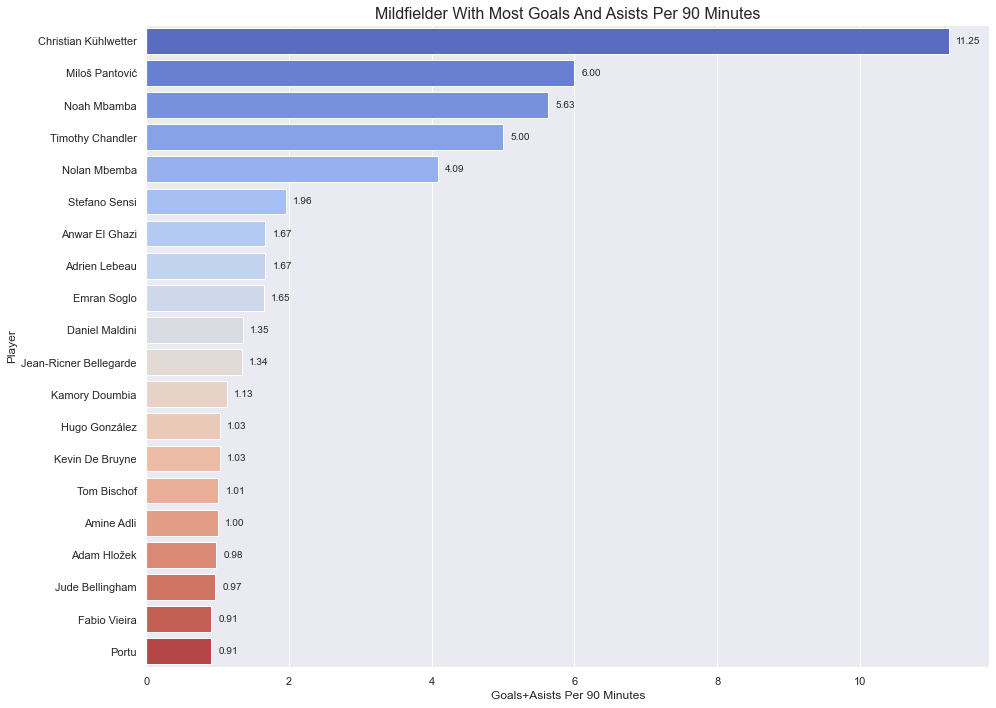

In [83]:
midfielder_most_G_A_90 = data[data['Position'] == 'MF']
midfielder_most_G_A_90 = midfielder_most_G_A_90[['Player','G+A_90']].sort_values(by='G+A_90', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_G_A_90[:20], y='Player', x='G+A_90', order=midfielder_most_G_A_90[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Goals And Asists Per 90 Minutes', fontsize=16)
plt.xlabel('Goals+Asists Per 90 Minutes', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

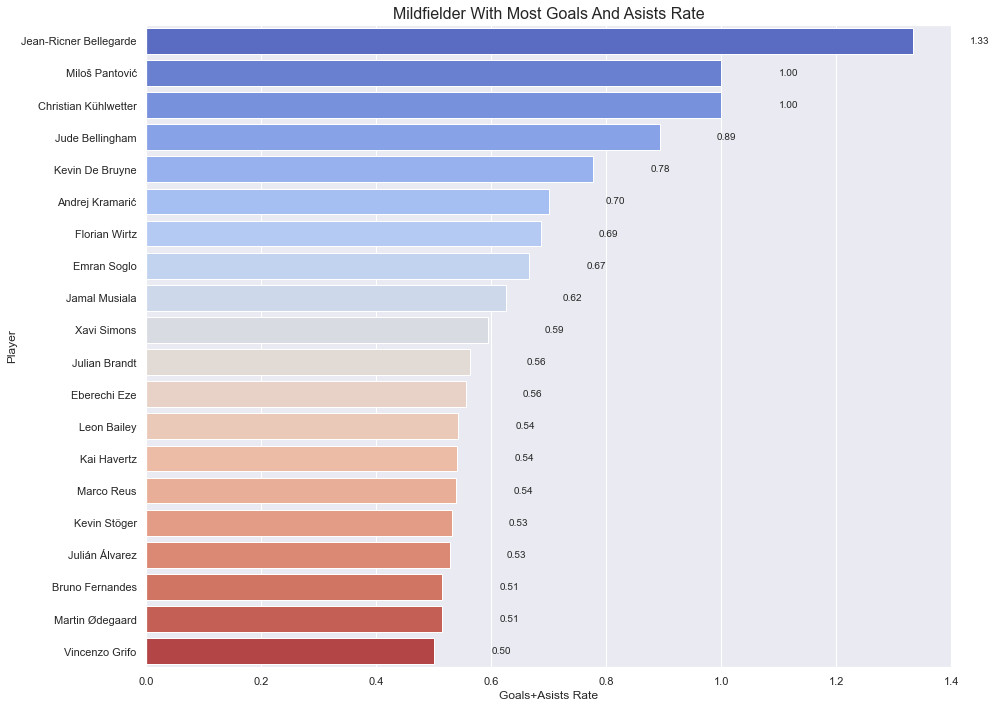

In [84]:
# Visualize the midfielders with the most combined goals and assists rate (G+A_rate):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'G+A_rate' columns to focus on the players and their goals and assists rate.
# - Sort the midfielders by their combined goals and assists rate ('G+A_rate') in descending order.
# - Select the top 20 midfielders with the highest combined goals and assists rate.
# - Create a horizontal bar chart to compare the total goals and assists rate across these midfielders.
midfielder_most_G_A_rate = data[data['Position'] == 'MF']
midfielder_most_G_A_rate = midfielder_most_G_A_rate[['Player','G+A_rate']].sort_values(by='G+A_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_G_A_rate[:20], y='Player', x='G+A_rate', order=midfielder_most_G_A_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Goals And Asists Rate', fontsize=16)
plt.xlabel('Goals+Asists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

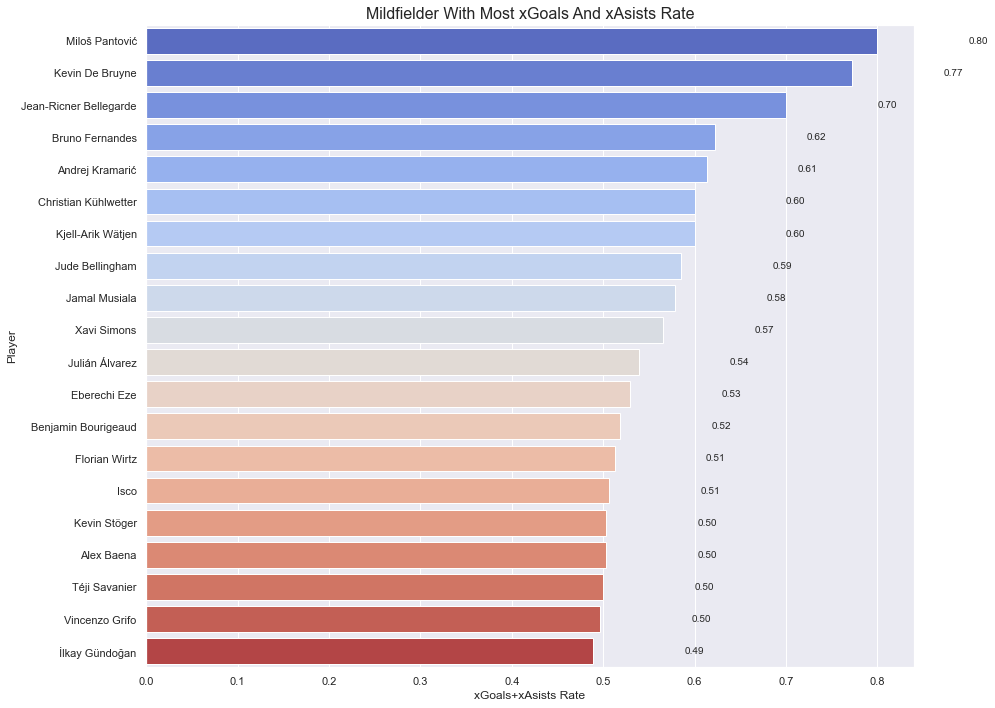

In [85]:
# Visualize the midfielders with the most combined expected goals (xG) and expected assists (xAG) rate (xG+xAG_rate):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'xG+xAG_rate' columns to focus on the players and their combined expected goals and assists rate.
# - Sort the midfielders by the combined xG and xAG rate ('xG+xAG_rate') in descending order.
# - Select the top 20 midfielders with the highest xG+xAG rate.
# - Create a horizontal bar chart to compare the total xG+xAG rate across these midfielders.
midfielder_most_xG_xAG_rate = data[data['Position'] == 'MF']
midfielder_most_xG_xAG_rate = midfielder_most_xG_xAG_rate[['Player','xG+xAG_rate']].sort_values(by='xG+xAG_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_xG_xAG_rate[:20], y='Player', x='xG+xAG_rate', order=midfielder_most_xG_xAG_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most xGoals And xAsists Rate', fontsize=16)
plt.xlabel('xGoals+xAsists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

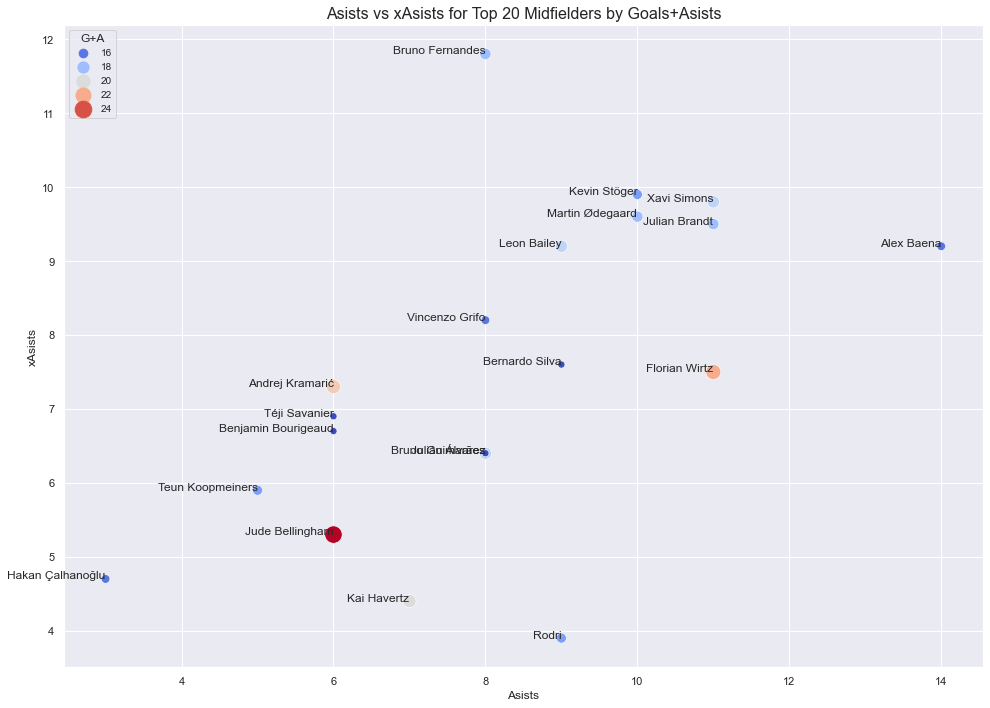

In [86]:
# Visualize the relationship between assists (Ast) and expected assists (xAG) for the top 20 midfielders (by G+A):
# - Filter the data to focus on the top 20 midfielders based on their combined goals and assists (G+A).
# - Create a scatter plot where the x-axis represents assists (Ast), and the y-axis represents expected assists (xAG).
# - Use color (hue) to indicate the combined goals and assists (G+A), and vary the marker size according to G+A.
top_20_mf = data[data['Position'] == 'MF']
top_20_mf = top_20_mf.sort_values(by='G+A', ascending=False).head(20)
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=top_20_mf, x='Ast', y='xAG', hue='G+A', size='G+A',palette="coolwarm", sizes=(50, 300), legend='brief')


# Add values to each bar
for i, row in top_20_mf.iterrows():
    plt.text(row['Ast'], row['xAG'], row['Player'], fontsize=12, ha='right')

plt.title('Asists vs xAsists for Top 20 Midfielders by Goals+Asists', fontsize=16)
plt.xlabel('Asists', fontsize=12)
plt.ylabel('xAsists', fontsize=12)
plt.legend(title='G+A', fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

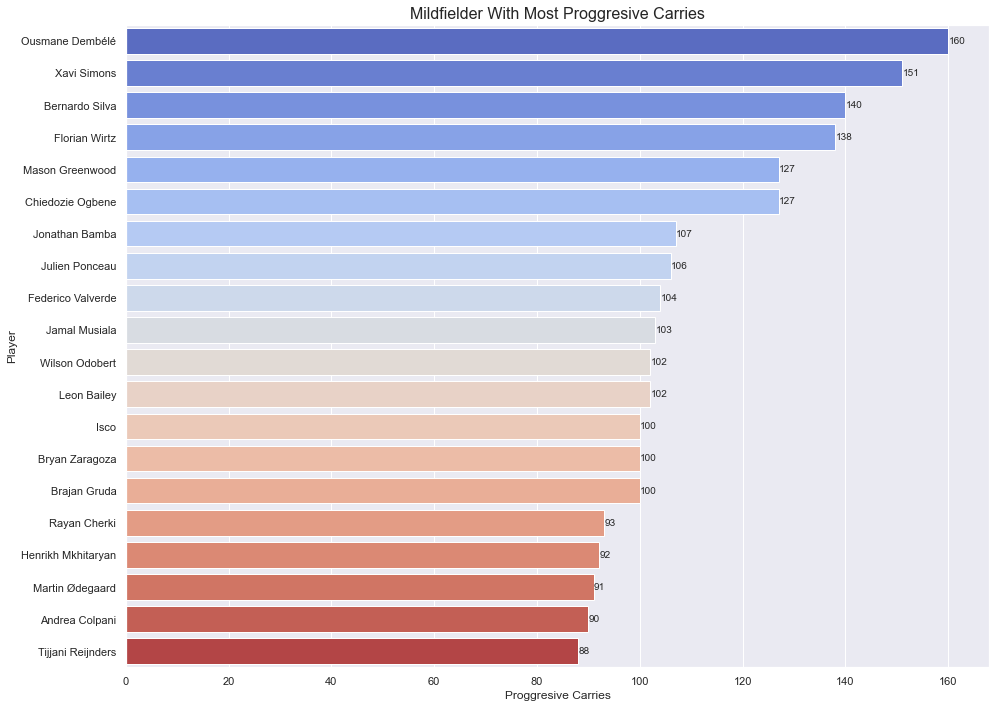

In [87]:
# Visualize the midfielders with the most progressive carries (PrgC):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'PrgC' columns to focus on the players and their progressive carries.
# - Sort the midfielders by the number of progressive carries ('PrgC') in descending order.
# - Select the top 20 midfielders with the most progressive carries.
# - Create a horizontal bar chart to compare the total progressive carries across these midfielders.
midfielder_most_PrgC = data[data['Position'] == 'MF']
midfielder_most_PrgC = midfielder_most_PrgC[['Player','PrgC']].sort_values(by='PrgC', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_PrgC[:20], y='Player', x='PrgC', order=midfielder_most_PrgC[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Proggresive Carries', fontsize=16)
plt.xlabel('Proggresive Carries', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

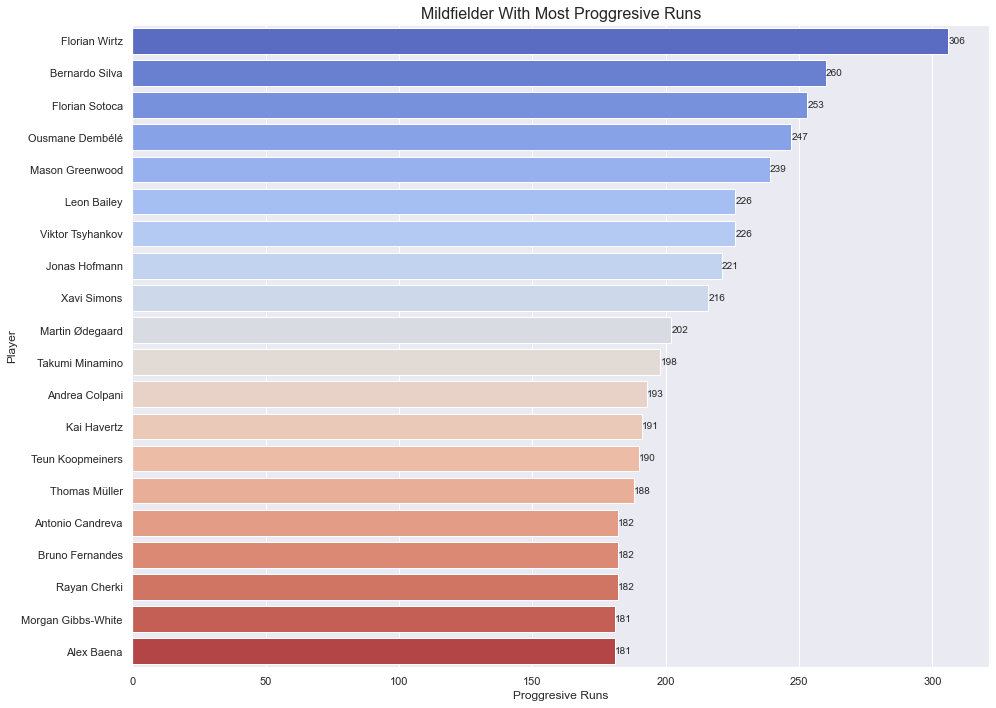

In [88]:
# Visualize the midfielders with the most progressive runs (PrgR):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'PrgR' columns to focus on the players and their progressive runs.
# - Sort the midfielders by the number of progressive runs ('PrgR') in descending order.
# - Select the top 20 midfielders with the most progressive runs.
# - Create a horizontal bar chart to compare the total progressive runs across these midfielders.
midfielder_most_PrgR = data[data['Position'] == 'MF']
midfielder_most_PrgR = midfielder_most_PrgR[['Player','PrgR']].sort_values(by='PrgR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_PrgR[:20], y='Player', x='PrgR', order=midfielder_most_PrgR[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Proggresive Runs', fontsize=16)
plt.xlabel('Proggresive Runs', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

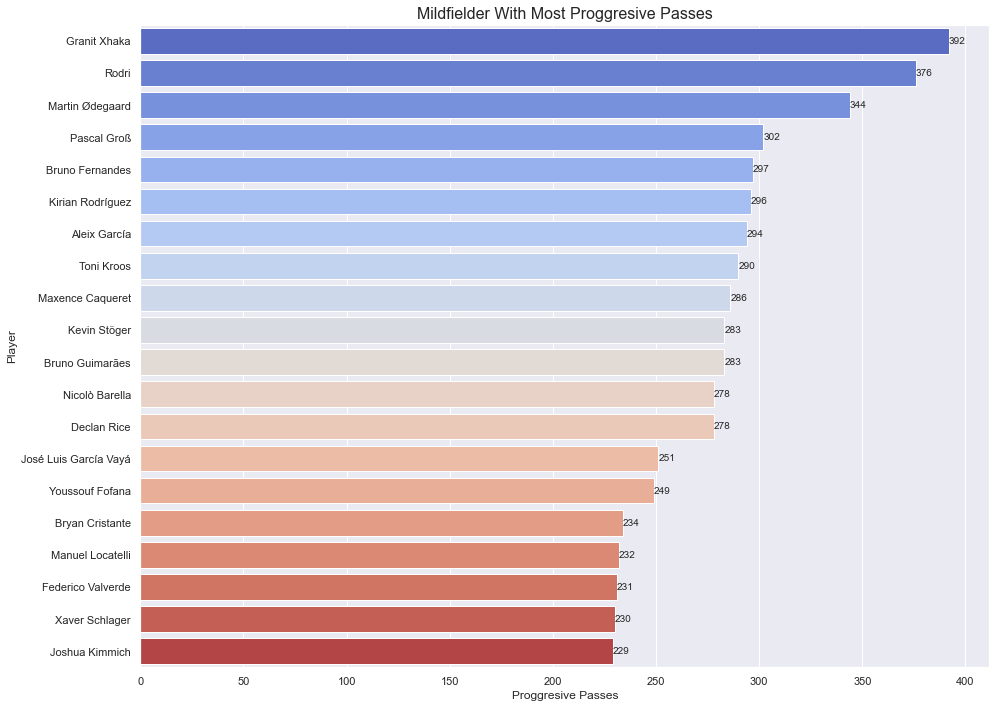

In [89]:
# Visualize the midfielders with the most progressive passes (PrgP):
# - Filter the data to focus on players in the midfielder position ('MF').
# - Select the 'Player' and 'PrgP' columns to focus on the players and their progressive passes.
# - Sort the midfielders by the number of progressive passes ('PrgP') in descending order.
# - Select the top 20 midfielders with the most progressive passes.
# - Create a horizontal bar chart to compare the total progressive passes across these midfielders.
midfielder_most_PrgP = data[data['Position'] == 'MF']
midfielder_most_PrgP = midfielder_most_PrgP[['Player','PrgP']].sort_values(by='PrgP', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=midfielder_most_PrgP[:20], y='Player', x='PrgP', order=midfielder_most_PrgP[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Mildfielder With Most Proggresive Passes', fontsize=16)
plt.xlabel('Proggresive Passes', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

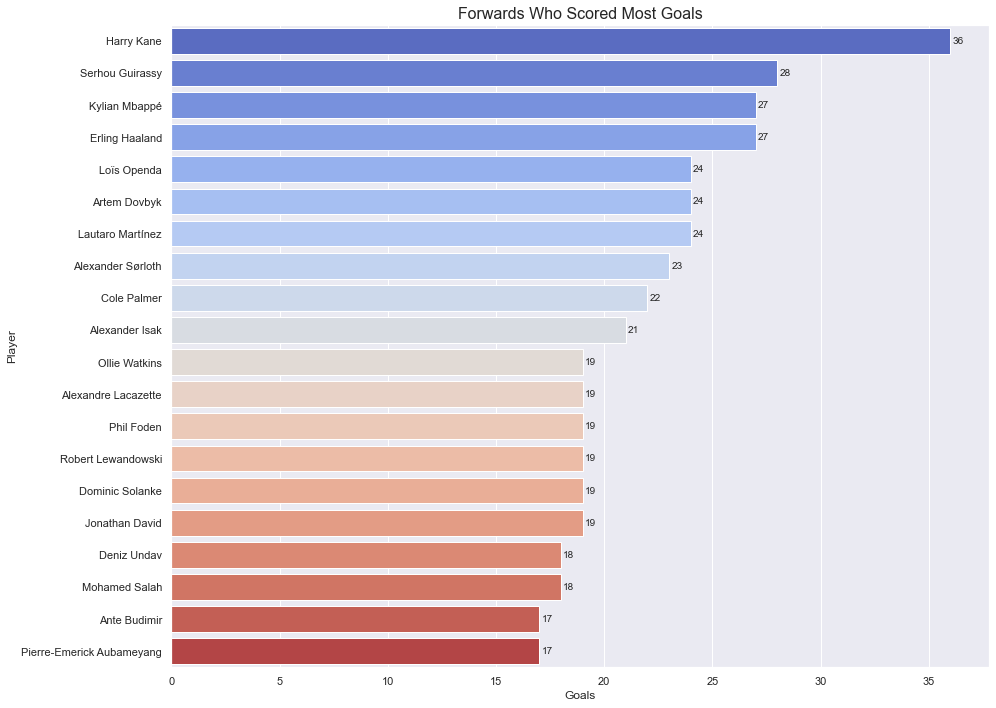

In [90]:
# Visualize the forwards who scored the most goals:
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'Gls' columns to focus on the players and their goals scored.
# - Sort the forwards by the number of goals scored ('Gls') in descending order.
# - Select the top 20 forwards with the most goals.
# - Create a horizontal bar chart to compare the total goals scored across these forwards.
forwards_most_goal = data[data['Position'] == 'FW']
forwards_most_goal = forwards_most_goal[['Player','Gls']].sort_values(by='Gls', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_goal[:20], y='Player', x='Gls', order=forwards_most_goal[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Forwards Who Scored Most Goals', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

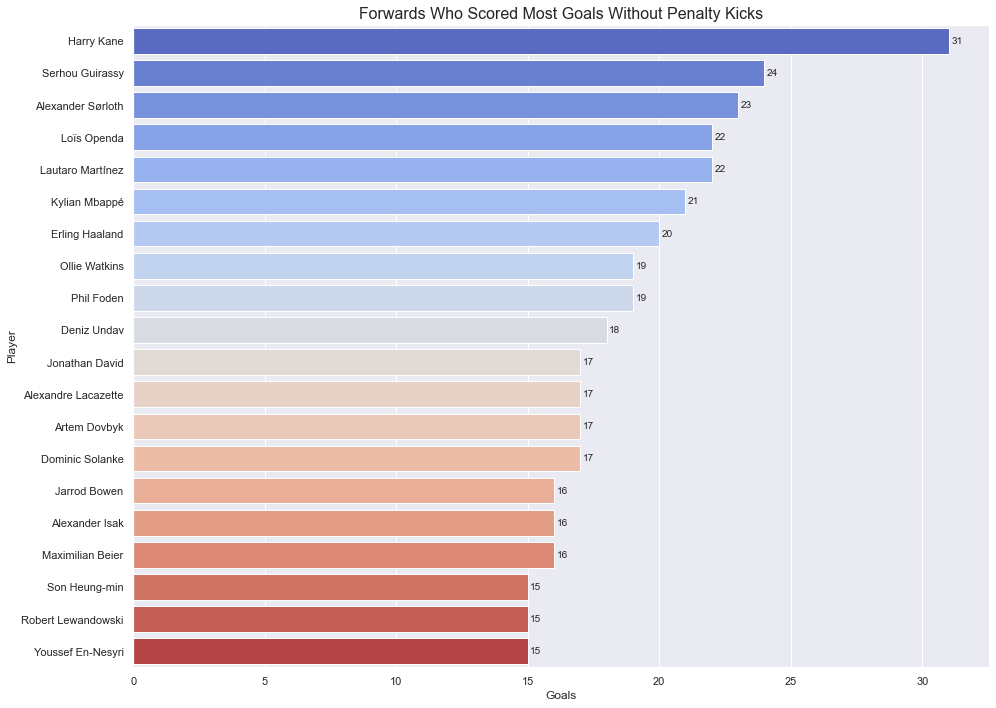

In [91]:
# Visualize the forwards who scored the most goals without penalty kicks (G-PK):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'G-PK' columns to focus on the players and their non-penalty goals.
# - Sort the forwards by the number of goals scored excluding penalty kicks ('G-PK') in descending order.
# - Select the top 20 forwards with the most non-penalty goals.
# - Create a horizontal bar chart to compare the total goals (excluding penalty kicks) across these forwards.
forwards_most_goal_PK = data[data['Position'] == 'FW']
forwards_most_goal_PK = forwards_most_goal_PK[['Player','G-PK']].sort_values(by='G-PK', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_goal_PK[:20], y='Player', x='G-PK', order=forwards_most_goal_PK[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Forwards Who Scored Most Goals Without Penalty Kicks', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

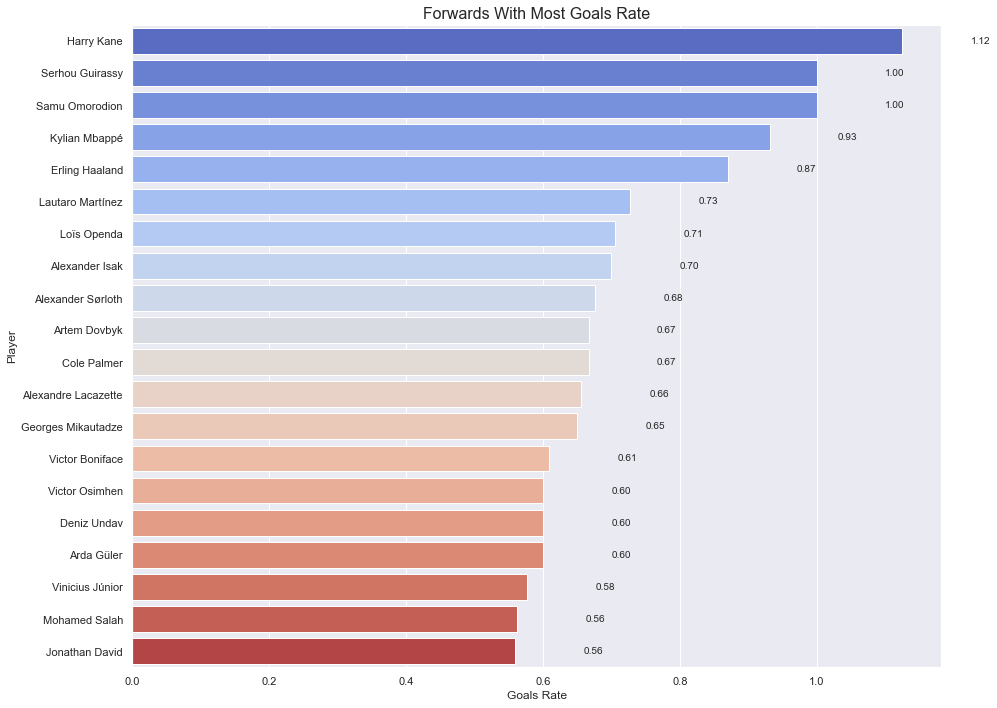

In [92]:
# Visualize the forwards with the highest goals rate (Gls_rate):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'Gls_rate' columns to focus on the players and their goals rate.
# - Sort the forwards by the goals rate ('Gls_rate') in descending order.
# - Select the top 20 forwards with the highest goals rate.
# - Create a horizontal bar chart to compare the goals rate across these forwards.
forwards_most_Gls_rate = data[data['Position'] == 'FW']
forwards_most_Gls_rate = forwards_most_Gls_rate[['Player','Gls_rate']].sort_values(by='Gls_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_Gls_rate[:20], y='Player', x='Gls_rate', order=forwards_most_Gls_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most Goals Rate', fontsize=16)
plt.xlabel('Goals Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()

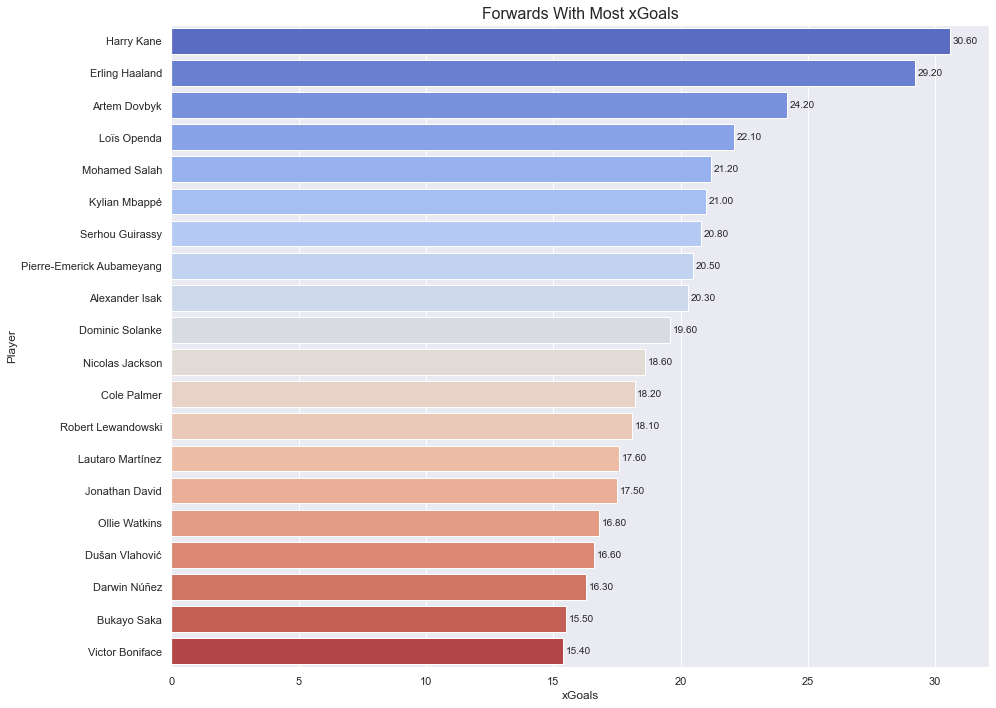

In [93]:
# Visualize the forwards with the most expected goals (xG):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'xG' columns to focus on the players and their expected goals.
# - Sort the forwards by expected goals ('xG') in descending order.
# - Select the top 20 forwards with the highest expected goals.
# - Create a horizontal bar chart to compare the total expected goals across these forwards.
forwards_most_xG = data[data['Position'] == 'FW']
forwards_most_xG = forwards_most_xG[['Player','xG']].sort_values(by='xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_xG[:20], y='Player', x='xG', order=forwards_most_xG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most xGoals', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

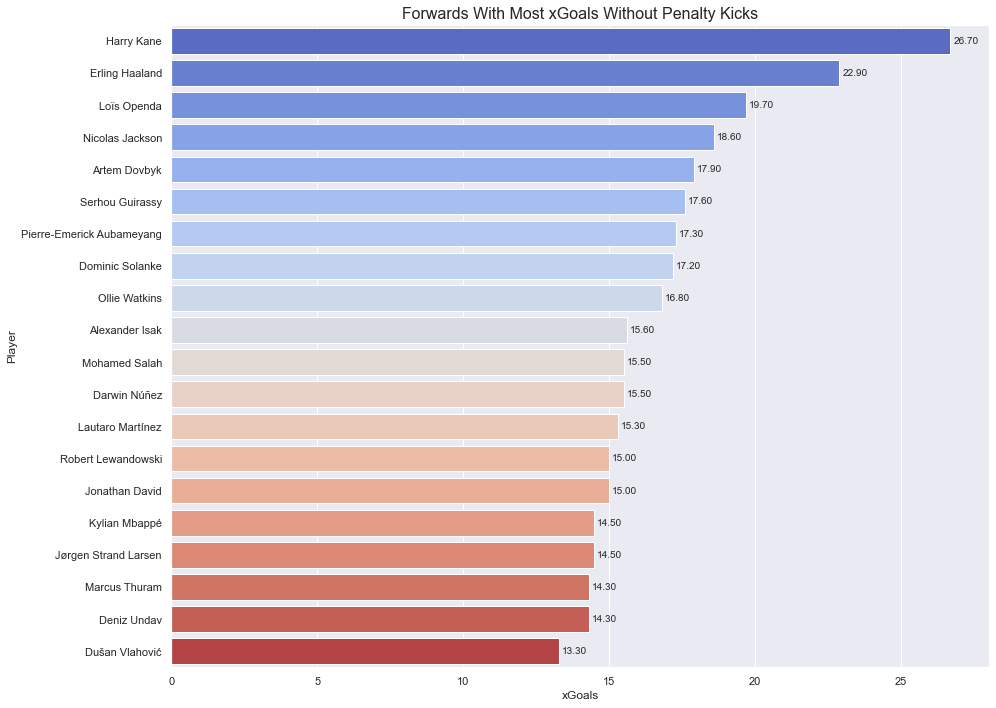

In [94]:
# Visualize the forwards with the most non-penalty expected goals (npxG):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'npxG' columns to focus on the players and their non-penalty expected goals.
# - Sort the forwards by non-penalty expected goals ('npxG') in descending order.
# - Select the top 20 forwards with the highest non-penalty expected goals.
# - Create a horizontal bar chart to compare the total non-penalty expected goals across these forwards.
forwards_most_npxG = data[data['Position'] == 'FW']
forwards_most_npxG = forwards_most_npxG[['Player','npxG']].sort_values(by='npxG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_npxG[:20], y='Player', x='npxG', order=forwards_most_npxG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most xGoals Without Penalty Kicks', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

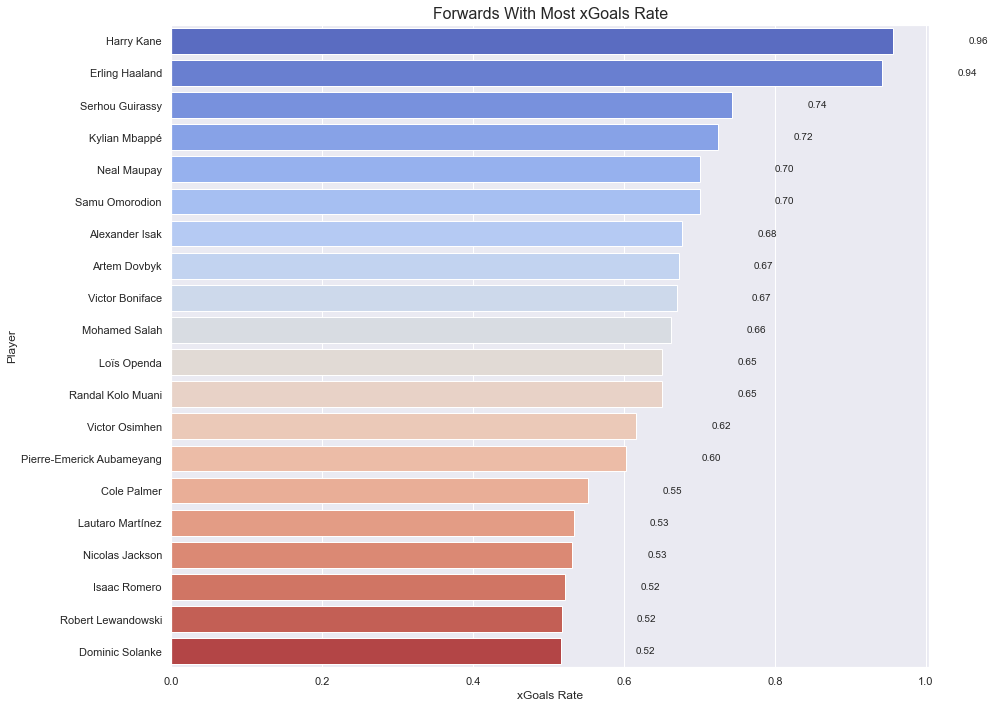

In [95]:
# Visualize the forwards with the highest expected goals rate (xG_rate):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'xG_rate' columns to focus on the players and their expected goals rate.
# - Sort the forwards by the expected goals rate ('xG_rate') in descending order.
# - Select the top 20 forwards with the highest xG rate.
# - Create a horizontal bar chart to compare the xG rate across these forwards.
forwards_most_xG_rate = data[data['Position'] == 'FW']
forwards_most_xG_rate = forwards_most_xG_rate[['Player','xG_rate']].sort_values(by='xG_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_xG_rate[:20], y='Player', x='xG_rate', order=forwards_most_xG_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most xGoals Rate', fontsize=16)
plt.xlabel('xGoals Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

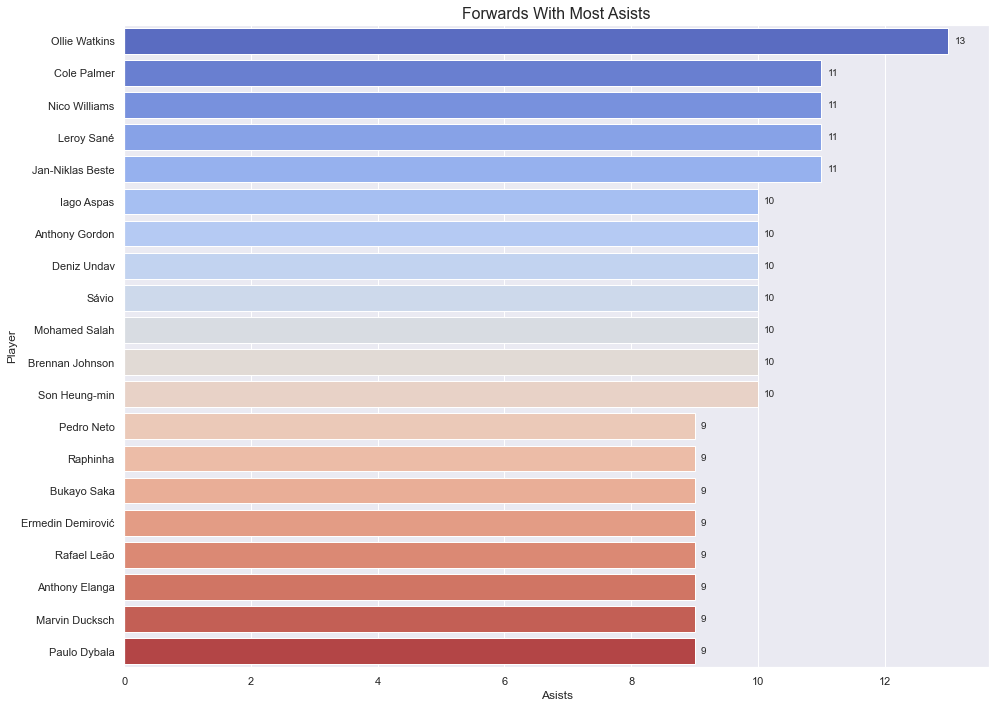

In [96]:
# Visualize the forwards with the most assists (Ast):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'Ast' columns to focus on the players and their assists.
# - Sort the forwards by the number of assists ('Ast') in descending order.
# - Select the top 20 forwards with the most assists.
# - Create a horizontal bar chart to compare the total assists across these forwards.
forwards_most_asists = data[data['Position'] == 'FW']
forwards_most_asists = forwards_most_asists[['Player','Ast']].sort_values(by='Ast', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_asists[:20], y='Player', x='Ast', order=forwards_most_asists[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most Asists', fontsize=16)
plt.xlabel('Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

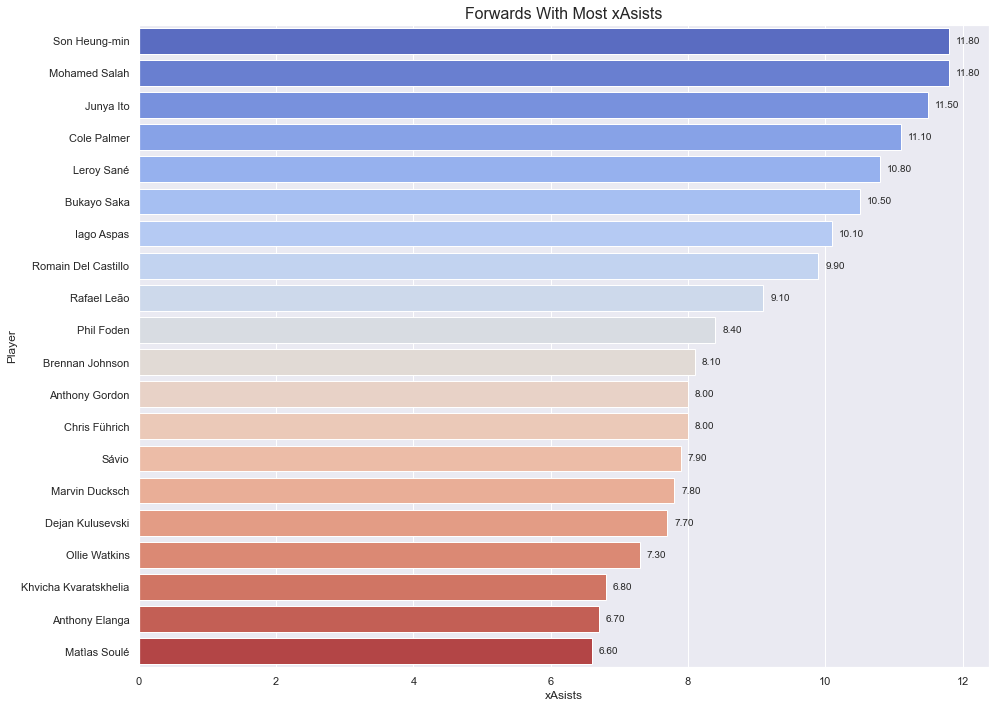

In [97]:
# Visualize the forwards with the most expected assists (xAG):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'xAG' columns to focus on the players and their expected assists.
# - Sort the forwards by the expected assists ('xAG') in descending order.
# - Select the top 20 forwards with the highest expected assists.
# - Create a horizontal bar chart to compare the total expected assists across these forwards.
forwards_most_xAG = data[data['Position'] == 'FW']
forwards_most_xAG = forwards_most_xAG[['Player','xAG']].sort_values(by='xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_xAG[:20], y='Player', x='xAG', order=forwards_most_xAG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most xAsists', fontsize=16)
plt.xlabel('xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

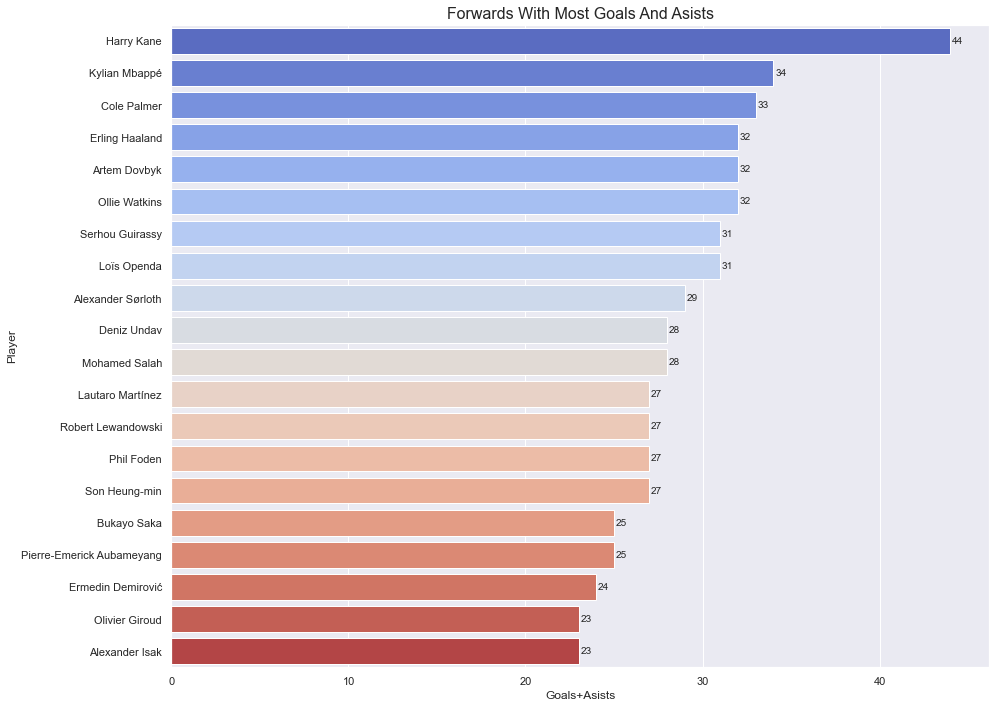

In [98]:
# Visualize the forwards with the most combined goals and assists (G+A):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'G+A' columns to focus on the players and their combined goals and assists.
# - Sort the forwards by their combined goals and assists ('G+A') in descending order.
# - Select the top 20 forwards with the most goals and assists.
# - Create a horizontal bar chart to compare the total goals and assists across these forwards.
forwards_most_G_A = data[data['Position'] == 'FW']
forwards_most_G_A = forwards_most_G_A[['Player','G+A']].sort_values(by='G+A', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_G_A[:20], y='Player', x='G+A', order=forwards_most_G_A[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most Goals And Asists', fontsize=16)
plt.xlabel('Goals+Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

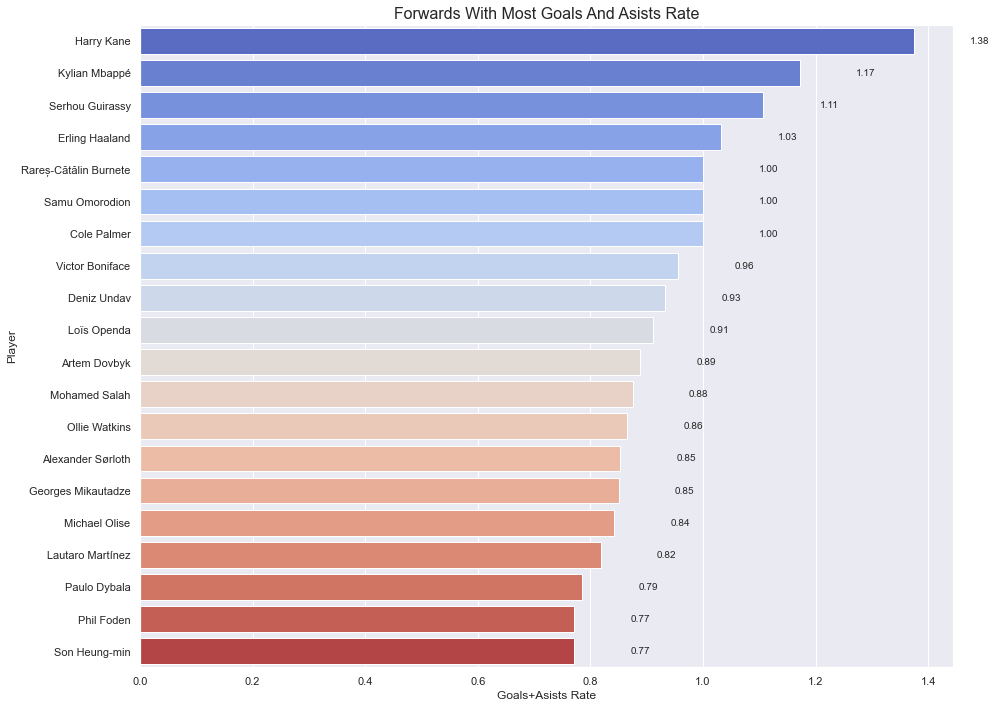

In [99]:
# Visualize the forwards with the highest goals and assists rate (G+A_rate):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'G+A_rate' columns to focus on the players and their goals + assists rate.
# - Sort the forwards by their goals + assists rate ('G+A_rate') in descending order.
# - Select the top 20 forwards with the highest goals + assists rate.
# - Create a horizontal bar chart to compare the goals + assists rate across these forwards.
forwards_most_G_A_rate = data[data['Position'] == 'FW']
forwards_most_G_A_rate = forwards_most_G_A_rate[['Player','G+A_rate']].sort_values(by='G+A_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_G_A_rate[:20], y='Player', x='G+A_rate', order=forwards_most_G_A_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most Goals And Asists Rate', fontsize=16)
plt.xlabel('Goals+Asists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

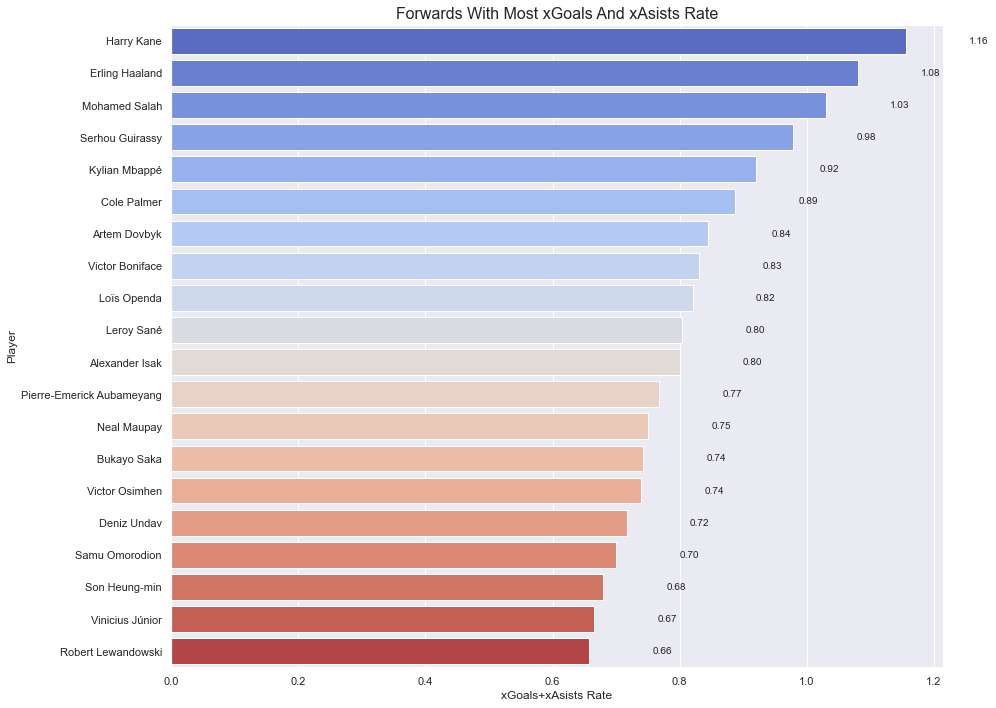

In [100]:
# Visualize the forwards with the highest combined expected goals (xG) and expected assists (xAG) rate (xG+xAG_rate):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'xG+xAG_rate' columns to focus on the players and their combined expected goals and assists rate.
# - Sort the forwards by the combined xG and xAG rate ('xG+xAG_rate') in descending order.
# - Select the top 20 forwards with the highest xG + xAG rate.
# - Create a horizontal bar chart to compare the total xG + xAG rate across these forwards.
forwards_most_xG_xAG_rate = data[data['Position'] == 'FW']
forwards_most_xG_xAG_rate = forwards_most_xG_xAG_rate[['Player','xG+xAG_rate']].sort_values(by='xG+xAG_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_xG_xAG_rate[:20], y='Player', x='xG+xAG_rate', order=forwards_most_xG_xAG_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most xGoals And xAsists Rate', fontsize=16)
plt.xlabel('xGoals+xAsists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

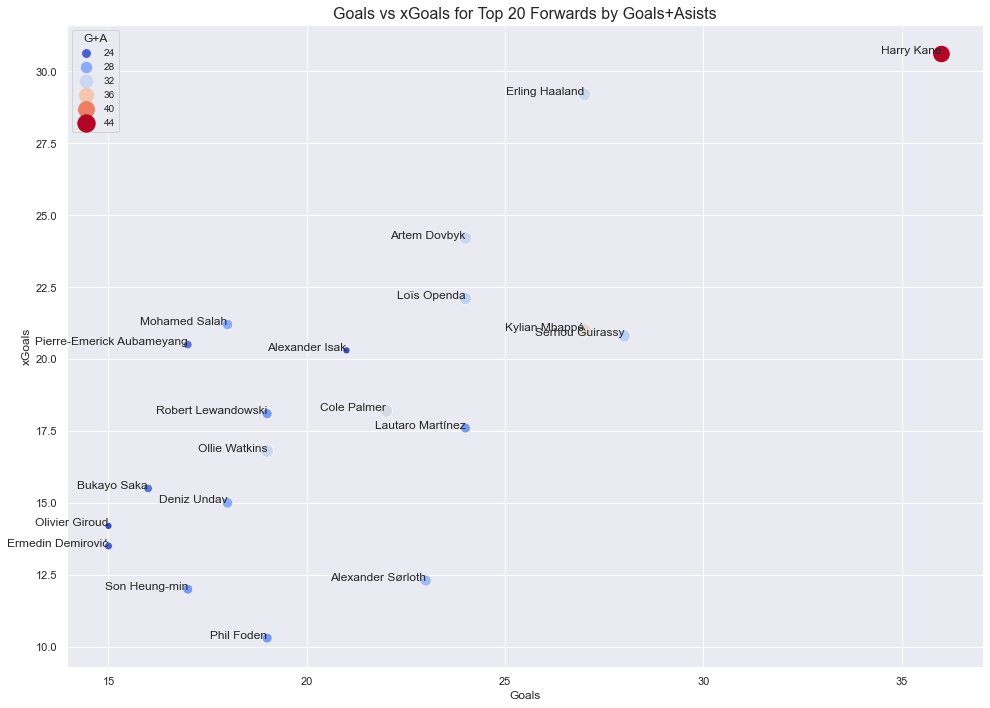

In [101]:
# Visualize the relationship between actual goals (Gls) and expected goals (xG) for the top 20 forwards, 
# based on their combined goals and assists (G+A):
# - Filter the data to focus on the top 20 forwards, sorted by their combined goals and assists (G+A).
# - Create a scatter plot where the x-axis represents actual goals (Gls), and the y-axis represents expected goals (xG).
# - Use the color (hue) to indicate the combined goals and assists (G+A), and adjust the marker size according to G+A.
top_20_fw = data[data['Position'] == 'FW']
top_20_fw = top_20_fw.sort_values(by='G+A', ascending=False).head(20)
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=top_20_fw, x='Gls', y='xG', hue='G+A', size='G+A',palette="coolwarm", sizes=(50, 300), legend='brief')

# Add values to each bar
for i, row in top_20_fw.iterrows():
    plt.text(row['Gls'], row['xG'], row['Player'], fontsize=12, ha='right')

plt.title('Goals vs xGoals for Top 20 Forwards by Goals+Asists', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('xGoals', fontsize=12)
plt.legend(title='G+A', fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

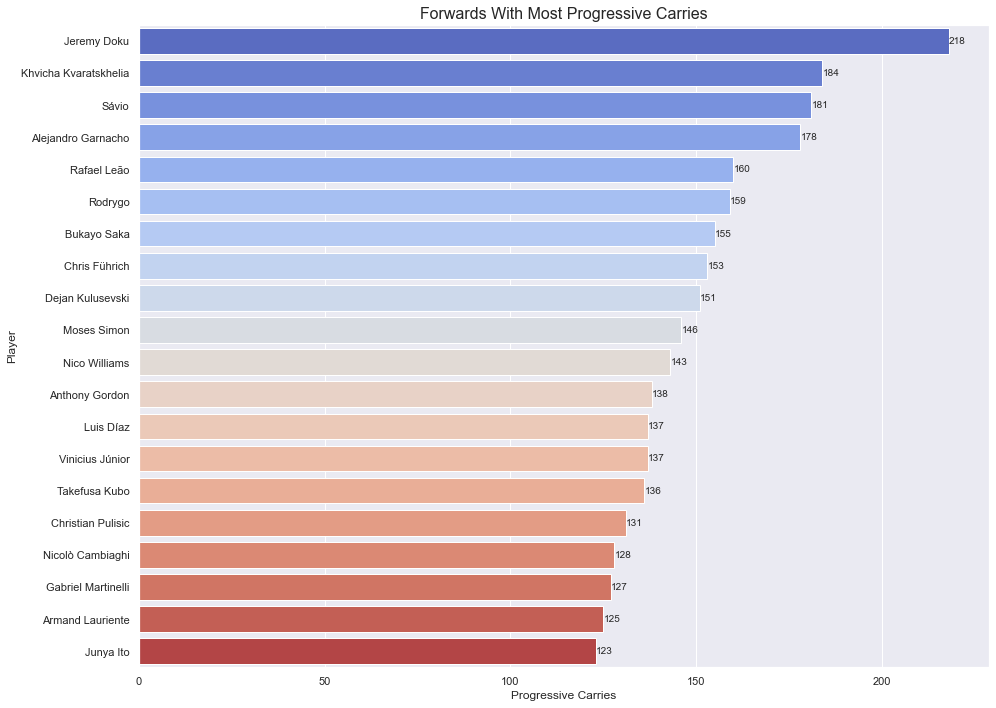

In [102]:
# Visualize the forwards with the most progressive carries (PrgC):
# - Filter the data to focus on players in the forward position ('FW').
# - Select the 'Player' and 'PrgC' columns to focus on the players and their progressive carries.
# - Sort the forwards by the number of progressive carries ('PrgC') in descending order.
# - Select the top 20 forwards with the most progressive carries.
# - Create a horizontal bar chart to compare the total progressive carries across these forwards.
forwards_most_PrgC = data[data['Position'] == 'FW']
forwards_most_PrgC = forwards_most_PrgC[['Player','PrgC']].sort_values(by='PrgC', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=forwards_most_PrgC[:20], y='Player', x='PrgC', order=forwards_most_PrgC[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Forwards With Most Progressive Carries', fontsize=16)
plt.xlabel('Progressive Carries', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

# Competition Analysis


Premier League

In [103]:
premier_league = data[data['Competition'] == 'Premier League']

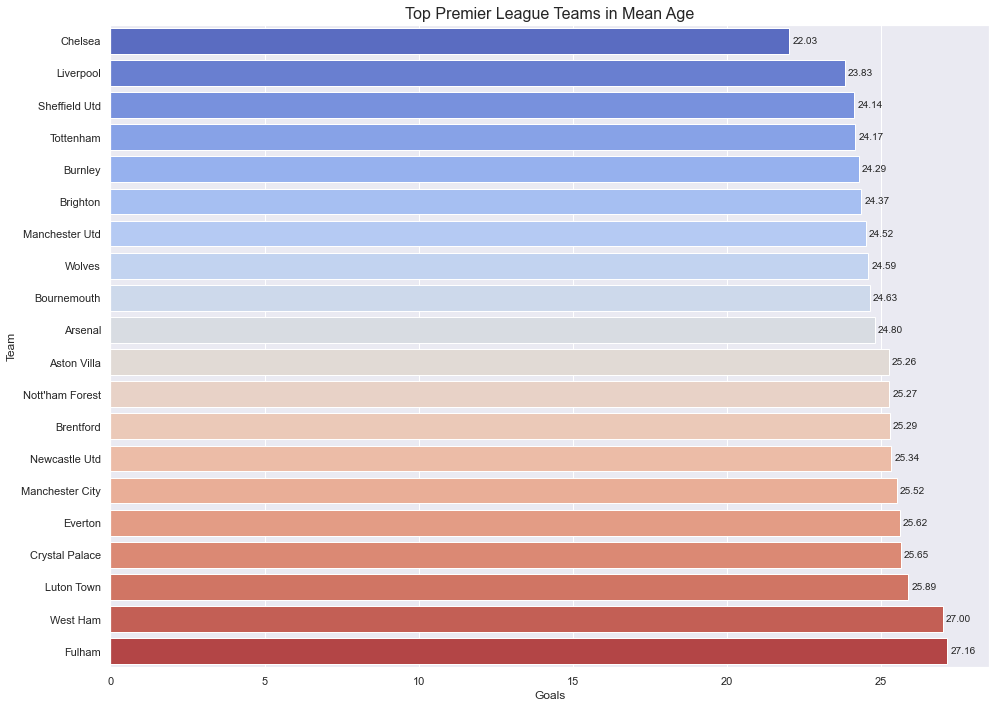

In [104]:
top_premier_clubs_average_age = premier_league.groupby('Team')['Age'].mean().reset_index().sort_values(by='Age', ascending=True)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_average_age[:20], y='Team', x='Age',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Mean Age', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

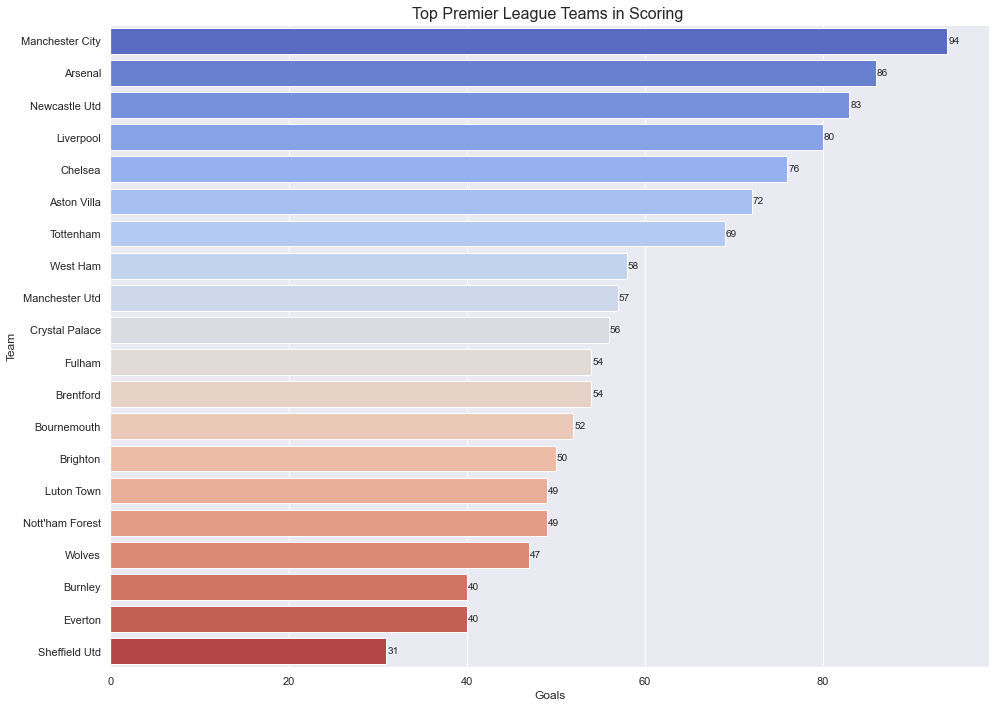

In [105]:
top_premier_clubs_scores = premier_league.groupby('Team')['Gls'].sum().reset_index().sort_values(by='Gls', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_scores[:20], y='Team', x='Gls',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Scoring ', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

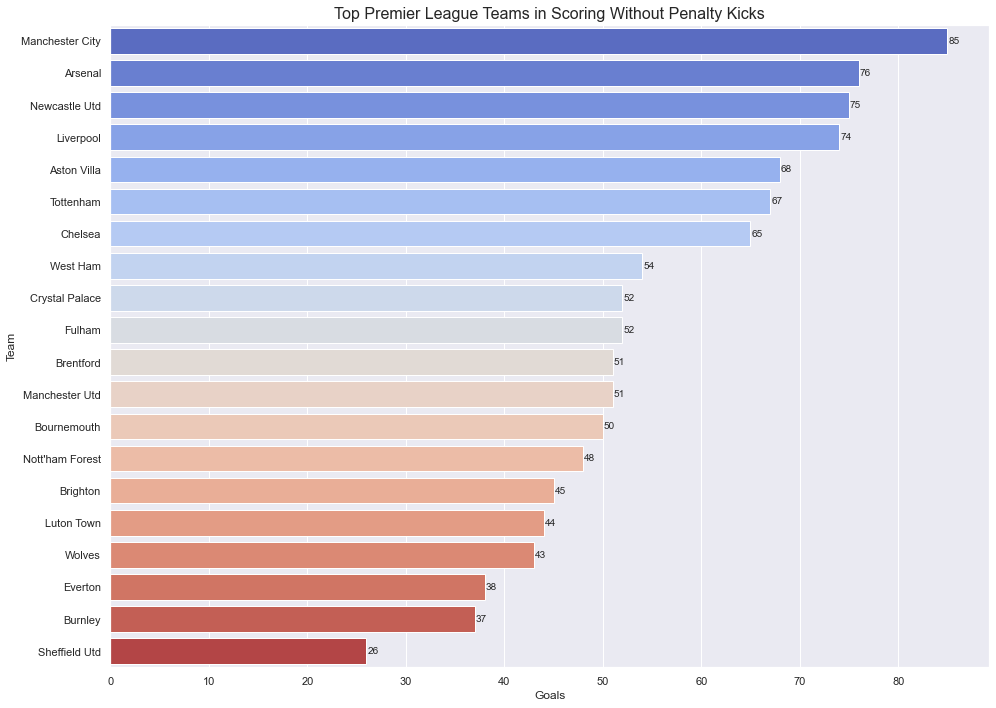

In [106]:
top_premier_clubs_G_PK = premier_league.groupby('Team')['G-PK'].sum().reset_index().sort_values(by='G-PK', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_G_PK[:20], y='Team', x='G-PK',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Scoring Without Penalty Kicks', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

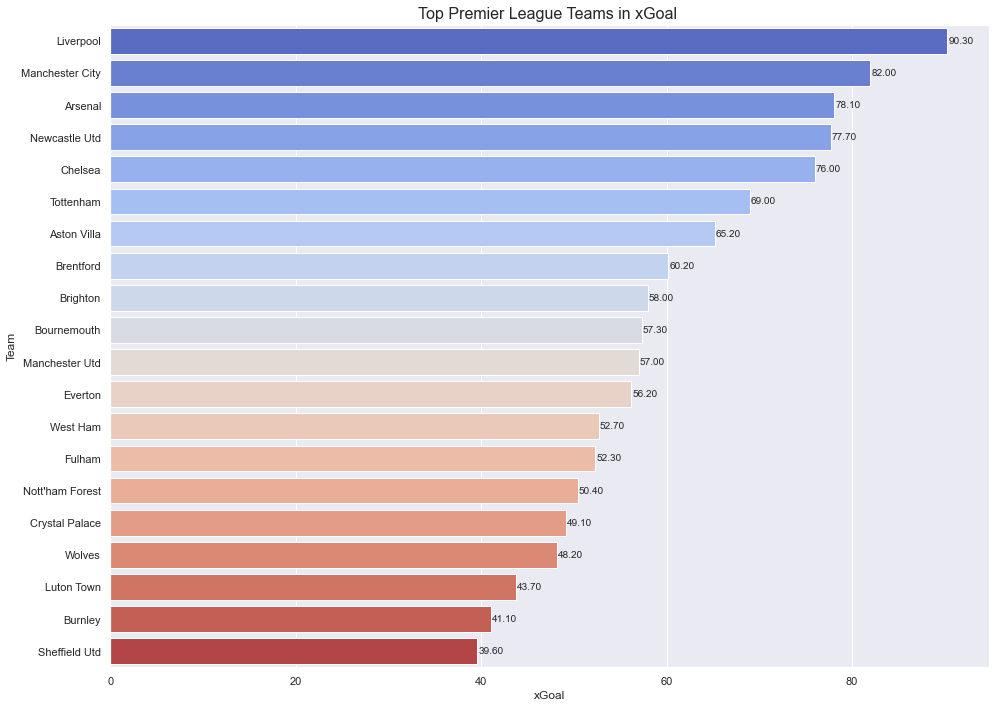

In [107]:
top_premier_clubs_xg = premier_league.groupby('Team')['xG'].sum().reset_index().sort_values(by='xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_xg[:20], y='Team', x='xG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in xGoal ', fontsize=16)
plt.xlabel('xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

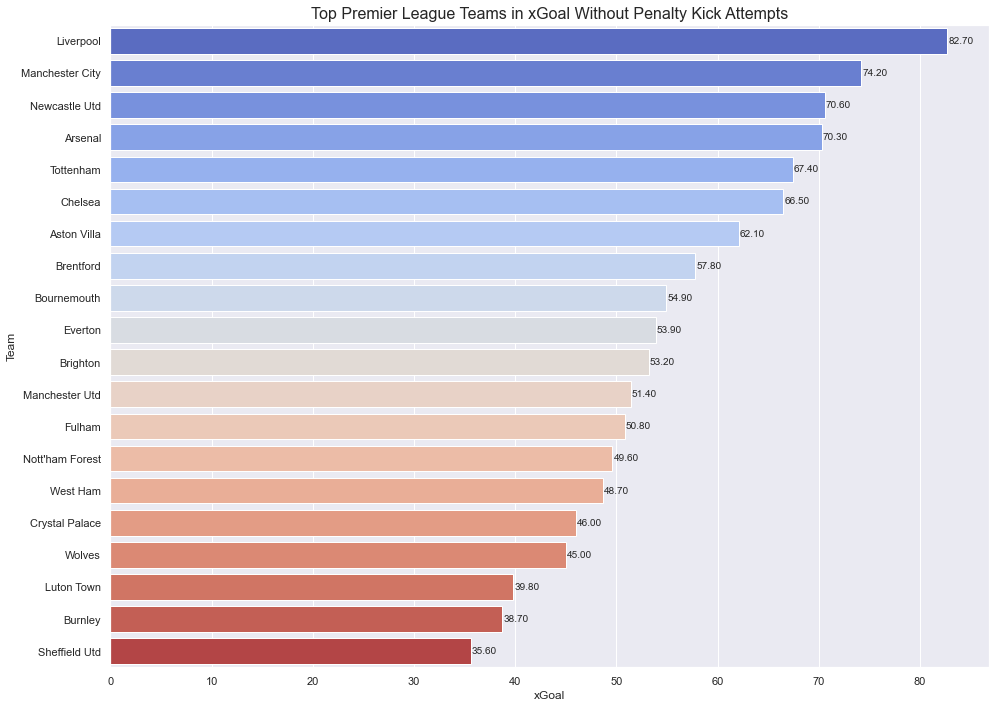

In [108]:
top_premier_clubs_npxG = premier_league.groupby('Team')['npxG'].sum().reset_index().sort_values(by='npxG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_npxG[:20], y='Team', x='npxG',palette="coolwarm")
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in xGoal Without Penalty Kick Attempts', fontsize=16)
plt.xlabel('xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

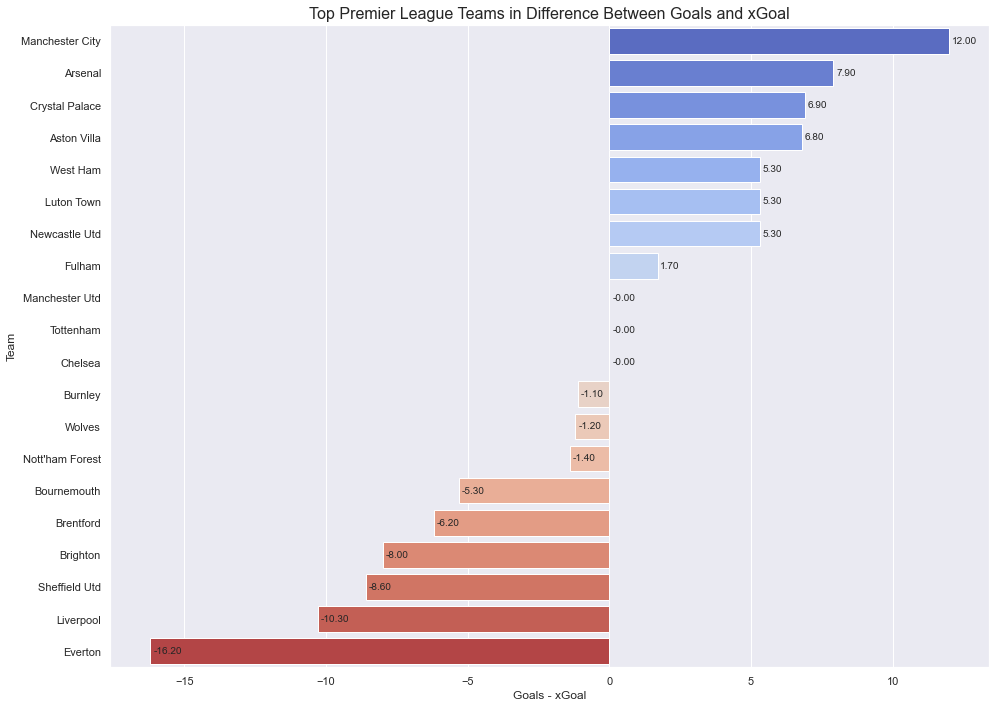

In [109]:
top_premier_clubs_gls_xg = premier_league.groupby('Team')['Gls-xG'].sum().reset_index().sort_values(by='Gls-xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_gls_xg[:20], y='Team', x='Gls-xG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Difference Between Goals and xGoal', fontsize=16)
plt.xlabel('Goals - xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

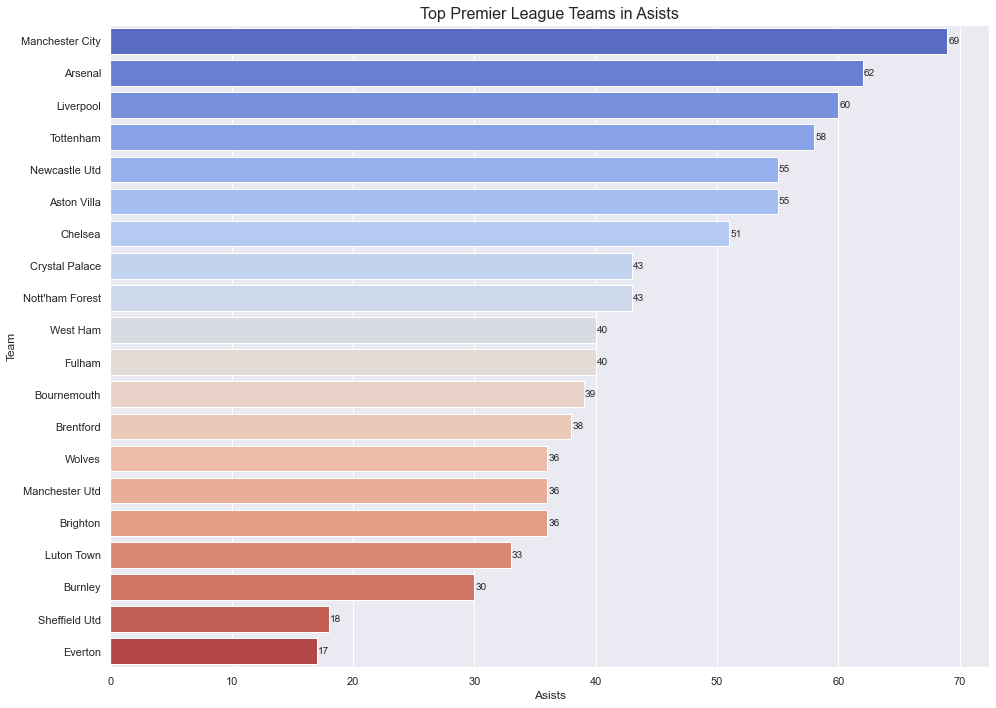

In [110]:
top_premier_clubs_asists = premier_league.groupby('Team')['Ast'].sum().reset_index().sort_values(by='Ast', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_asists[:20], y='Team', x='Ast',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Asists', fontsize=16)
plt.xlabel('Asists', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

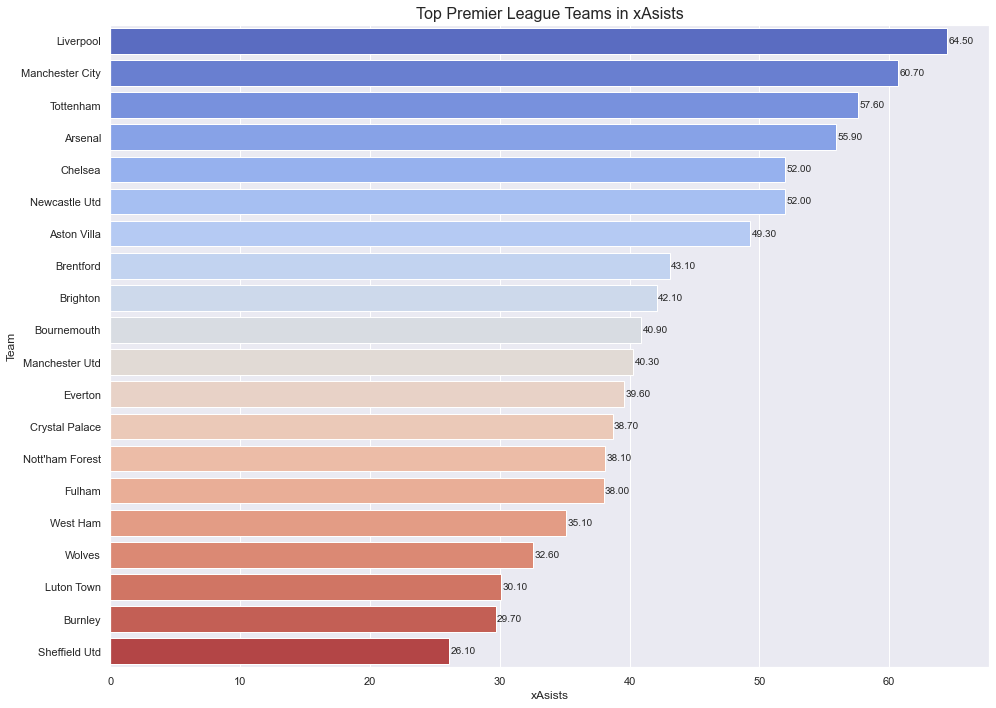

In [111]:
top_premier_clubs_xAG = premier_league.groupby('Team')['xAG'].sum().reset_index().sort_values(by='xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_xAG[:20], y='Team', x='xAG',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in xAsists', fontsize=16)
plt.xlabel('xAsists', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

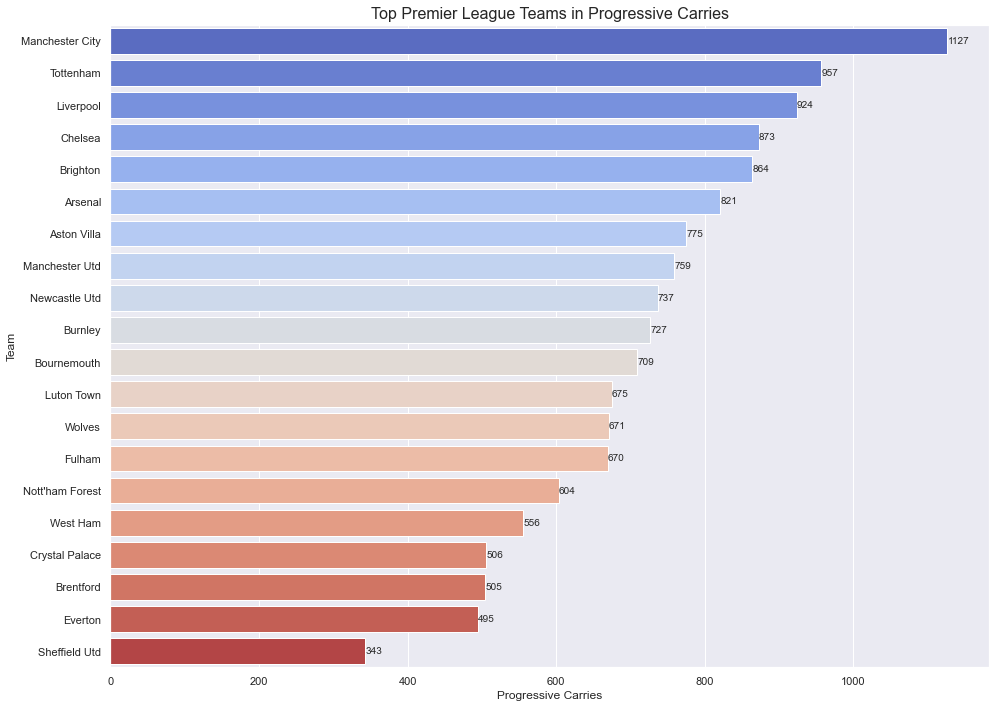

In [112]:
top_premier_clubs_PrgC = premier_league.groupby('Team')['PrgC'].sum().reset_index().sort_values(by='PrgC', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_PrgC[:20], y='Team', x='PrgC',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Progressive Carries', fontsize=16)
plt.xlabel('Progressive Carries', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

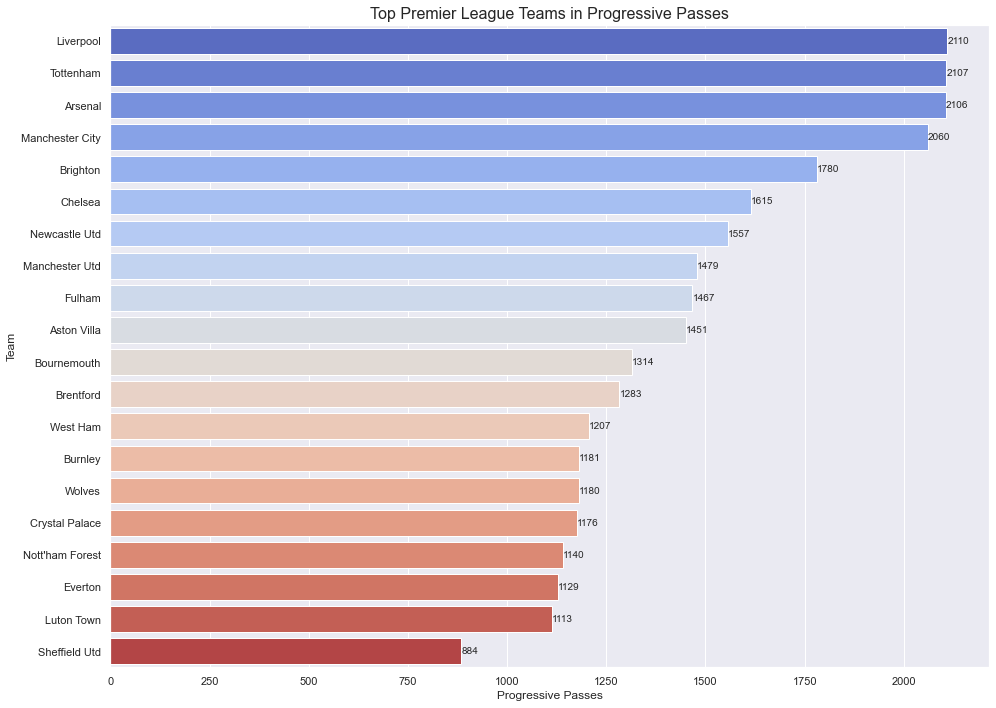

In [113]:
top_premier_clubs_PrgP = premier_league.groupby('Team')['PrgP'].sum().reset_index().sort_values(by='PrgP', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_PrgP[:20], y='Team', x='PrgP',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Progressive Passes', fontsize=16)
plt.xlabel('Progressive Passes', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

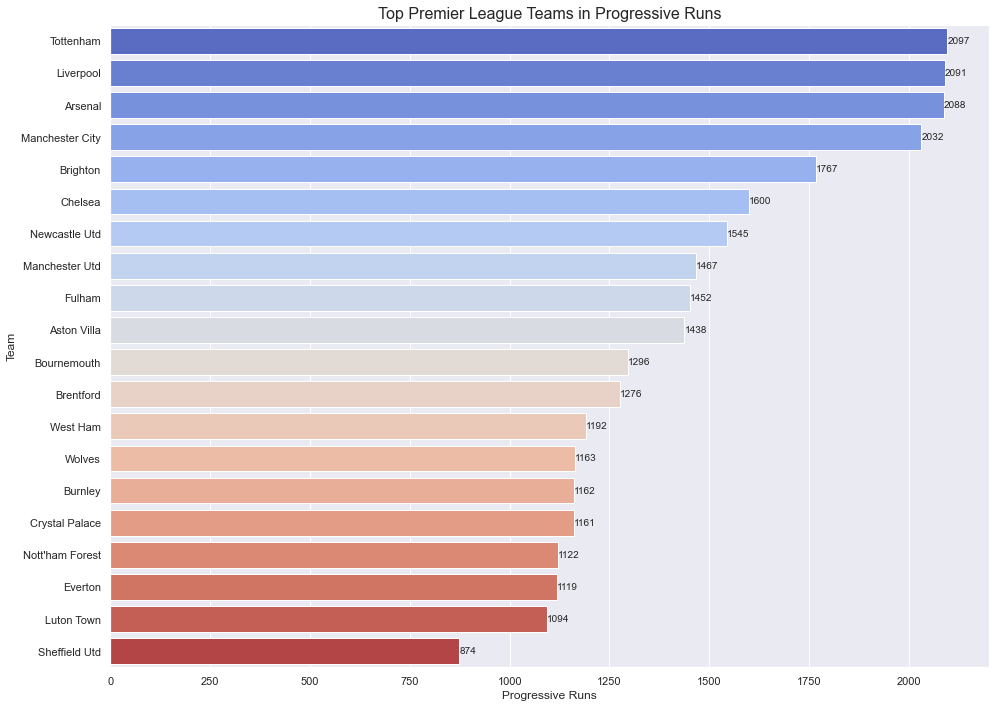

In [114]:
top_premier_clubs_PrgR = premier_league.groupby('Team')['PrgR'].sum().reset_index().sort_values(by='PrgR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_PrgR[:20], y='Team', x='PrgR',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Progressive Runs', fontsize=16)
plt.xlabel('Progressive Runs', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

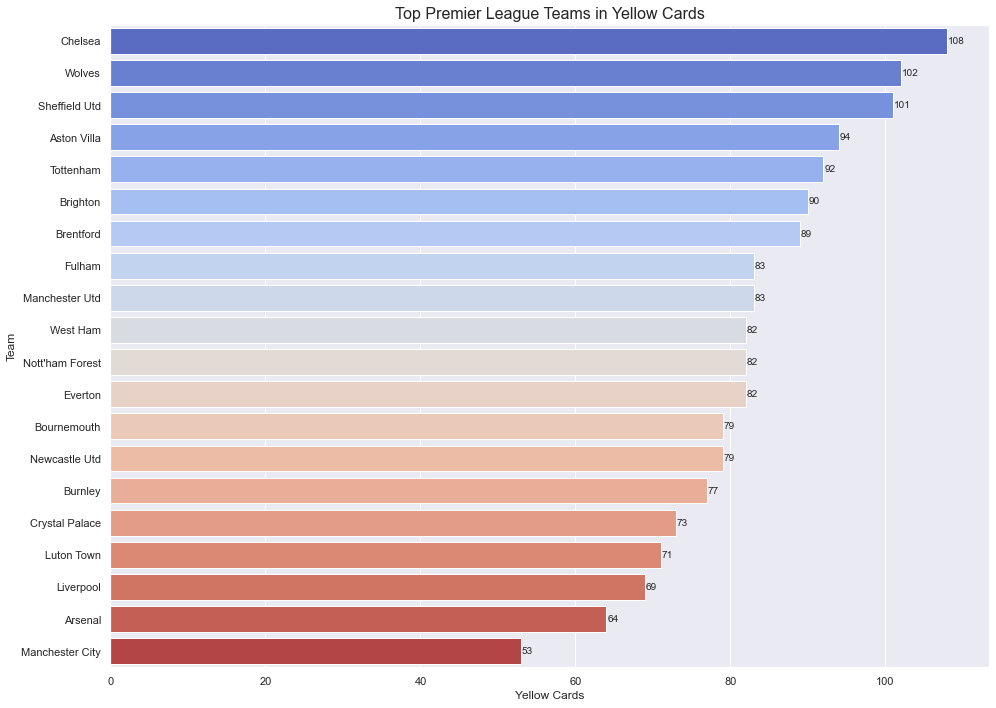

In [115]:
top_premier_clubs_CrdY = premier_league.groupby('Team')['CrdY'].sum().reset_index().sort_values(by='CrdY', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_CrdY[:20], y='Team', x='CrdY',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Yellow Cards', fontsize=16)
plt.xlabel('Yellow Cards', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

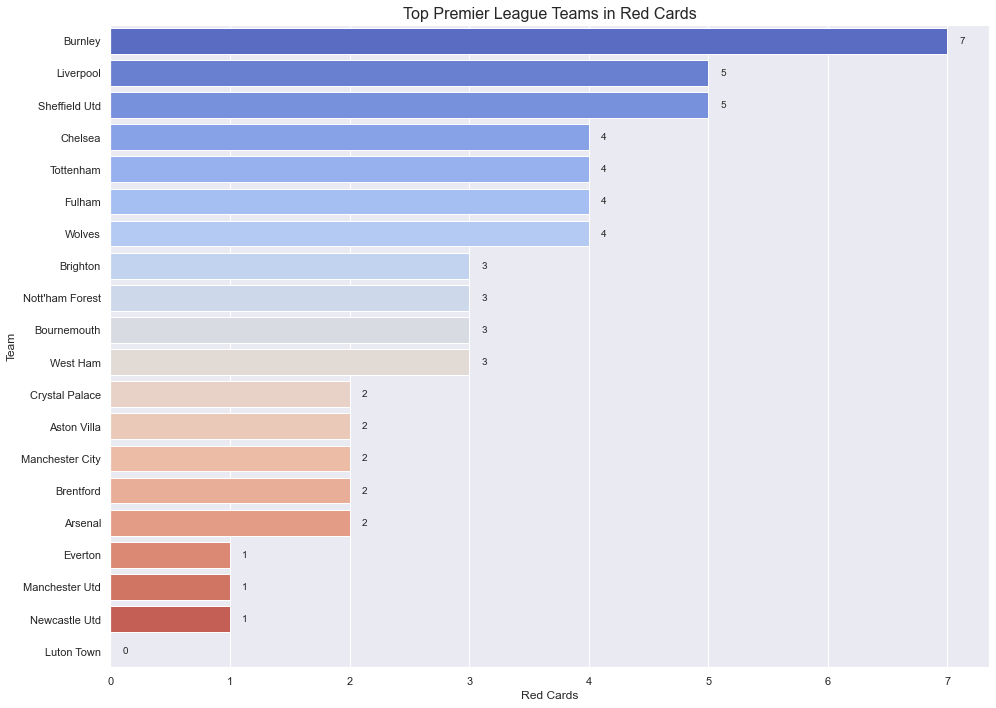

In [116]:
top_premier_clubs_CrdR = premier_league.groupby('Team')['CrdR'].sum().reset_index().sort_values(by='CrdR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_clubs_CrdR[:20], y='Team', x='CrdR',palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Teams in Red Cards', fontsize=16)
plt.xlabel('Red Cards', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

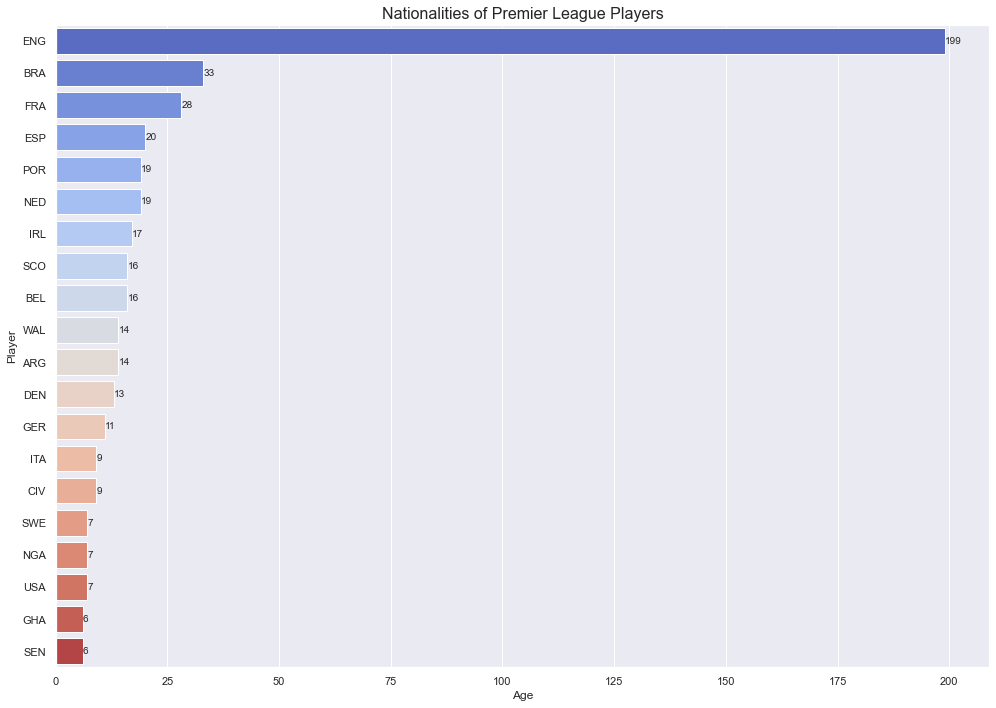

In [117]:
premier_players_nation = premier_league.groupby(['Nationality']).count().reset_index()
premier_players_nation = premier_players_nation.sort_values(by='Rk', ascending=False).head(20)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=premier_players_nation, x='Rk',y='Nationality' , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Nationalities of Premier League Players', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

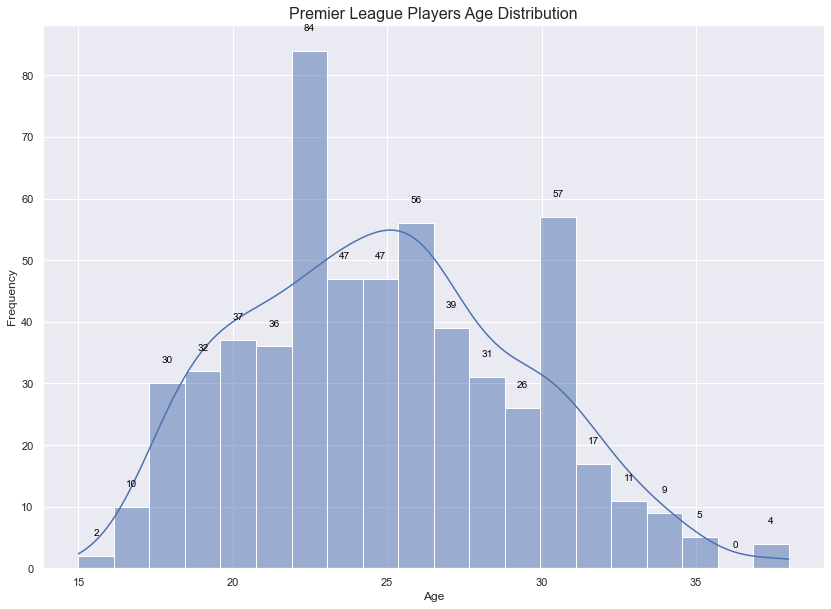

In [118]:
premier_age_dist = premier_league['Age']
plt.figure(figsize=(14, 10))
ax = sns.histplot(premier_age_dist, kde=True, bins=20)  

# Add values to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 3,             
        f'{p.get_height():.0f}',      
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Premier League Players Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

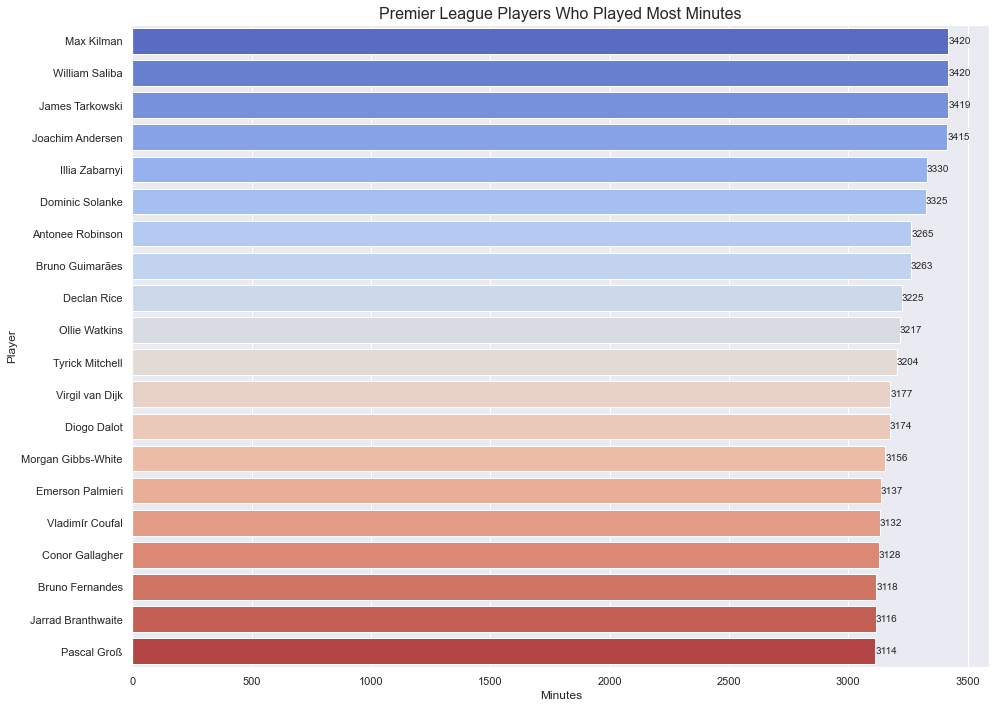

In [119]:
premier_players_not_gk = premier_league[premier_league['Position'] != 'GK']
premier_players_most_min = premier_players_not_gk[['Player','Min']].sort_values(by='Min', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=premier_players_most_min[:20], y='Player', x='Min', order=premier_players_most_min[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Premier League Players Who Played Most Minutes', fontsize=16)
plt.xlabel('Minutes', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

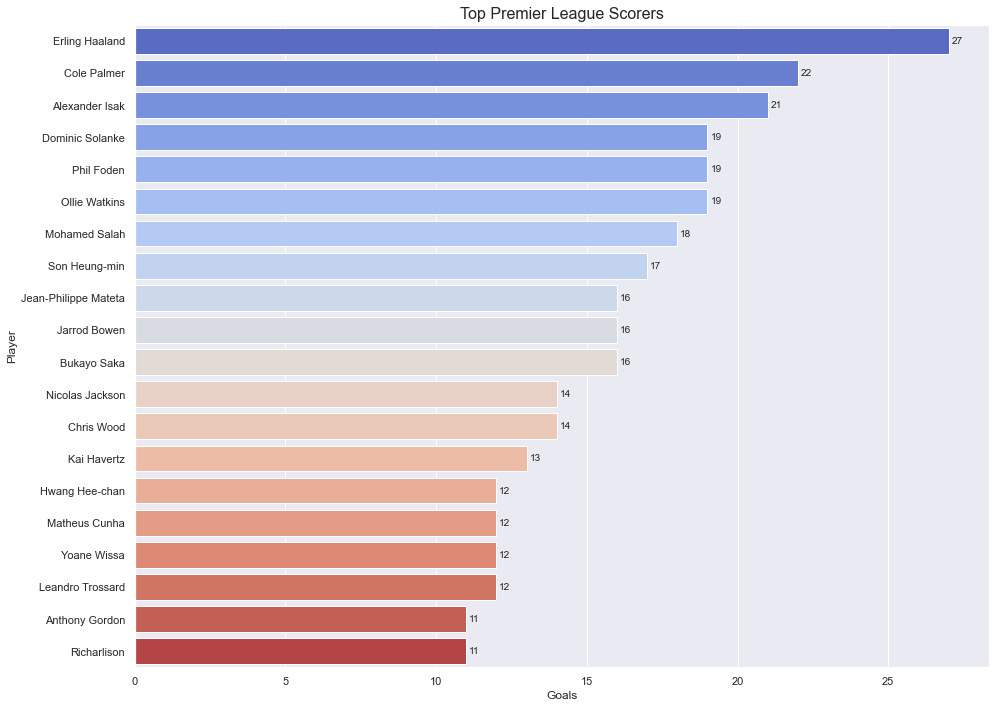

In [120]:
top_premier_scorers = premier_league[['Player','Gls']].sort_values(by='Gls', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_scorers[:20], y='Player', x='Gls', order=top_premier_scorers[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Scorers', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

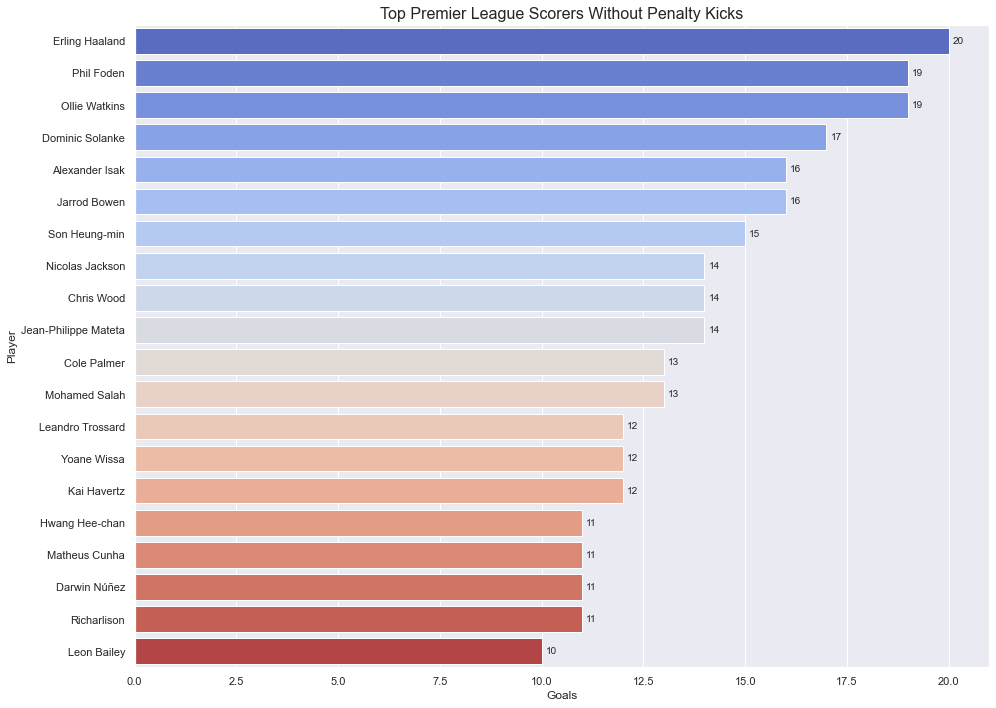

In [121]:
top_premier_players_G_PK = premier_league[['Player','G-PK']].sort_values(by='G-PK', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_G_PK[:20], y='Player', x='G-PK', order=top_premier_players_G_PK[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Scorers Without Penalty Kicks', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

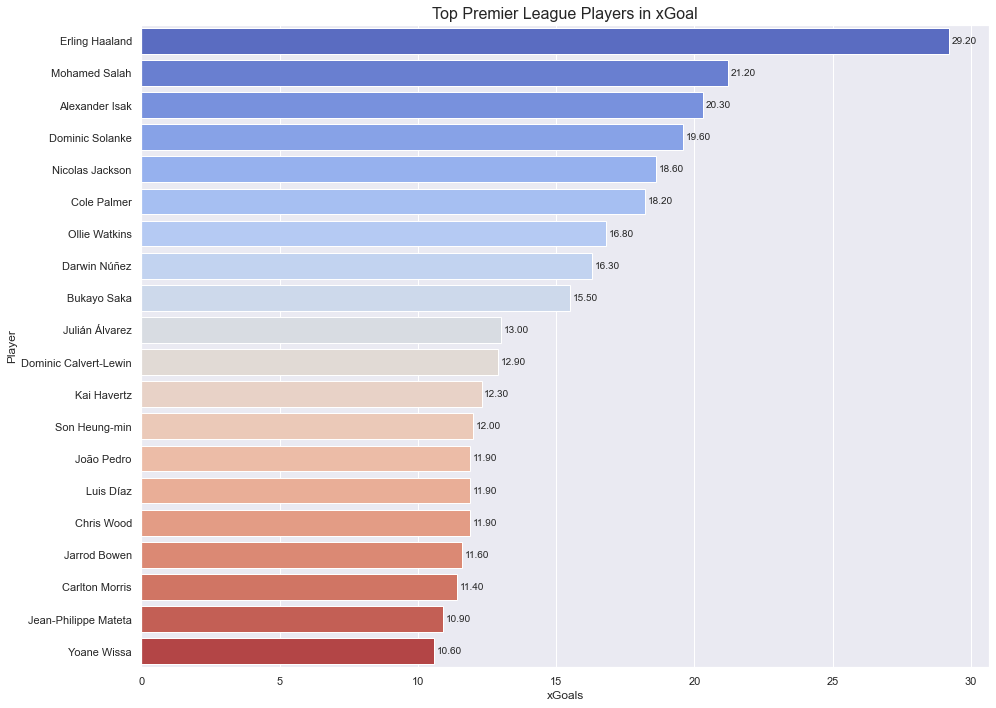

In [122]:
top_premier_players_xg = premier_league[['Player','xG']].sort_values(by='xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_xg[:20], y='Player', x='xG', order=top_premier_players_xg[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Players in xGoal', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

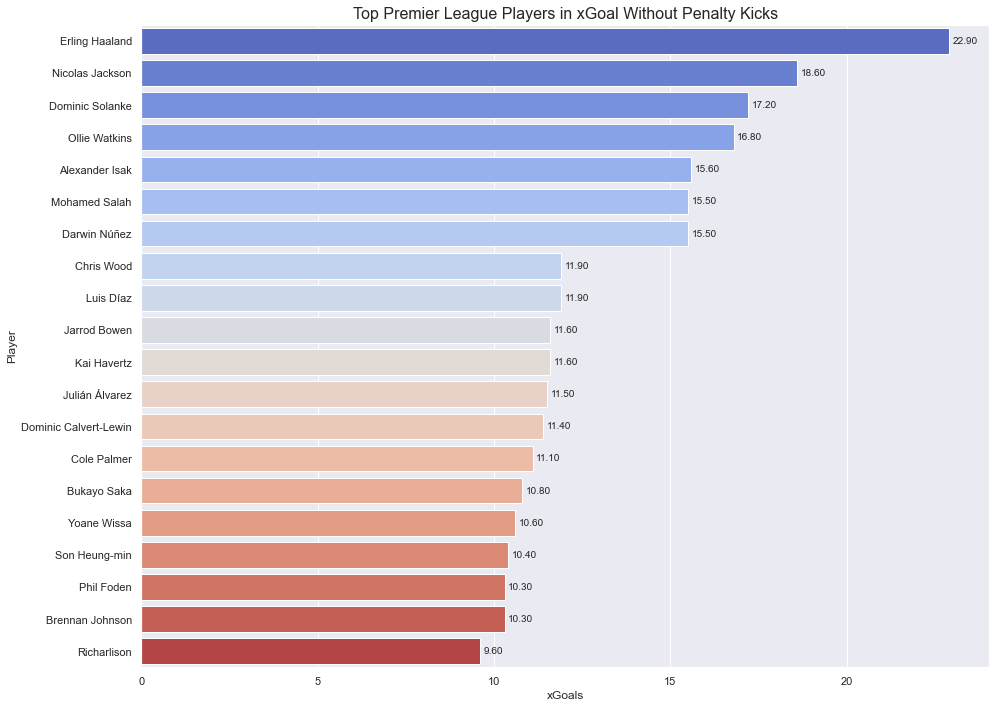

In [123]:
top_premier_players_npxG = premier_league[['Player','npxG']].sort_values(by='npxG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_npxG[:20], y='Player', x='npxG', order=top_premier_players_npxG[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Players in xGoal Without Penalty Kicks', fontsize=16)
plt.xlabel('xGoals', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

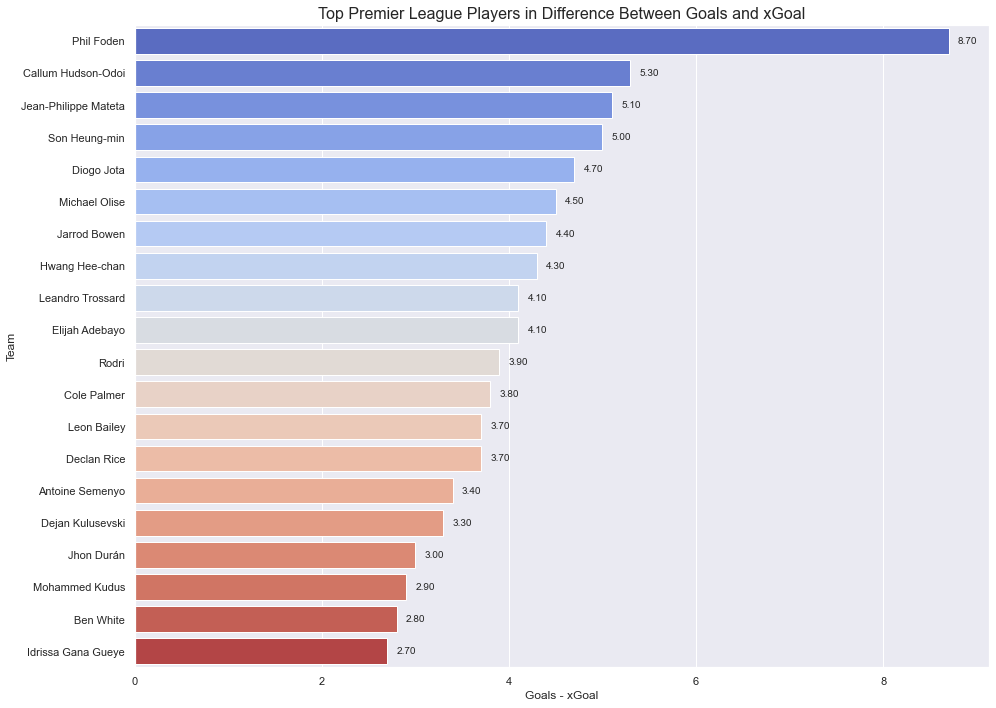

In [124]:
top_premier_players_gls_xg =  premier_league[['Player','Gls-xG']].sort_values(by='Gls-xG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_gls_xg[:20], y='Player', x='Gls-xG', order=top_premier_players_gls_xg[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Players in Difference Between Goals and xGoal', fontsize=16)
plt.xlabel('Goals - xGoal', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

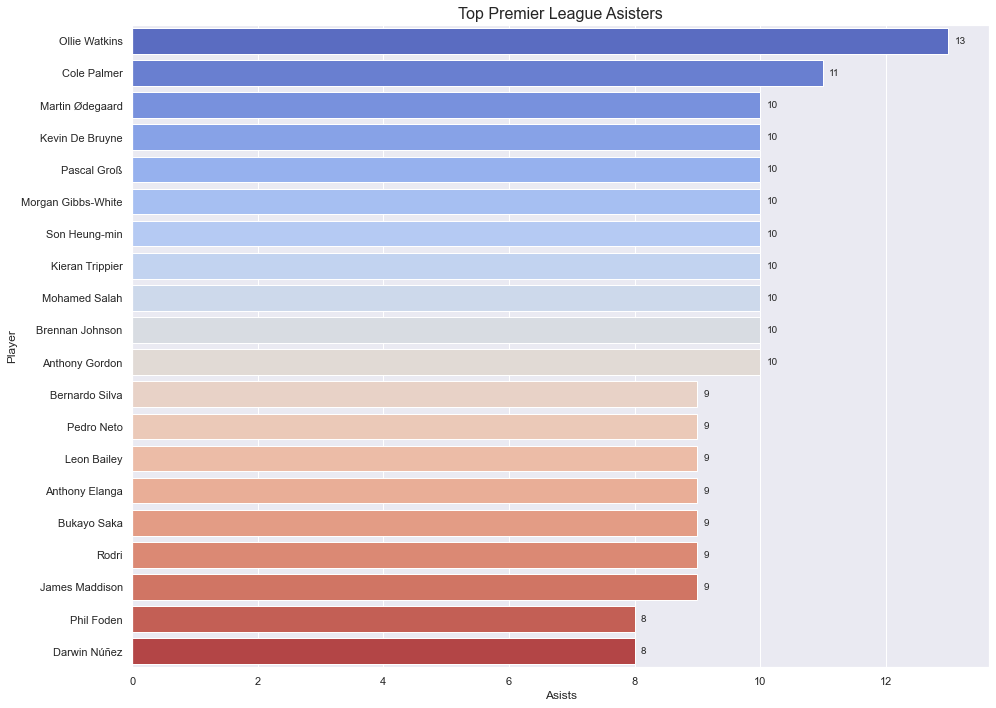

In [125]:
top_premier_asisters = premier_league[['Player','Ast']].sort_values(by='Ast', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_asisters[:20], y='Player', x='Ast', order=top_premier_asisters[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Asisters', fontsize=16)
plt.xlabel('Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

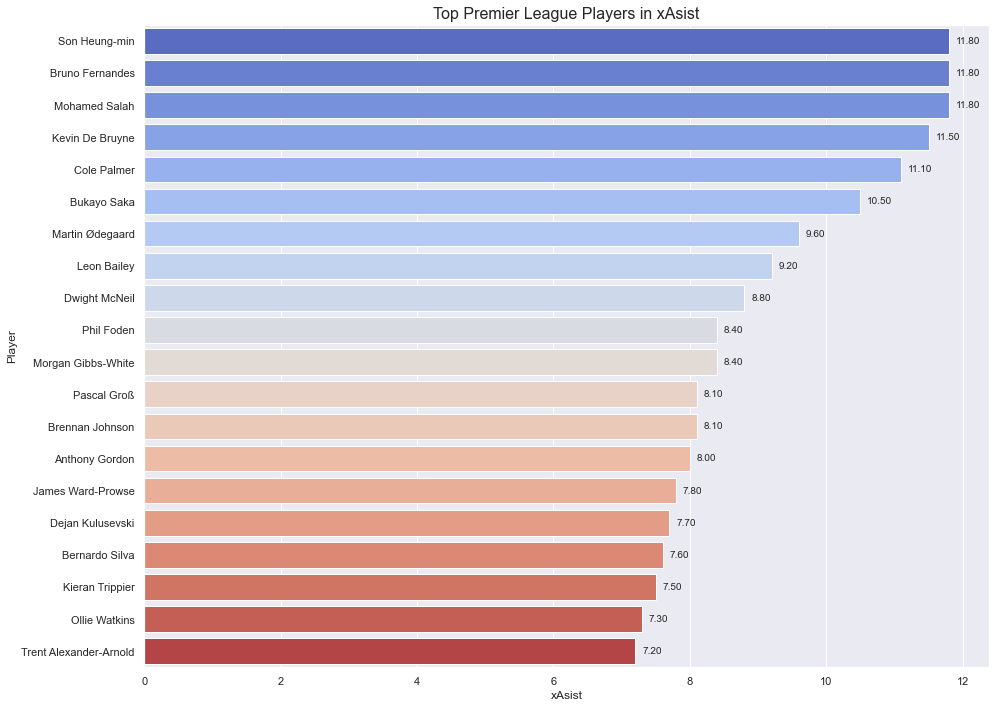

In [126]:
top_premier_players_xag = premier_league[['Player','xAG']].sort_values(by='xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_xag[:20], y='Player', x='xAG', order=top_premier_players_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in xAsist', fontsize=16)
plt.xlabel('xAsist', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

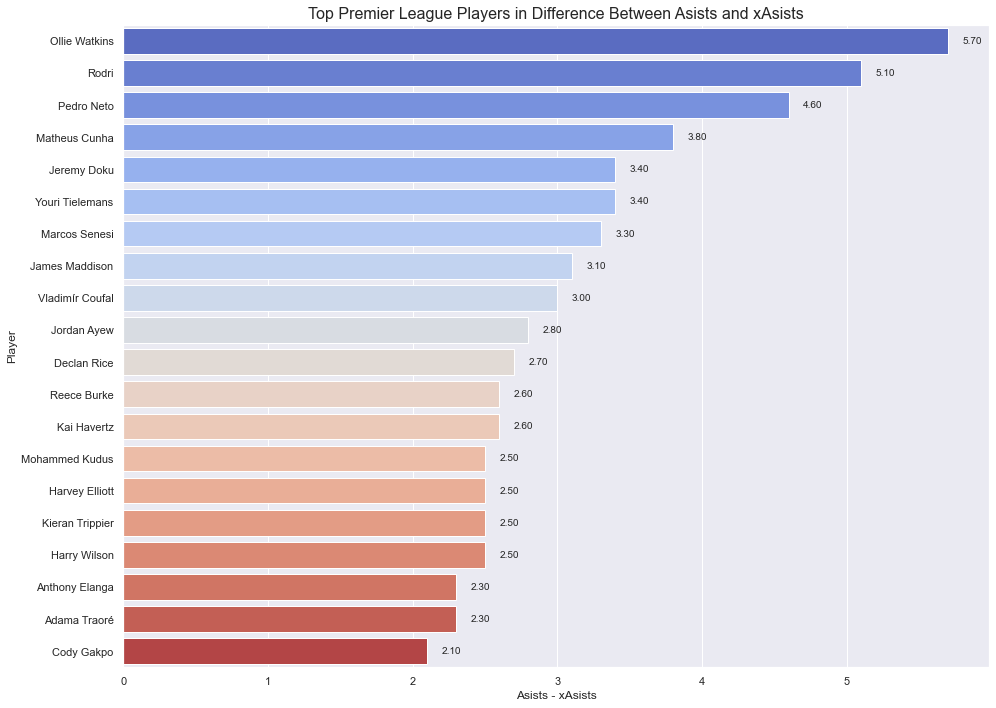

In [127]:
top_premier_players_ast_xag = premier_league[['Player','Ast-xAG']].sort_values(by='Ast-xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_ast_xag[:20], y='Player', x='Ast-xAG', order=top_premier_players_ast_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in Difference Between Asists and xAsists', fontsize=16)
plt.xlabel('Asists - xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

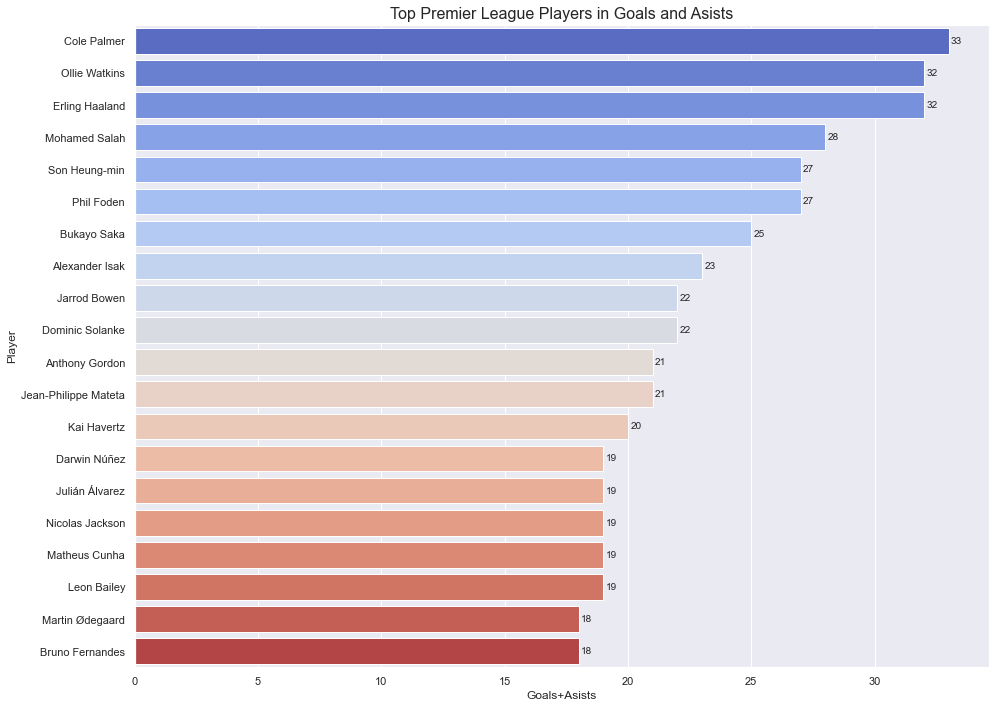

In [128]:
top_premier_players_G_Ast = premier_league[['Player','G+A']].sort_values(by='G+A', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_G_Ast[:20], y='Player', x='G+A', order=top_premier_players_G_Ast[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Players in Goals and Asists', fontsize=16)
plt.xlabel('Goals+Asists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

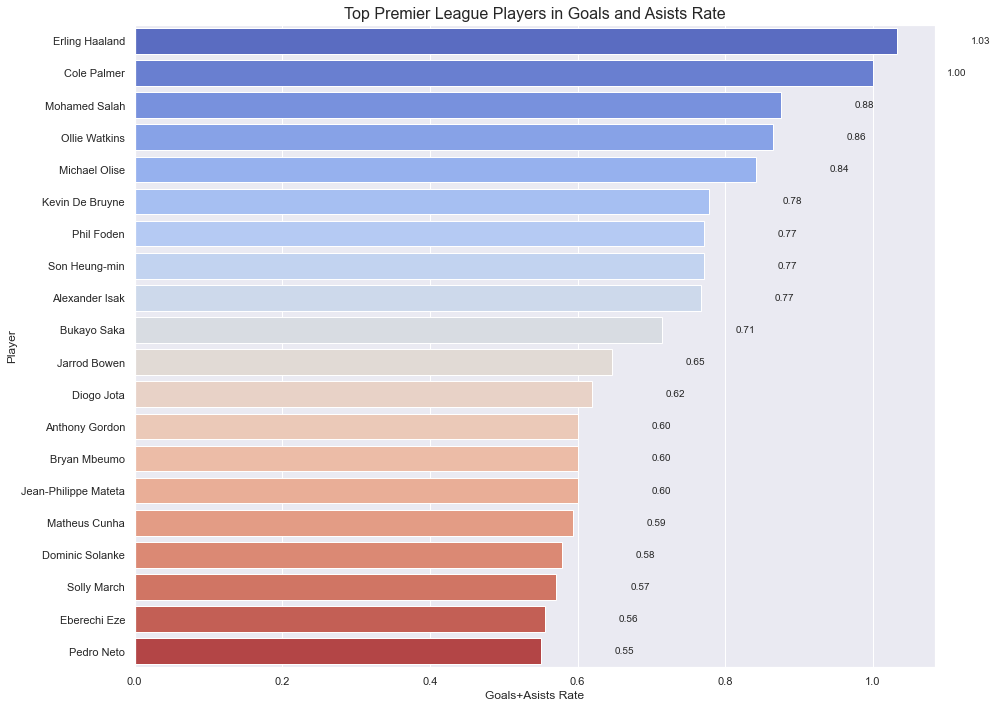

In [129]:
top_premier_players_G_Ast_rate = premier_league[['Player','G+A_rate']].sort_values(by='G+A_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_G_Ast_rate[:20], y='Player', x='G+A_rate', order=top_premier_players_G_Ast_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Premier League Players in Goals and Asists Rate', fontsize=16)
plt.xlabel('Goals+Asists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

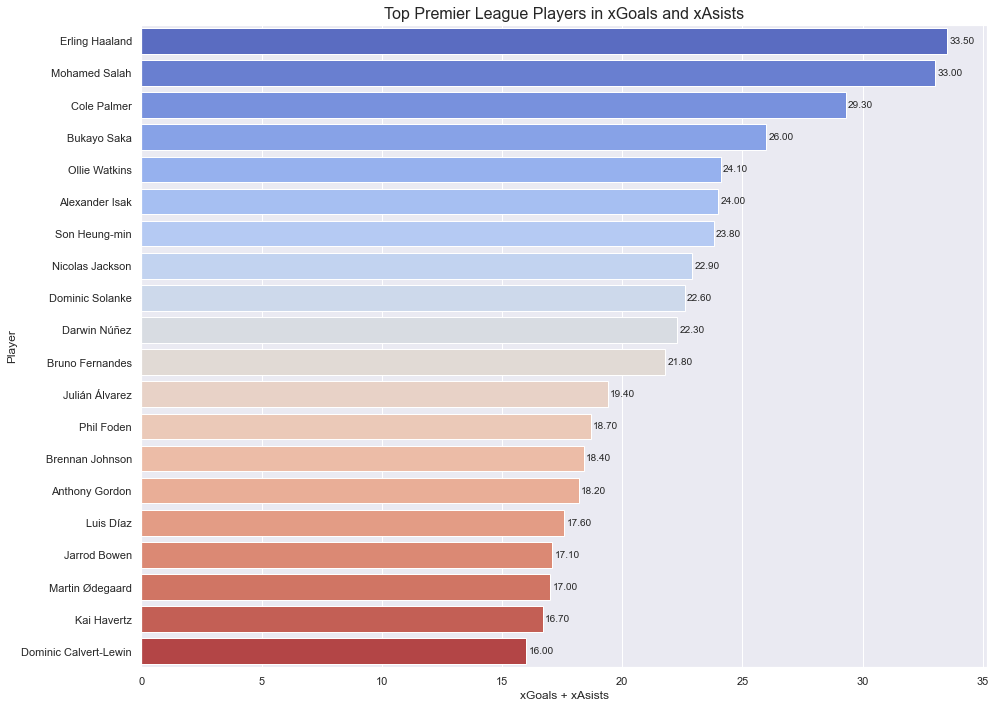

In [130]:
top_premier_players_xg_xag = premier_league[['Player','xG+xAG']].sort_values(by='xG+xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_xg_xag[:20], y='Player', x='xG+xAG', order=top_premier_players_xg_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in xGoals and xAsists', fontsize=16)
plt.xlabel('xGoals + xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

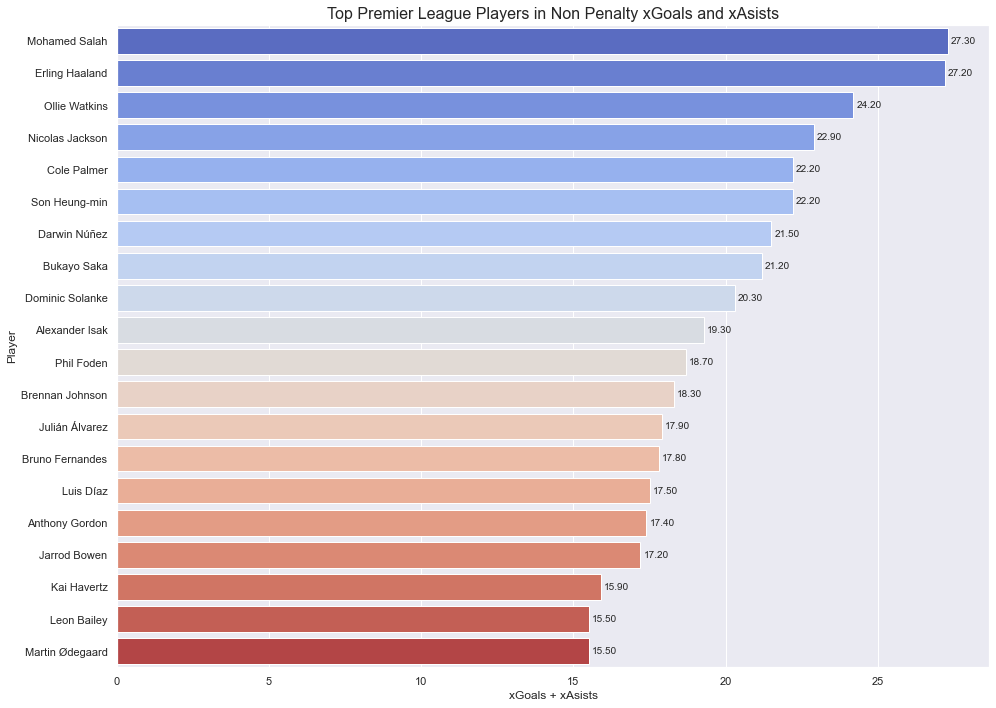

In [131]:
top_premier_players_npxg_xag = premier_league[['Player','npxG+xAG']].sort_values(by='npxG+xAG', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_npxg_xag[:20], y='Player', x='npxG+xAG', order=top_premier_players_npxg_xag[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in Non Penalty xGoals and xAsists', fontsize=16)
plt.xlabel('xGoals + xAsists', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

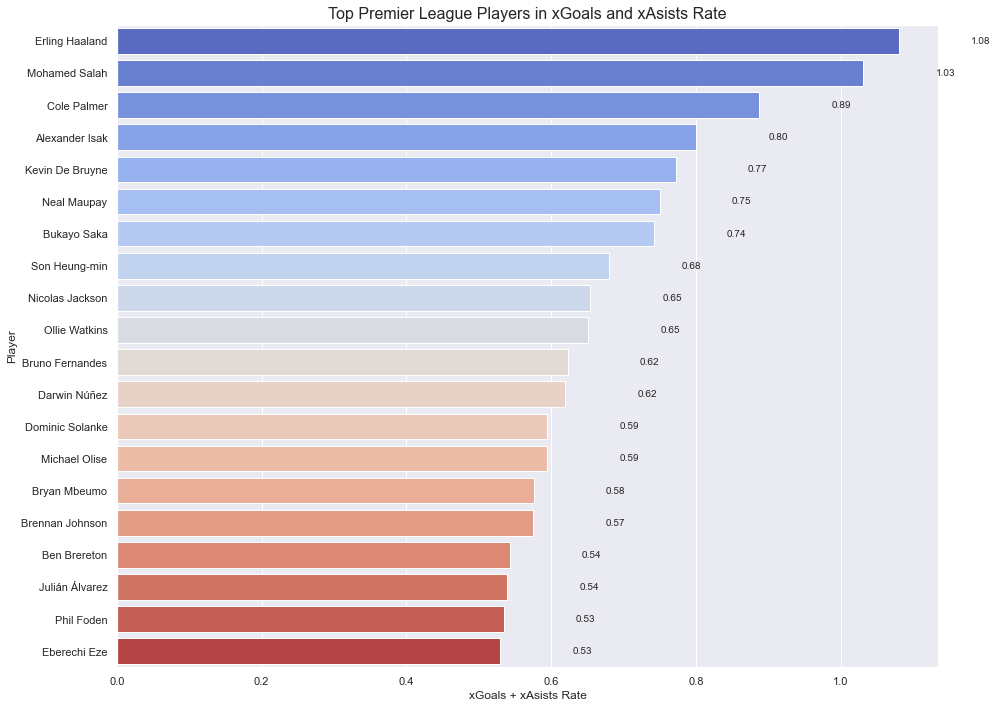

In [132]:
top_premier_players_xg_xag_rate = premier_league[['Player','xG+xAG_rate']].sort_values(by='xG+xAG_rate', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_xg_xag_rate[:20], y='Player', x='xG+xAG_rate', order=top_premier_players_xg_xag_rate[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.2f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in xGoals and xAsists Rate', fontsize=16)
plt.xlabel('xGoals + xAsists Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

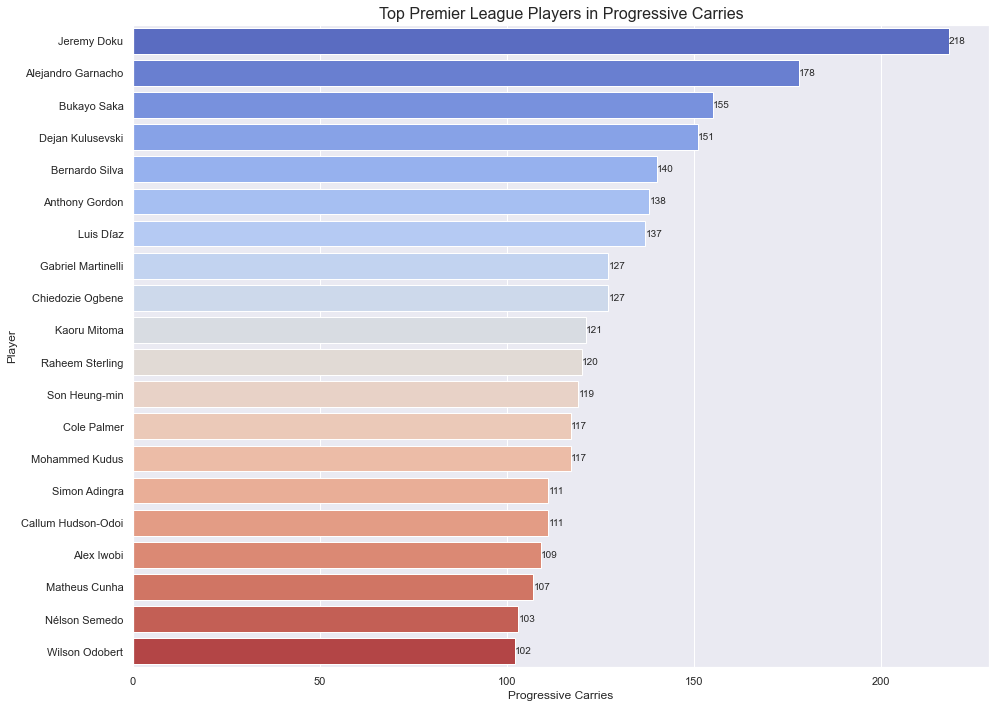

In [133]:
top_premier_players_PrgC = premier_league[['Player','PrgC']].sort_values(by='PrgC', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_PrgC[:20], y='Player', x='PrgC', order=top_premier_players_PrgC[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in Progressive Carries', fontsize=16)
plt.xlabel('Progressive Carries', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

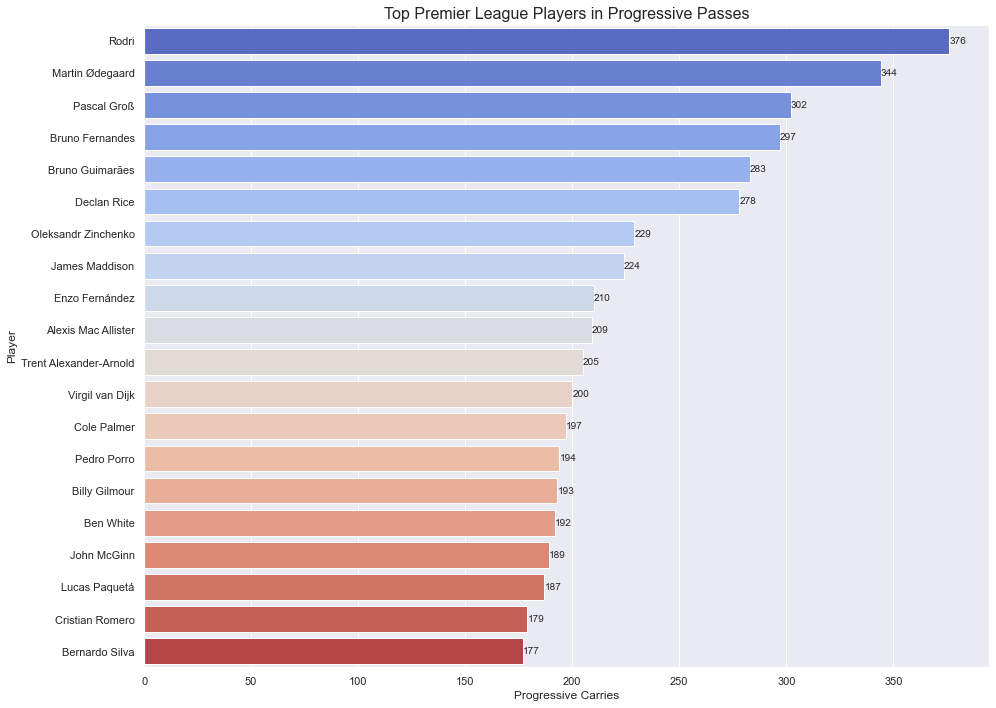

In [134]:
top_premier_players_PrgP = premier_league[['Player','PrgP']].sort_values(by='PrgP', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_PrgP[:20], y='Player', x='PrgP', order=top_premier_players_PrgP[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in Progressive Passes', fontsize=16)
plt.xlabel('Progressive Carries', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

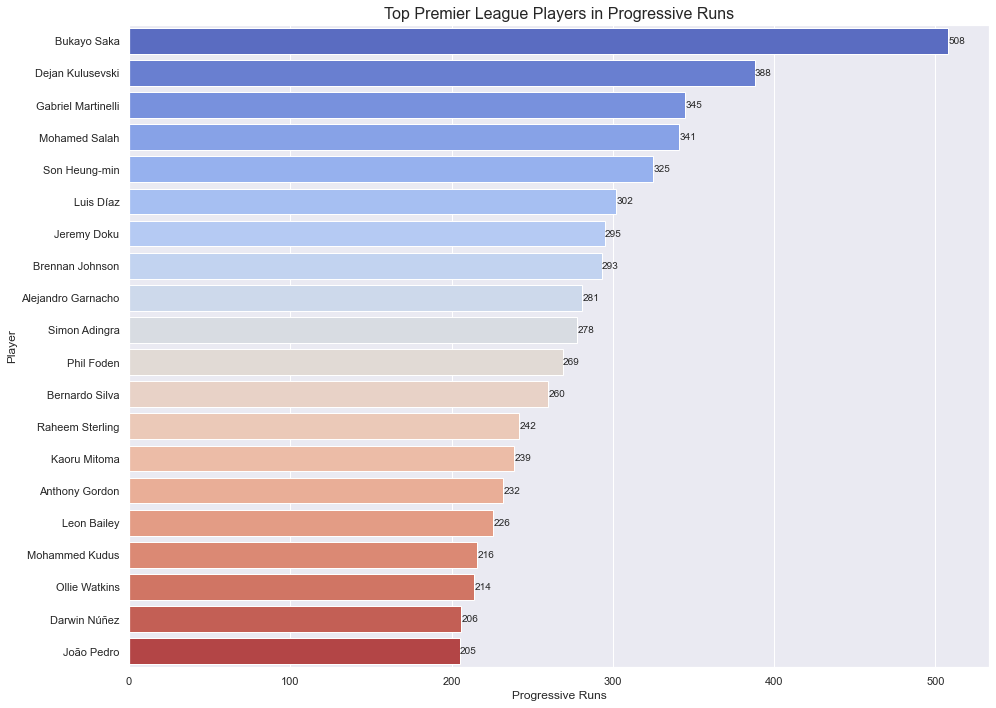

In [135]:
top_premier_players_PrgR = premier_league[['Player','PrgR']].sort_values(by='PrgR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=top_premier_players_PrgR[:20], y='Player', x='PrgR', order=top_premier_players_PrgR[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Top Premier League Players in Progressive Runs', fontsize=16)
plt.xlabel('Progressive Runs', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

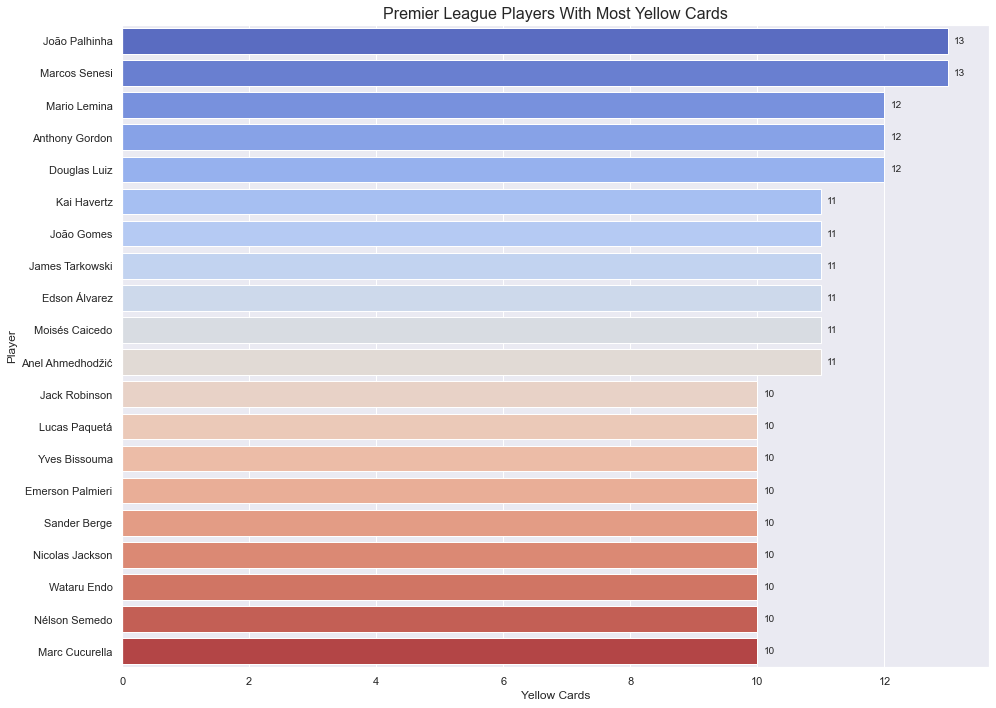

In [136]:
premier_players_CrdY = premier_league[['Player','CrdY']].sort_values(by='CrdY', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=premier_players_CrdY[:20], y='Player', x='CrdY', order=premier_players_CrdY[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Premier League Players With Most Yellow Cards', fontsize=16)
plt.xlabel('Yellow Cards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

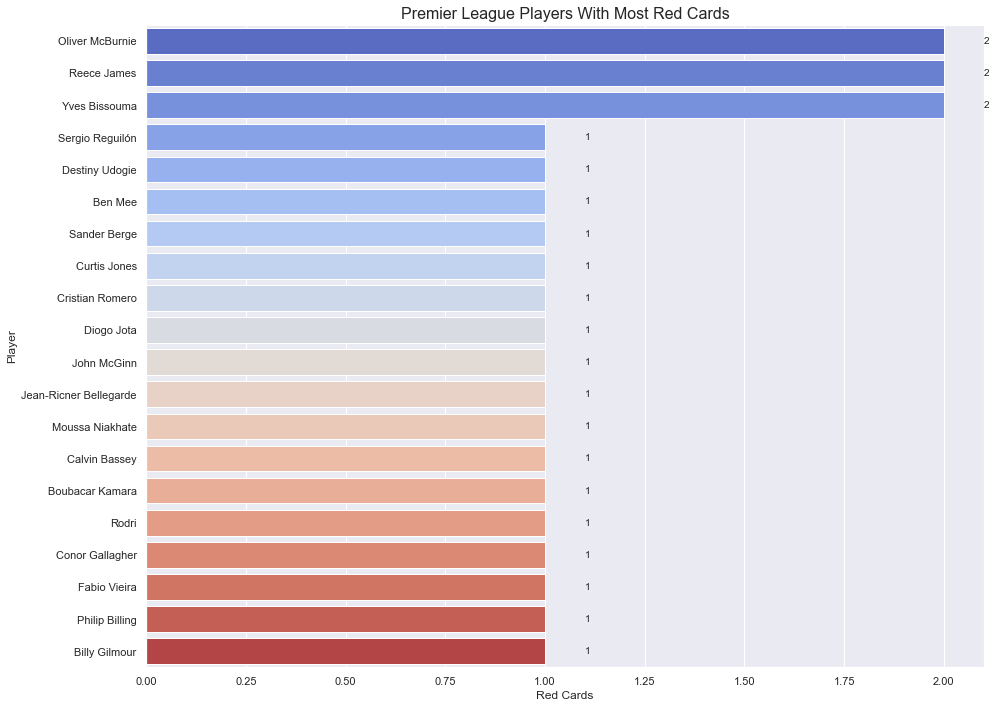

In [137]:
premier_players_CrdR = premier_league[['Player','CrdR']].sort_values(by='CrdR', ascending=False)
plt.figure(figsize=(14, 10))
ax=sns.barplot(data=premier_players_CrdR[:20], y='Player', x='CrdR', order=premier_players_CrdR[:20]['Player'] , palette="coolwarm")

# Add values to each bar
for p in ax.patches:
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.0f}', ha='left', va='center', fontsize=10)
    
plt.title('Premier League Players With Most Red Cards', fontsize=16)
plt.xlabel('Red Cards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

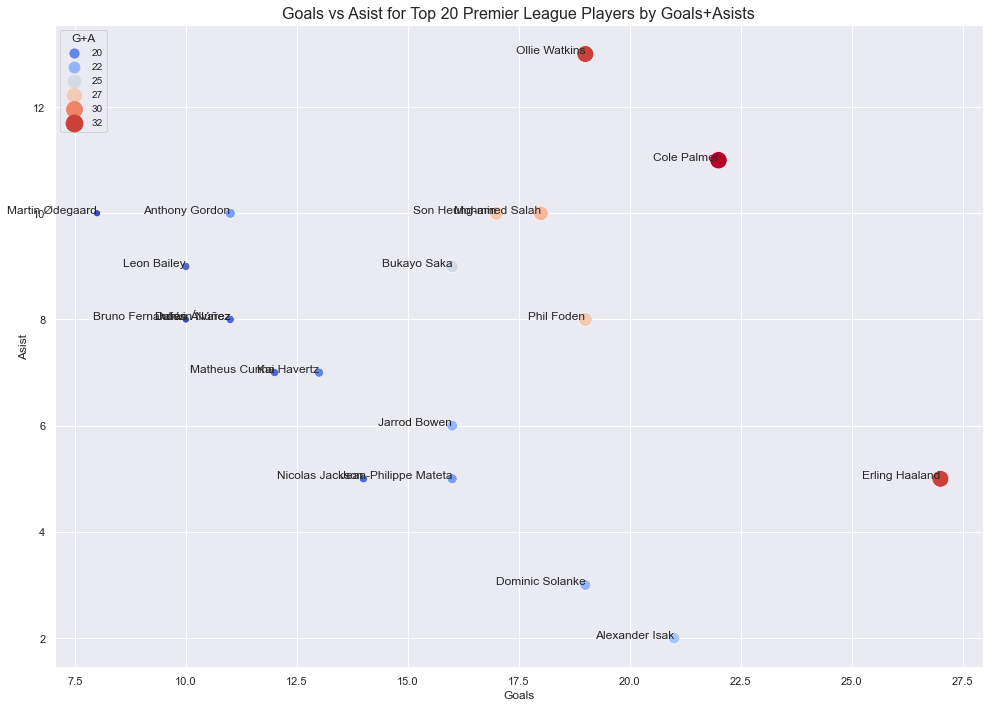

In [138]:
# Visualize the relationship between goals (Gls) and assists (Ast) for the top 20 Premier League players,
# sorted by their combined goals and assists (G+A):
# - Sort the data to focus on the top 20 players based on their combined goals and assists (G+A).
# - Create a scatter plot where the x-axis represents goals (Gls), and the y-axis represents assists (Ast).
# - Use the color (hue) to indicate the combined goals and assists (G+A), and adjust the marker size according to G+A.
top_20_premier_player_gls_ast = premier_league.sort_values(by='G+A', ascending=False).head(20)
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=top_20_premier_player_gls_ast, x='Gls', y='Ast', hue='G+A', size='G+A',palette="coolwarm", sizes=(50, 300), legend='brief')

# Add values to each bar
for i, row in top_20_premier_player_gls_ast.iterrows():
    plt.text(row['Gls'], row['Ast'], row['Player'], fontsize=12, ha='right')

plt.title('Goals vs Asist for Top 20 Premier League Players by Goals+Asists', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Asist', fontsize=12)
plt.legend(title='G+A', fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

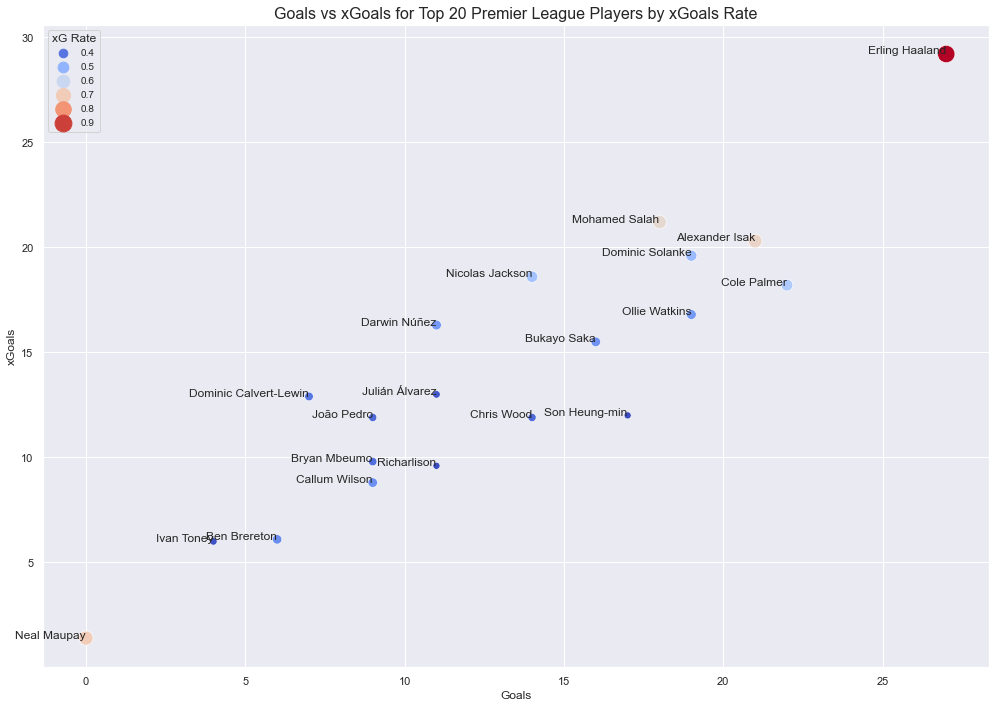

In [139]:
# Visualize the relationship between actual goals (Gls) and expected goals (xG) for the top 20 Premier League players,
# sorted by their expected goals rate (xG_rate):
# - Sort the data to focus on the top 20 players based on their expected goals rate (xG_rate).
# - Create a scatter plot where the x-axis represents actual goals (Gls), and the y-axis represents expected goals (xG).
# - Use the color (hue) to indicate the expected goals rate (xG_rate), and adjust the marker size according to xG_rate.
top_20_premier_player_gls_xG = premier_league.sort_values(by='xG_rate', ascending=False).head(20)
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=top_20_premier_player_gls_xG, x='Gls', y='xG', hue='xG_rate', size='xG_rate',palette="coolwarm", sizes=(50, 300), legend='brief')

# Add values to each bar
for i, row in top_20_premier_player_gls_xG.iterrows():
    plt.text(row['Gls'], row['xG'], row['Player'], fontsize=12, ha='right')

plt.title('Goals vs xGoals for Top 20 Premier League Players by xGoals Rate', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('xGoals', fontsize=12)
plt.legend(title='xG Rate', fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

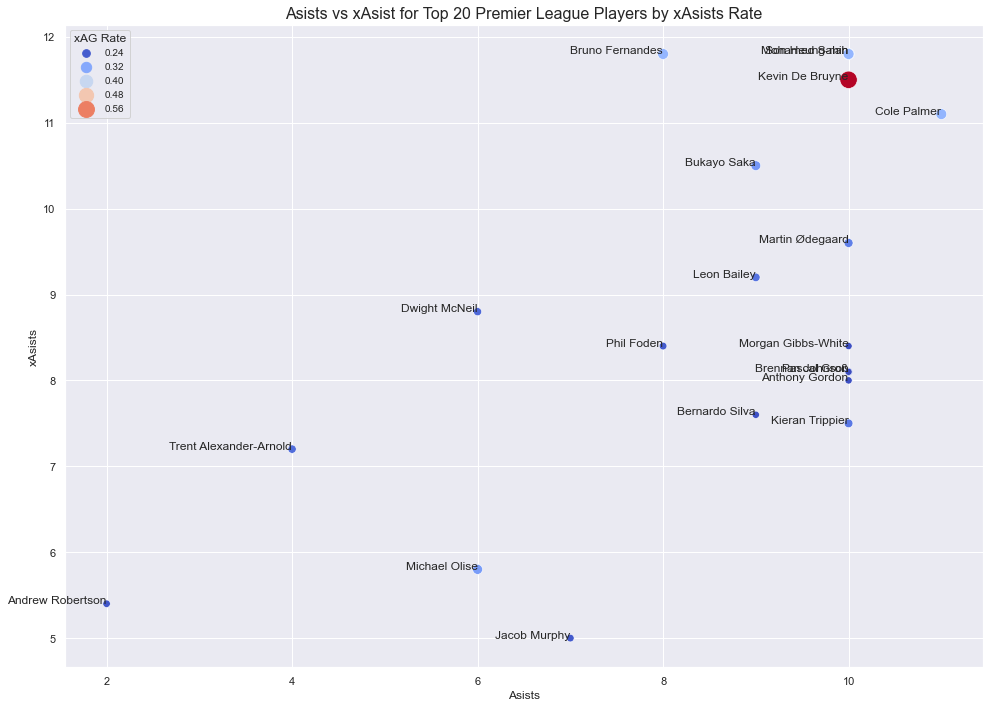

In [140]:
# Visualize the relationship between assists (Ast) and expected assists (xAG) for the top 20 Premier League players,
# sorted by their expected assists rate (xAG_rate):
# - Sort the data to focus on the top 20 players based on their expected assists rate (xAG_rate).
# - Create a scatter plot where the x-axis represents assists (Ast), and the y-axis represents expected assists (xAG).
# - Use the color (hue) to indicate the expected assists rate (xAG_rate), and adjust the marker size according to xAG_rate.
top_20_premier_player_ast_xAG = premier_league.sort_values(by='xAG_rate', ascending=False).head(20)
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=top_20_premier_player_ast_xAG, x='Ast', y='xAG', hue='xAG_rate', size='xAG_rate',palette="coolwarm", sizes=(50, 300), legend='brief')

# Add values to each bar
for i, row in top_20_premier_player_ast_xAG.iterrows():
    plt.text(row['Ast'], row['xAG'], row['Player'], fontsize=12, ha='right')

plt.title('Asists vs xAsist for Top 20 Premier League Players by xAsists Rate', fontsize=16)
plt.xlabel('Asists', fontsize=12)
plt.ylabel('xAsists', fontsize=12)
plt.legend(title='xAG Rate', fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()